In [1]:
pip install split-folders

  Obtaining dependency information for split-folders from https://files.pythonhosted.org/packages/b6/d5/307d63c03356bad6e141d8718d3f4116f51bd9c4b09e2614ffcee1f3c6fd/split_folders-0.5.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install livelossplot

  Obtaining dependency information for livelossplot from https://files.pythonhosted.org/packages/02/cf/faab3493016f4b291e14aba371d2cab89fca4511ef0cc21e5a9852f89c16/livelossplot-0.5.6-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import os
import imageio.v2 as iio
import shutil
from livelossplot import PlotLossesKeras
from tqdm import tqdm
import keras
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import splitfolders

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
d_m_path="/kaggle/input/handwritten-malayalam/digital_malayalam"

In [7]:
letters=glob.glob(d_m_path+"/*")
letters=sorted(letters)[1:]
len(letters)

125

In [8]:
# for letter in letters:
#     shutil.copytree(letter,"/kaggle/working/dataset/"+str(letters.index(letter)))
#     #os.rename(letter,letter[:-1]+str(letters.index(letter)))

In [9]:
curnt_dir="/kaggle/working"

In [10]:
!mkdir "dataset/"

In [11]:
for letter in tqdm(letters):
    imgs=glob.glob(letter+"/*.png")
    path="/kaggle/working/dataset/"+str(letters.index(letter))
    os.mkdir(path)
    os.chdir(path)
    for img_name in imgs:
        img = cv2.imread(img_name,flags=cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
        img=img[:,:,3]
        img=img/255.0
        img=np.where(img>0.5,1,0)
        if len(np.unique(img))<2:
            continue
        cv2.imwrite(str(imgs.index(img_name))+".png",img)
os.chdir(curnt_dir)
        

100%|██████████| 125/125 [00:31<00:00,  3.98it/s]


In [12]:
letters=np.reshape(letters,(25,5))

In [13]:
np.shape(letters)

(25, 5)

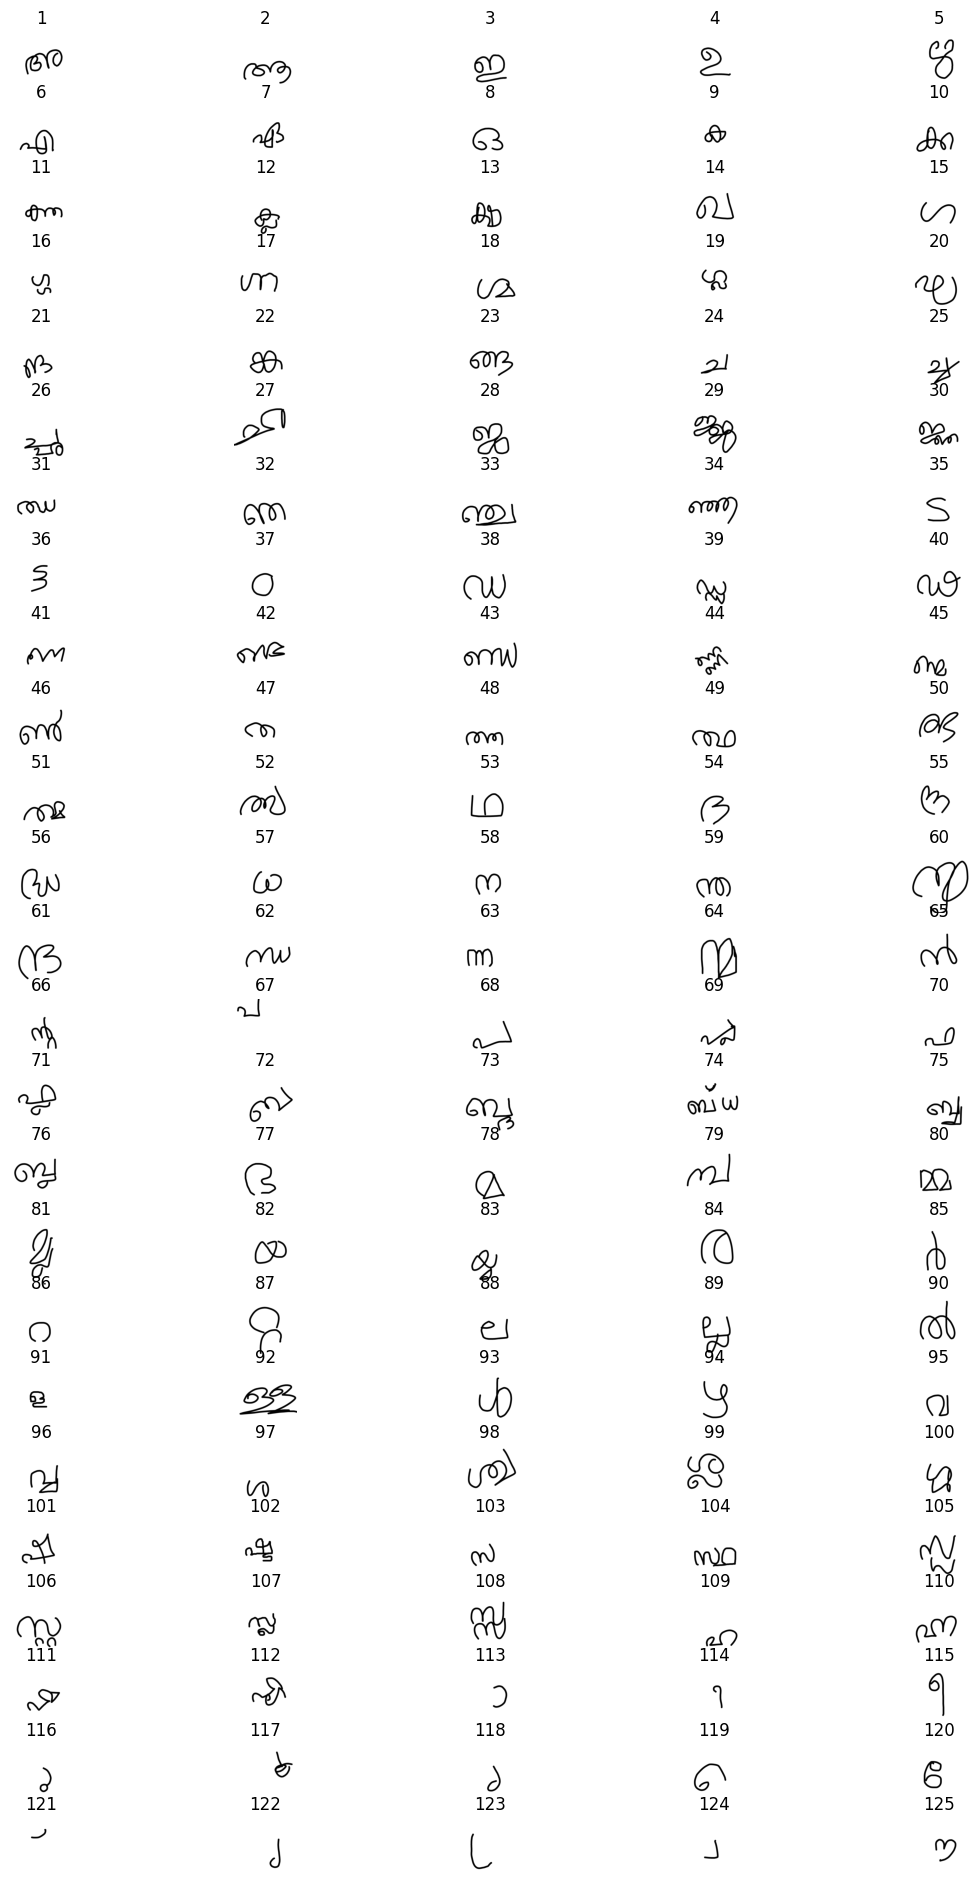

In [14]:

plt.rcParams['figure.figsize'] = [14,24]
fig, axs = plt.subplots(25,5)
for i in range(25):
    for j in range(5):
        letter=letters[i][j]
        try: 
            first=glob.glob(letter+"/*.png")[0]
        except:
            print(i,j)
        l=os.path.basename(letter)
        img=iio.imread(first)
        
        #img=cv2.resize(img, (1024,1024), interpolation = cv2.INTER_LINEAR)
        axs[i,j].imshow(img)
        axs[i,j].set_title(5*i+j+1)
        axs[i,j].axis('off')
plt.show()
        

In [15]:
snd_fold=sorted(glob.glob("/kaggle/input/malayalam-hand-written-letters/*"))

In [16]:
snd_fold_re=np.reshape(snd_fold,(8,6))

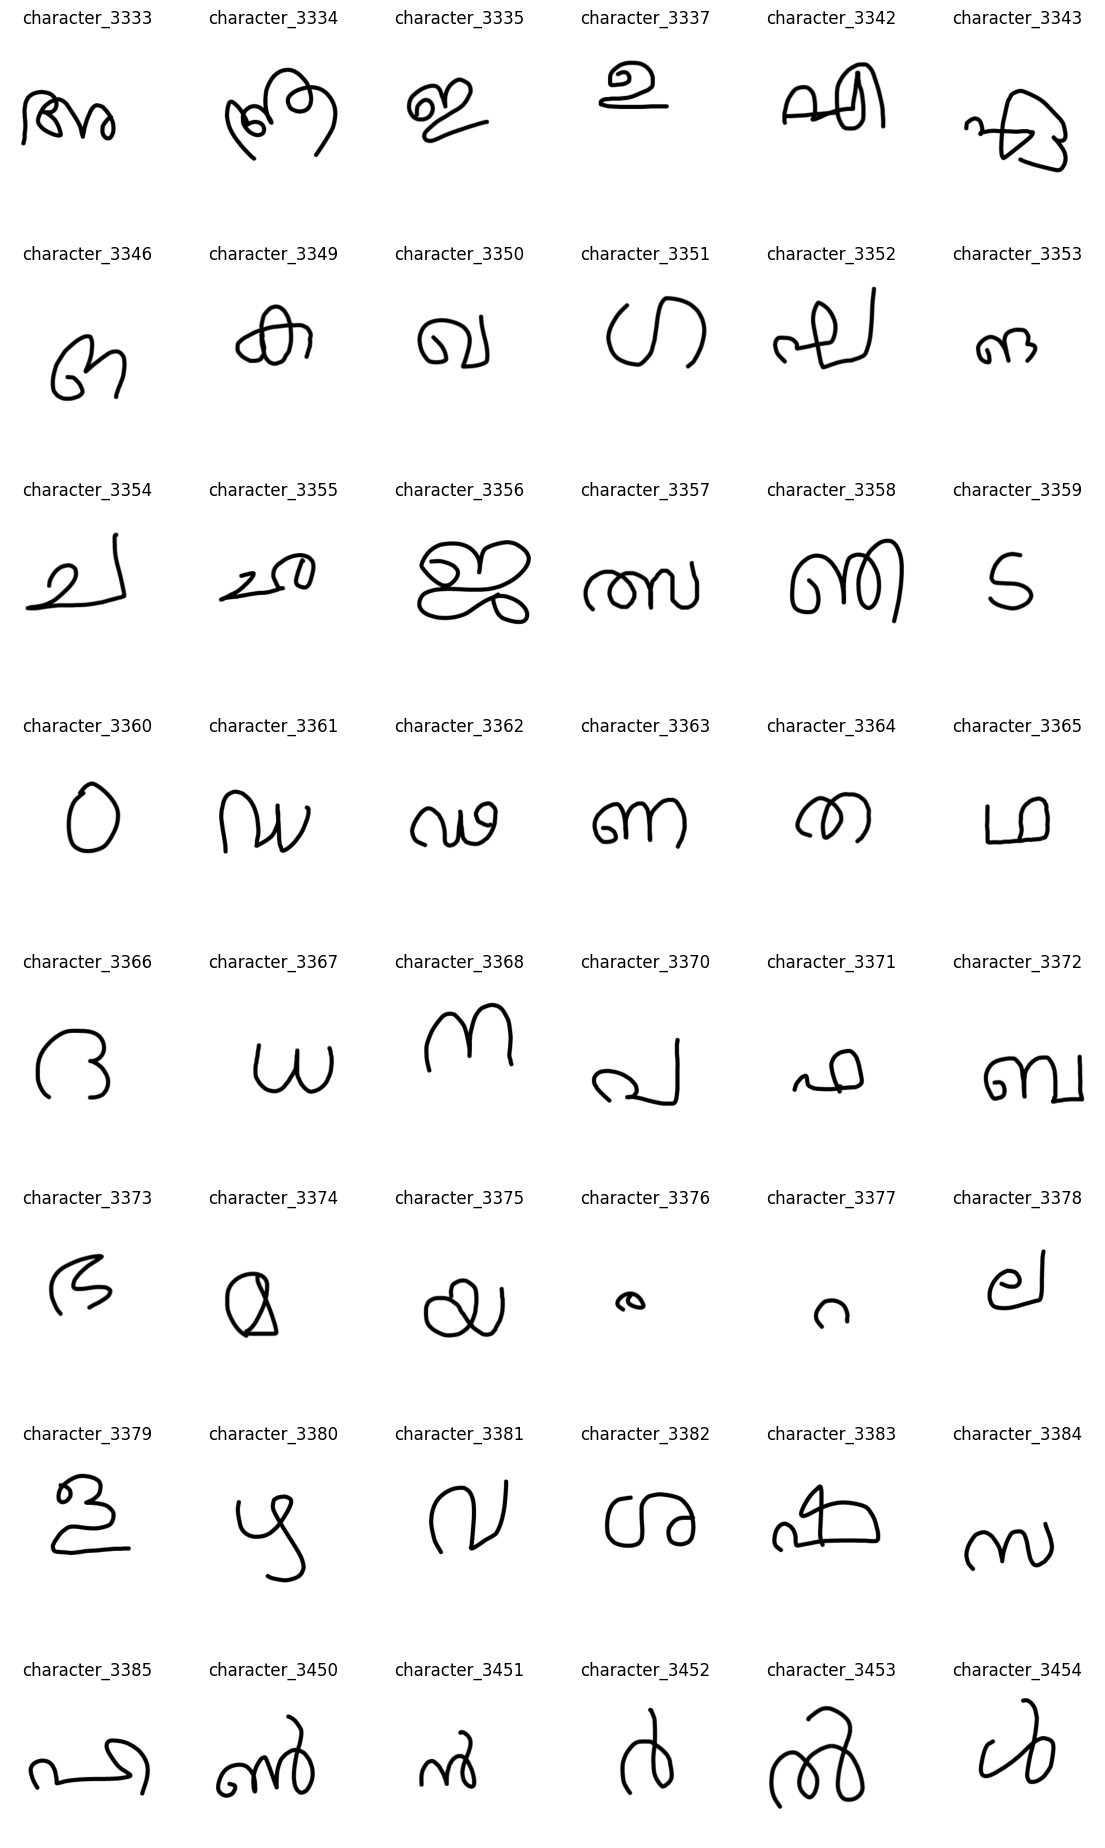

In [17]:
plt.rcParams['figure.figsize'] = [14,24]
fig, axs = plt.subplots(8,6)
for i in range(8):
    for j in range(6):
        letter=snd_fold_re[i][j]
        first=glob.glob(letter+"/*.png")[0]
        l=os.path.basename(letter)
        img=iio.imread(first)
        
        #img=cv2.resize(img, (1024,1024), interpolation = cv2.INTER_LINEAR)
        axs[i,j].imshow(img)
        axs[i,j].set_title(l)
        axs[i,j].axis('off')
plt.show()

In [18]:
letter_dict={}
for letter in snd_fold:
    letter_dict[letter]=""
    

In [19]:
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3333']="0"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3334']="1"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3335']="2"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3337']="3"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3342']="5"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3343']="6"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3346']="7"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3349']="8"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3350']="13"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3351']="14"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3352']="19"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3353']="20"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3354']="23"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3355']="26"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3356']="27"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3357']="51"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3358']="31"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3359']="34"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3360']="36"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3361']="37"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3362']="39"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3363']="40"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3364']="46"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3365']="52"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3366']="53"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3367']="56"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3368']="57"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3370']="66"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3371']="69"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3372']="71"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3373']="76"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3374']="77"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3375']="81"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3376']="83"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3377']="85"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3378']="87"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3379']="90"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3380']="93"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3381']="94"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3382']="96"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3383']="100"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3384']="102"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3385']="108"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3450']="45"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3451']="64"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3452']="84"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3453']="89"
letter_dict['/kaggle/input/malayalam-hand-written-letters/character_3454']="92"

In [20]:
for k in tqdm(letter_dict.keys()):
    save_path="/kaggle/working/dataset/"+letter_dict[k]
    imgs=sorted(glob.glob(k+"/*.png"))
    for img_name in imgs:
        img = cv2.imread(img_name,flags=cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
        img=img[:,:,3]
        img=img/255.0
        img=np.where(img>0.5,1,0)
        if len(np.unique(img))<2:
            continue
        cv2.imwrite(save_path+"/new"+str(imgs.index(img_name))+".png",img)
        
        
    
    

100%|██████████| 48/48 [00:41<00:00,  1.17it/s]


In [21]:

splitfolders.ratio('/kaggle/working/dataset', output="output", seed=1337, ratio=(0.7, 0.2,0.1))

Copying files: 11663 files [00:01, 8852.47 files/s]


In [22]:
def preprocessing_fun(img):
    img=np.where(img>0.5,1,0)
    return img

In [23]:
train_datagen = ImageDataGenerator(
        #rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        preprocessing_function=preprocessing_fun
        )

train_generator = train_datagen.flow_from_directory(
        '/kaggle/working/output/train',
        target_size=(128,128),
        batch_size=64,
        class_mode='categorical',color_mode="grayscale")
validation_generator = train_datagen.flow_from_directory(
        '/kaggle/working/output/val',
        target_size=(128,128),
        batch_size=64,
        class_mode='categorical',color_mode="grayscale"
)

Found 8107 images belonging to 125 classes.
Found 2279 images belonging to 125 classes.


In [24]:
class_labels=list(train_generator.class_indices.keys())

In [25]:
class_labels

['0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

In [ ]:
def build_model():
    inp=keras.layers.Input(shape=(128,128,1))
    c=keras.layers.Conv2D(6,kernel_size=(5,5),activation="relu",kernel_regularizer=keras.regularizers.l2(0.0001))(inp)
    m=keras.layers.MaxPool2D(pool_size=(2,2))(c)
    c=keras.layers.Conv2D(8,kernel_size=(5,5),activation="relu",kernel_regularizer=keras.regularizers.l2(0.0001))(m)
    m=keras.layers.MaxPool2D(pool_size=(2,2))(c)
    c=keras.layers.Conv2D(16,kernel_size=(5,5),activation="relu",kernel_regularizer=keras.regularizers.l2(0.0001))(m)
    m=keras.layers.MaxPool2D(pool_size=(2,2))(c)
    f=keras.layers.Flatten()(m)
    d=keras.layers.Dense(120,activation="relu",kernel_regularizer=keras.regularizers.l2(0.0001))(f)
    d=keras.layers.Dropout(0.2)(d)
    d=keras.layers.Dense(84,activation="relu",kernel_regularizer=keras.regularizers.l2(0.0001))(d)
    d=keras.layers.Dropout(0.2)(d)
    out=keras.layers.Dense(125,activation="softmax")(d)
    model=keras.models.Model(inputs=inp,outputs=out)
    return model

In [27]:
model=build_model()

In [28]:
checkpoint_filepath = 'best_model_jan11_mobilenet.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [29]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.0000000001)


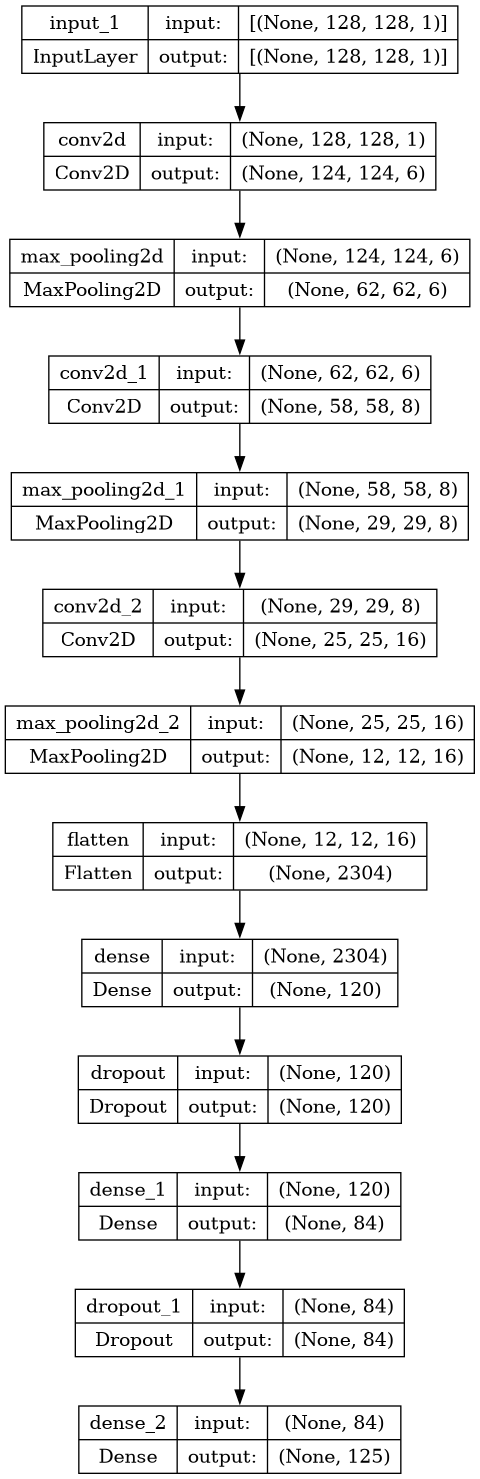

In [30]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [31]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

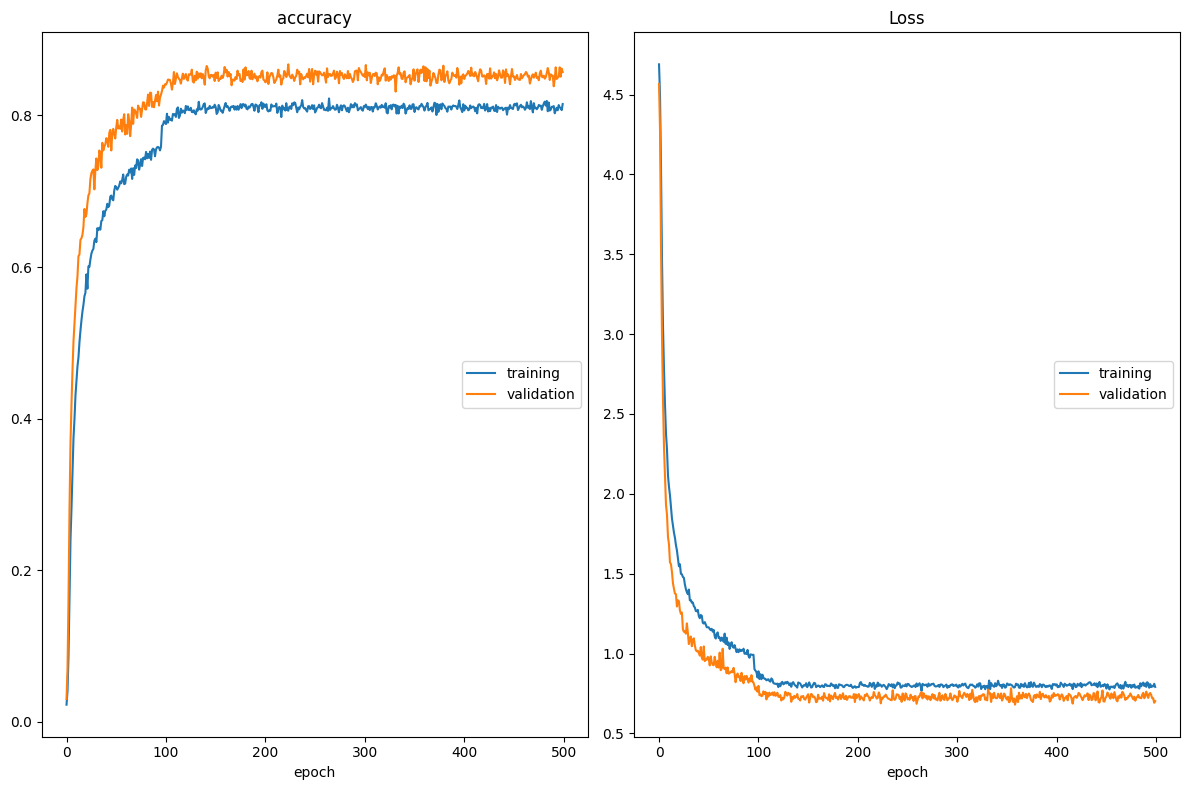

accuracy
	training         	 (min:    0.022, max:    0.822, cur:    0.815)
	validation       	 (min:    0.030, max:    0.867, cur:    0.857)
Loss
	training         	 (min:    0.766, max:    4.689, cur:    0.791)
	validation       	 (min:    0.679, max:    4.567, cur:    0.702)
127/127 [==============================] - 20s 154ms/step - loss: 0.7908 - accuracy: 0.8151 - val_loss: 0.7015 - val_accuracy: 0.8574 - lr: 1.0000e-10


In [32]:
model.fit(train_generator,validation_data=validation_generator,epochs=500,callbacks=[PlotLossesKeras(),reduce_lr,model_checkpoint_callback])

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocessing_fun)

In [34]:
test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/output/test',
        target_size=(128,128),
        batch_size=64,
        class_mode='categorical',color_mode="grayscale"
)

Found 1277 images belonging to 125 classes.


In [35]:
print(model.evaluate(test_generator))

20/20 [==============================] - 1s 47ms/step - loss: 0.3965 - accuracy: 0.9295
[0.3964976966381073, 0.9295223355293274]


In [36]:
test_fold=sorted(glob.glob("/kaggle/working/output/test/*"))

In [37]:
y_true=[]
y_pred=[]
file_list=[]
for fold in tqdm(test_fold):
    imgs=glob.glob(fold+"/*.png")
    label=int(os.path.basename(fold))
    for img in imgs:
        i=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
        y_true.append(label)
        i=cv2.resize(i,(128,128),interpolation=cv2.INTER_LINEAR)
        i=np.reshape(i,(1,128,128,1))
        
        p=np.argmax(model.predict(i,verbose=0)[0])
        y_pred.append(int(class_labels[p]))
        if label==int(class_labels[p]):
            file_list.append(-1)
        else:
            file_list.append(img)
            
        
        
        
        

100%|██████████| 125/125 [01:01<00:00,  2.05it/s]


In [38]:
from sklearn.metrics import classification_report
target_names = [os.path.basename(pth) for pth in sorted(glob.glob("/kaggle/input/handwritten-malayalam/digital_malayalam/*"))[1:]]
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

           അ       0.96      1.00      0.98        27
           ആ       1.00      0.96      0.98        27
           ഇ       0.96      0.96      0.96        26
           ഉ       0.92      1.00      0.96        24
           ഋ       0.83      0.83      0.83         6
           എ       0.91      0.91      0.91        23
           ഏ       0.96      0.96      0.96        24
           ഒ       1.00      1.00      1.00        19
           ക       0.86      1.00      0.92        18
         ക്ക       0.60      0.75      0.67         4
         ക്ത       0.80      0.80      0.80         5
         ക്ല       1.00      0.75      0.86         4
         ക്ഷ       0.80      1.00      0.89         4
           ഖ       0.95      1.00      0.97        18
           ഗ       1.00      1.00      1.00        18
         ഗ്ഗ       1.00      1.00      1.00         4
         ഗ്ന       1.00      1.00      1.00         4
         ഗ്മ       1.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted as അ


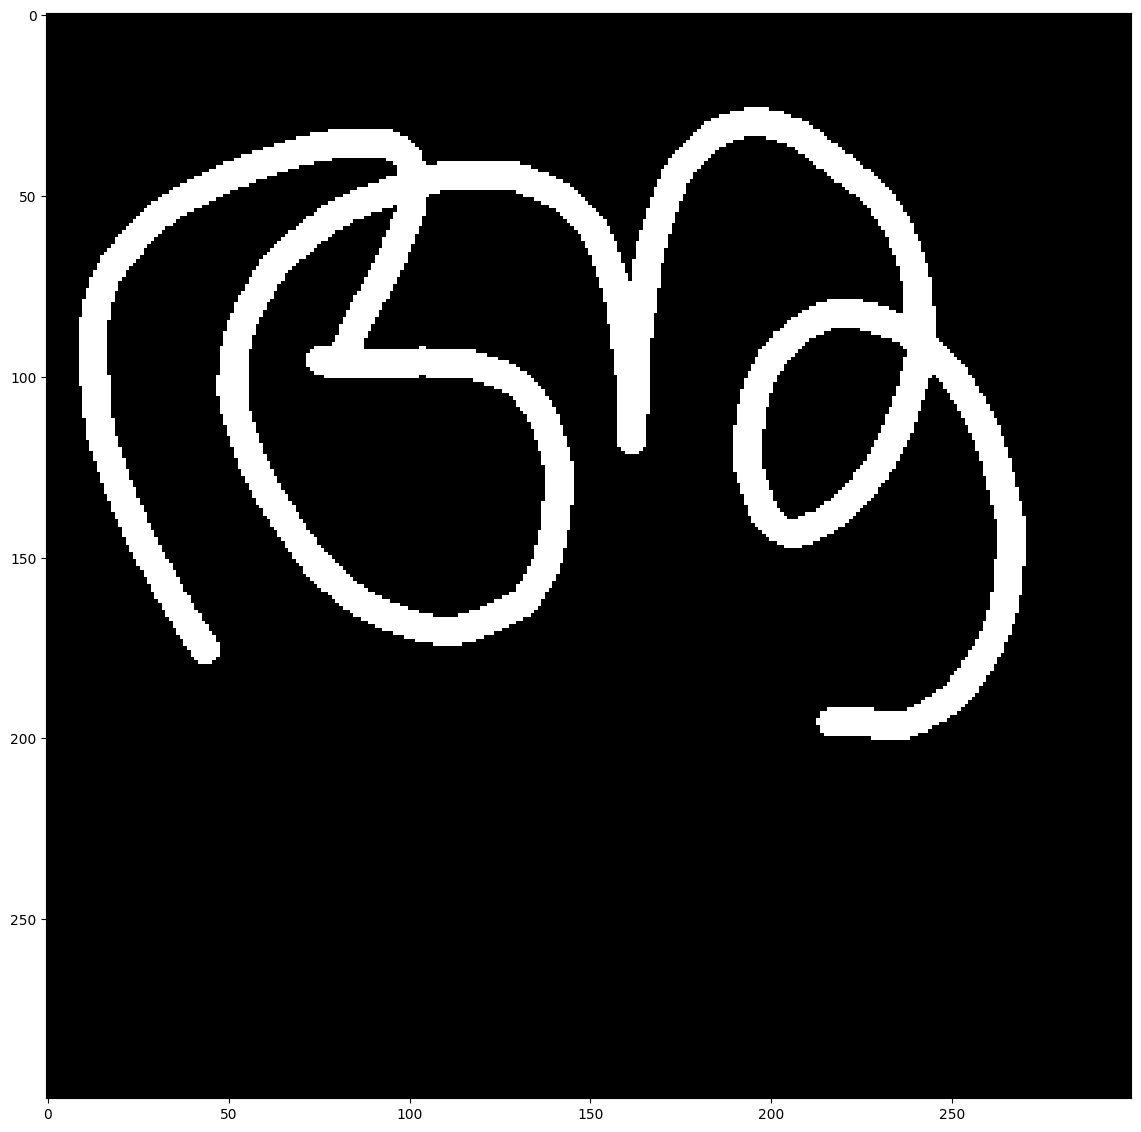

Predicted as ക്ക


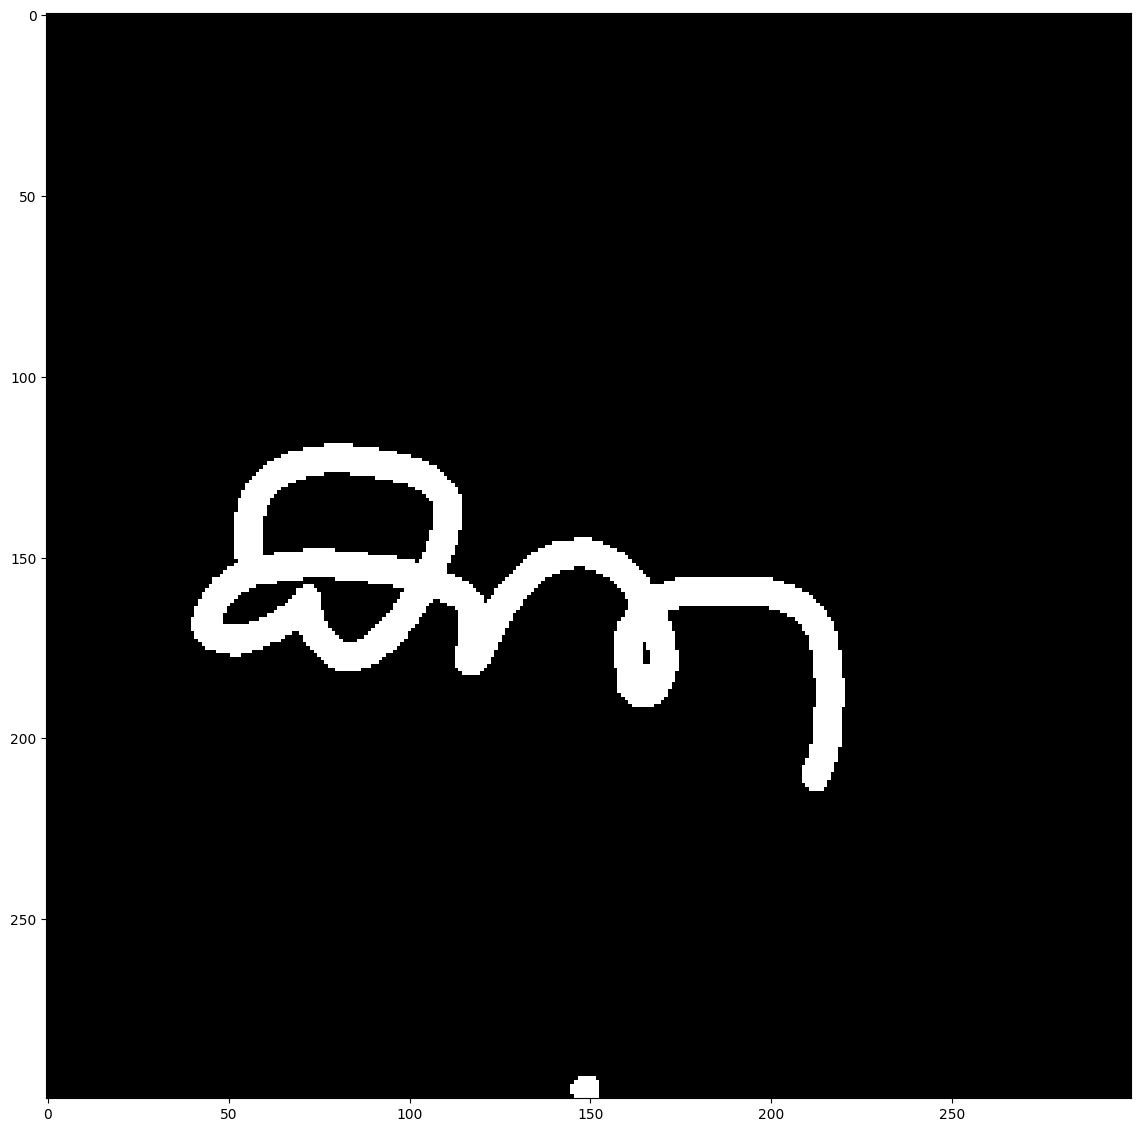

Predicted as മ


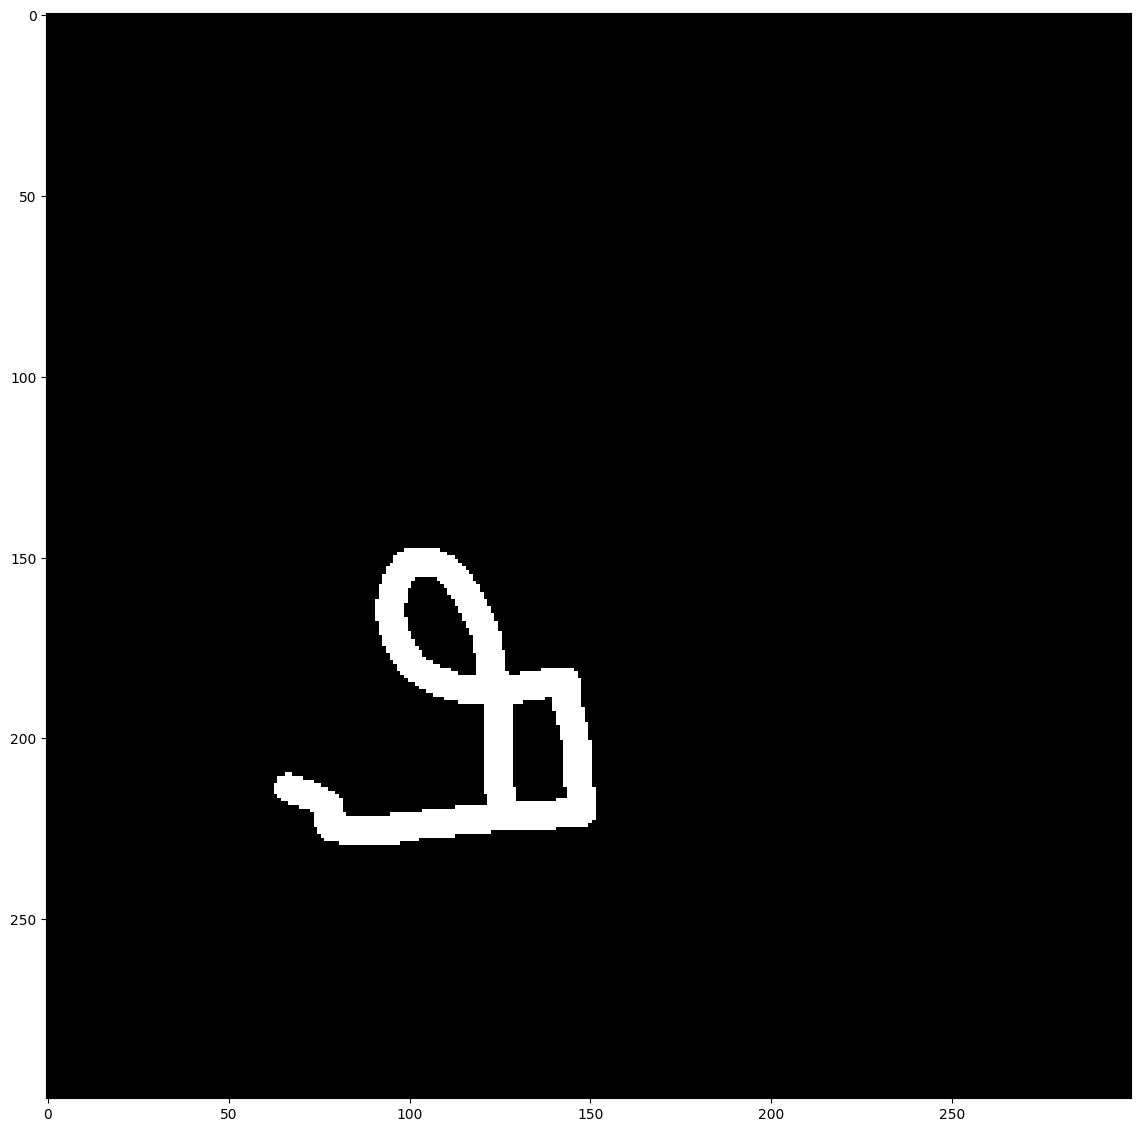

Predicted as ഡ്ഡ


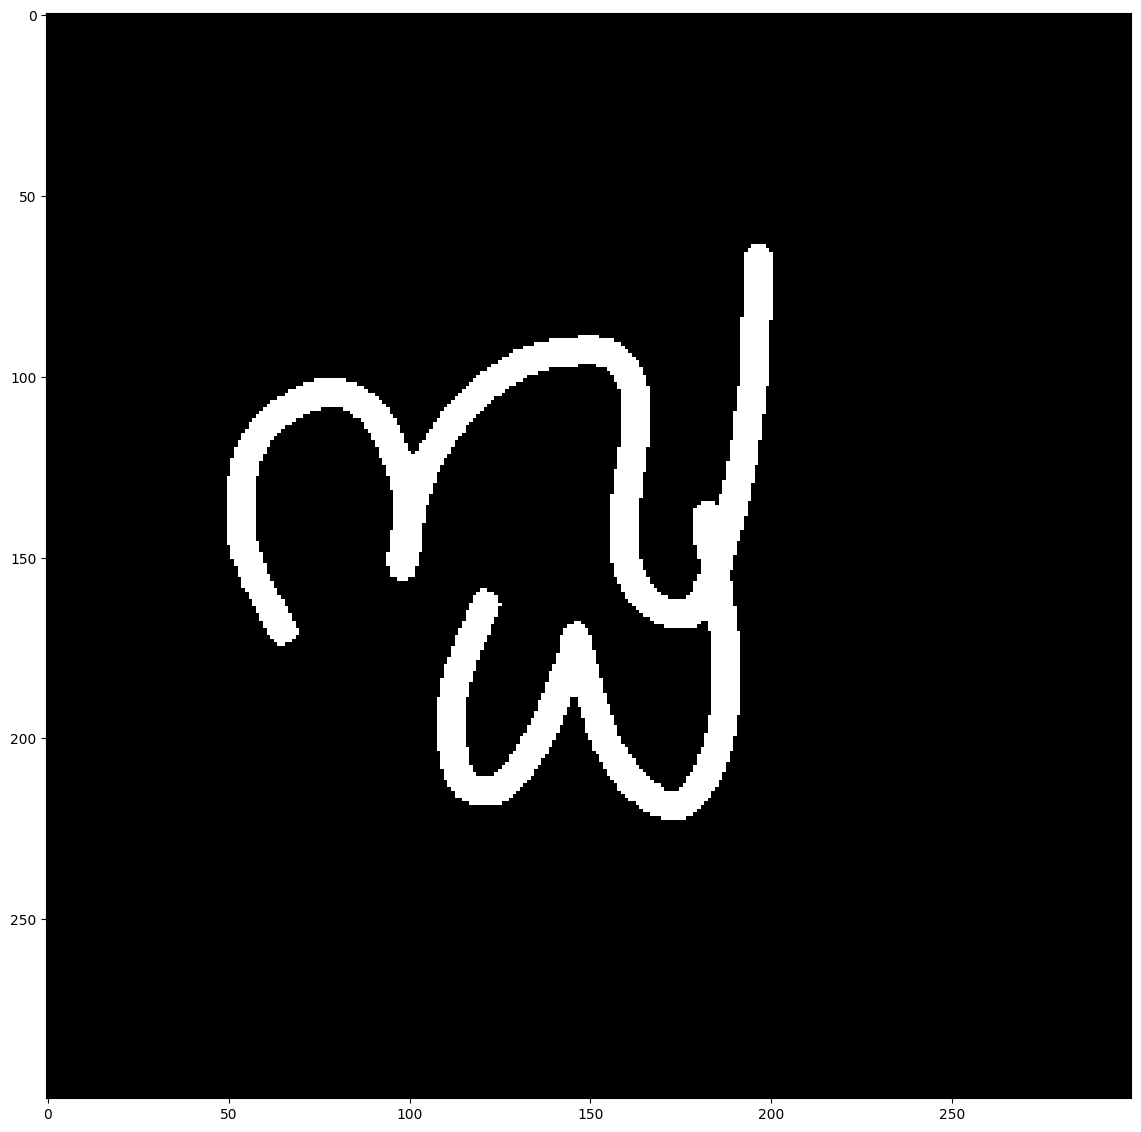

Predicted as ഢ


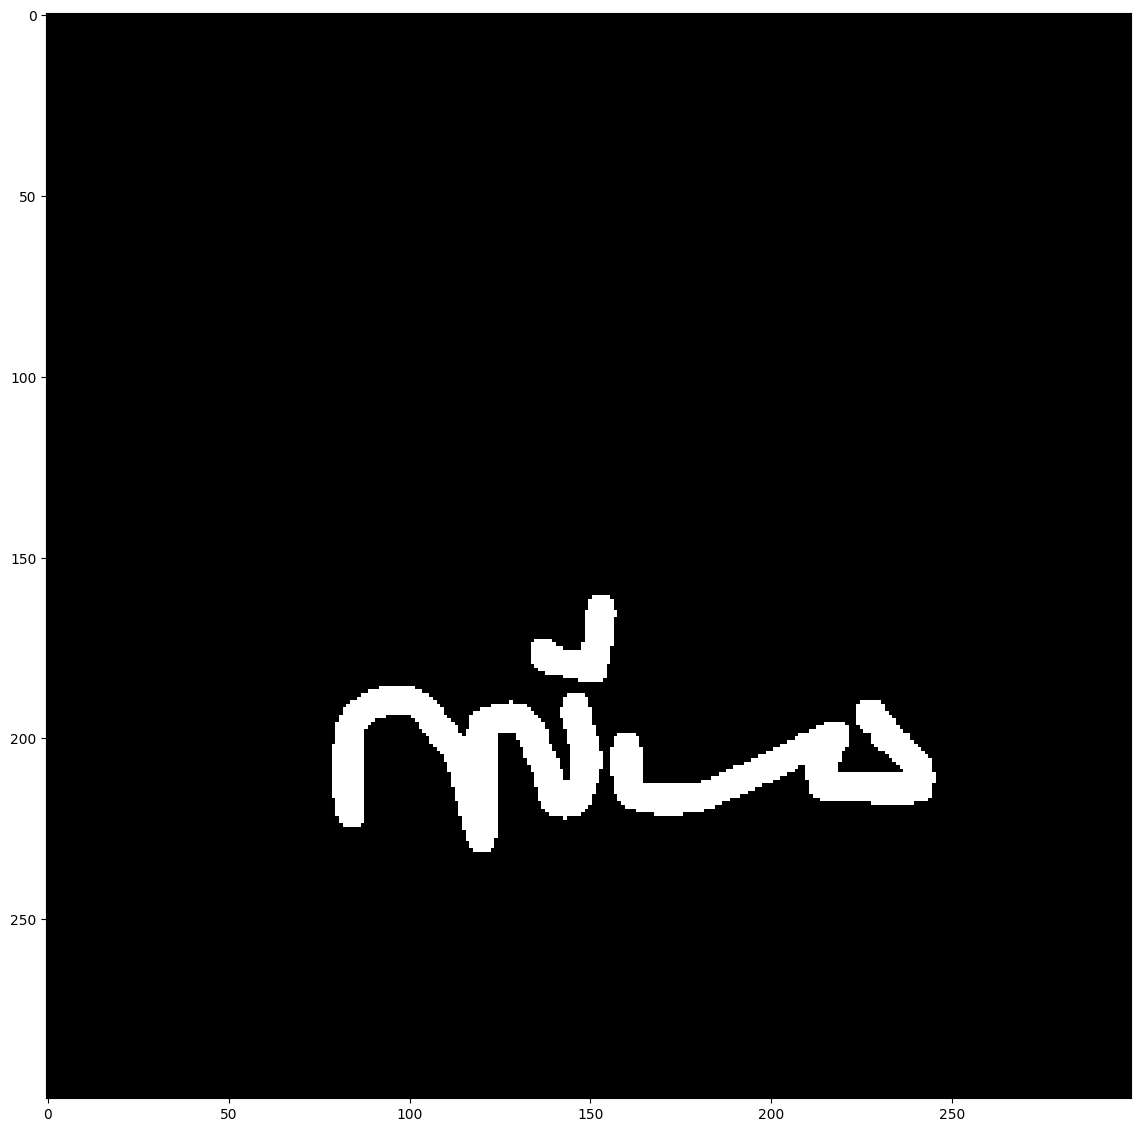

Predicted as ബ്ല


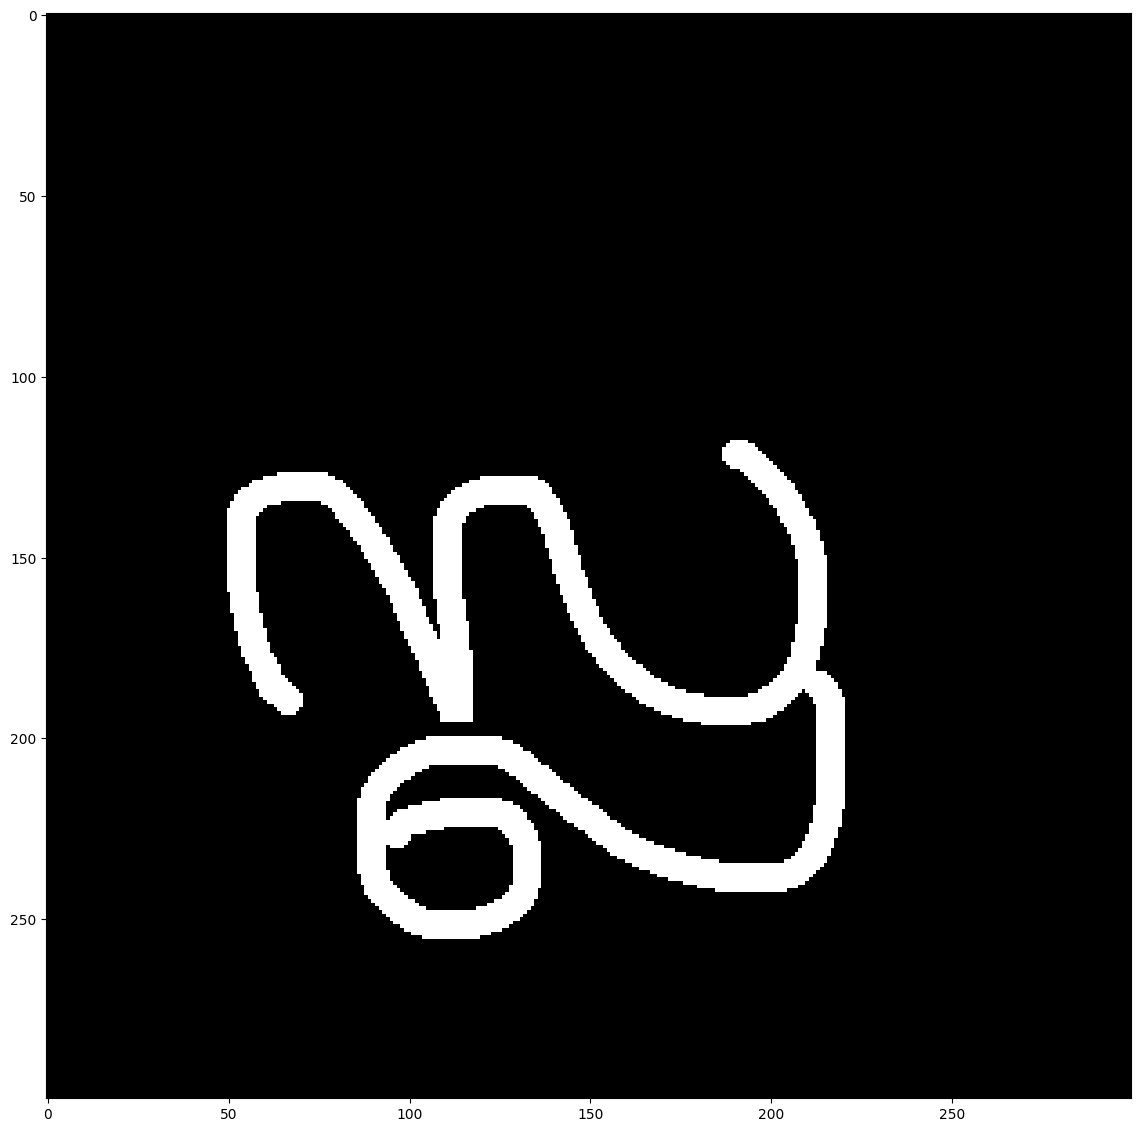

Predicted as സ


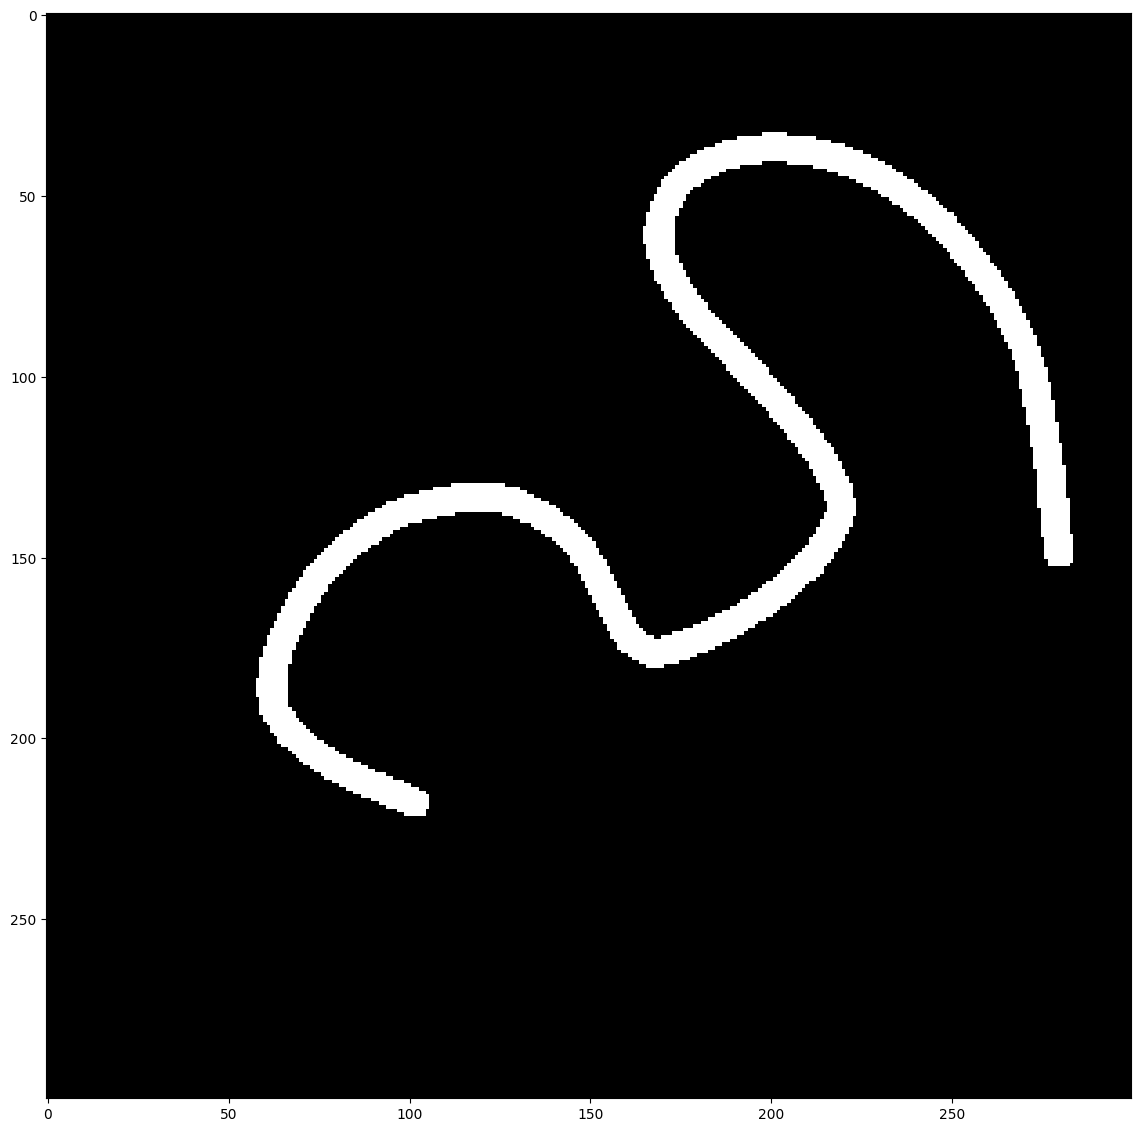

Predicted as ഹ


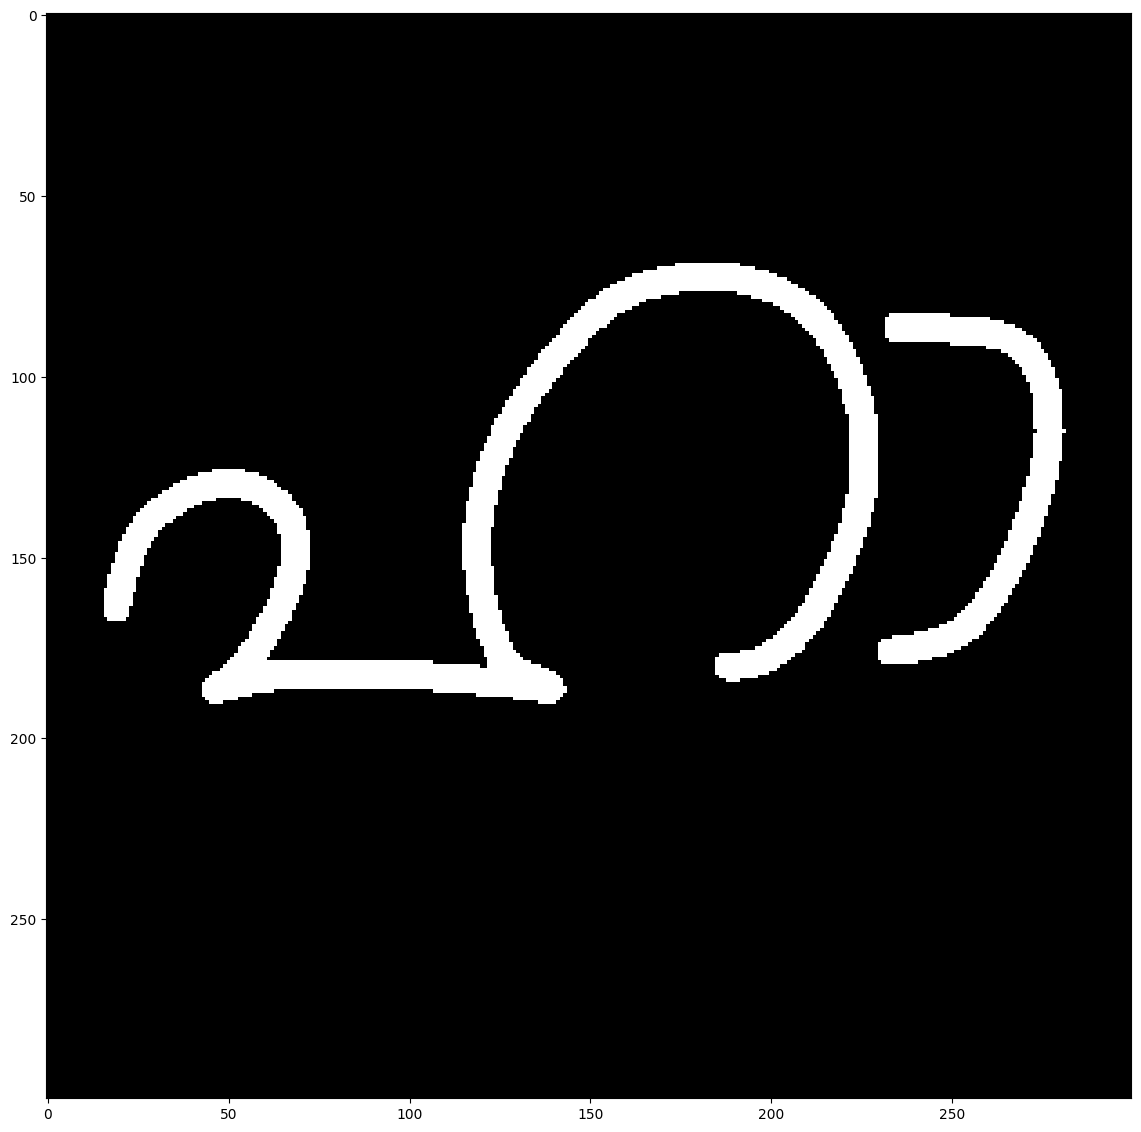

Predicted as ജ


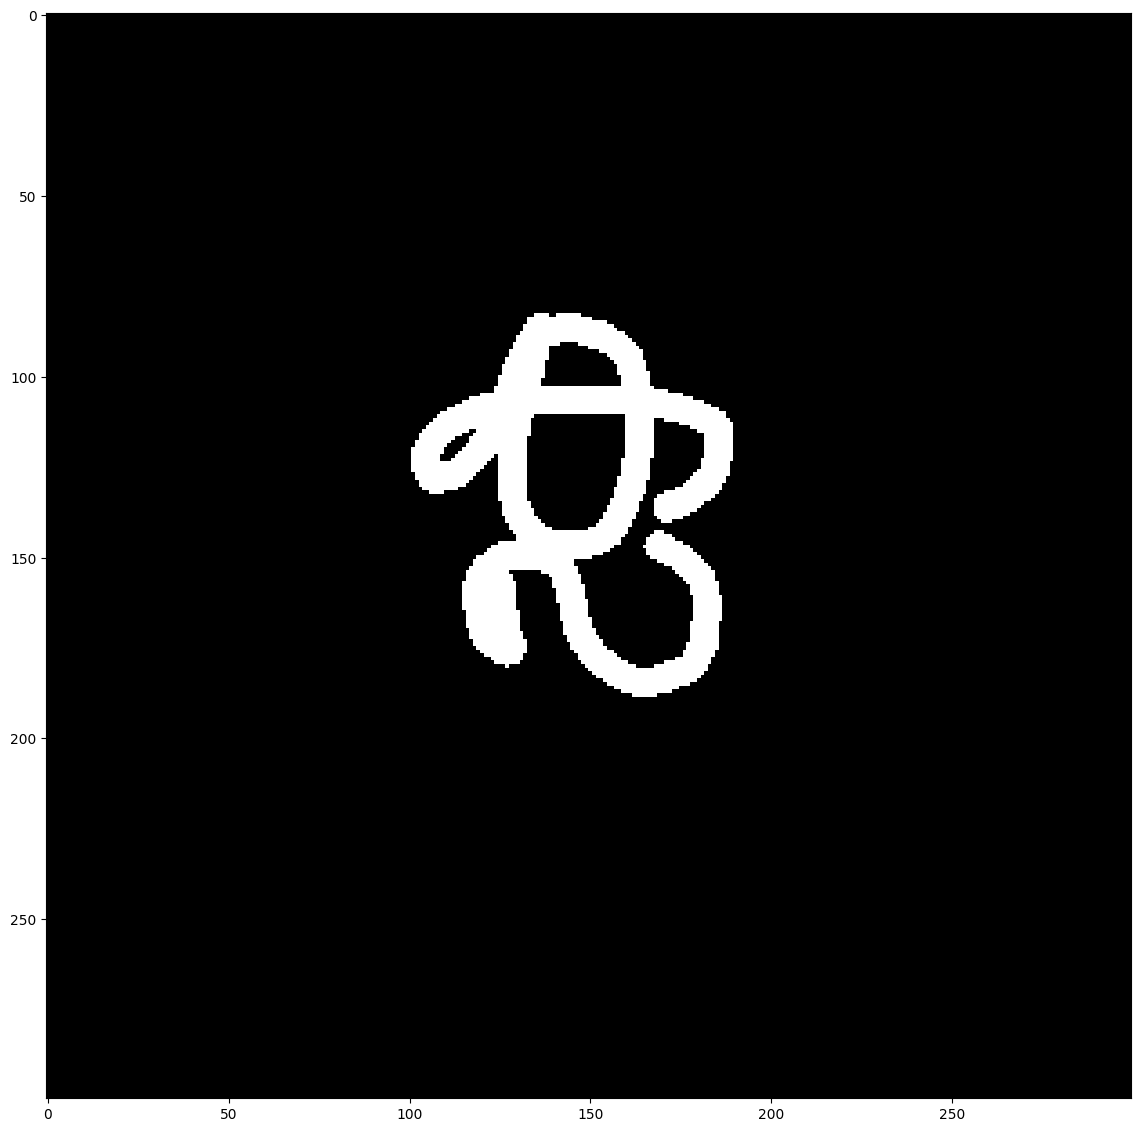

Predicted as എ


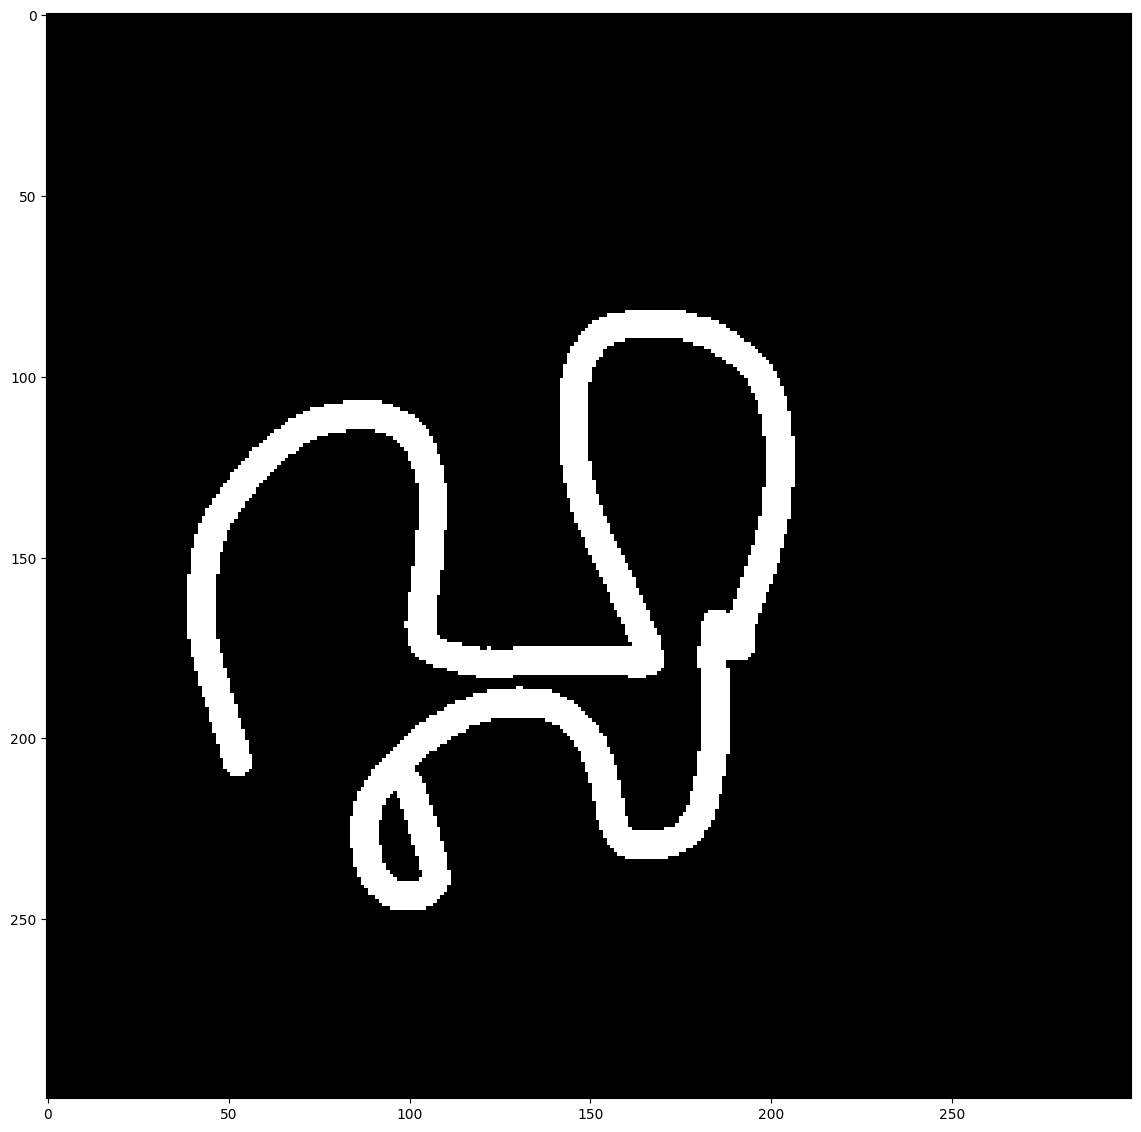

Predicted as എ


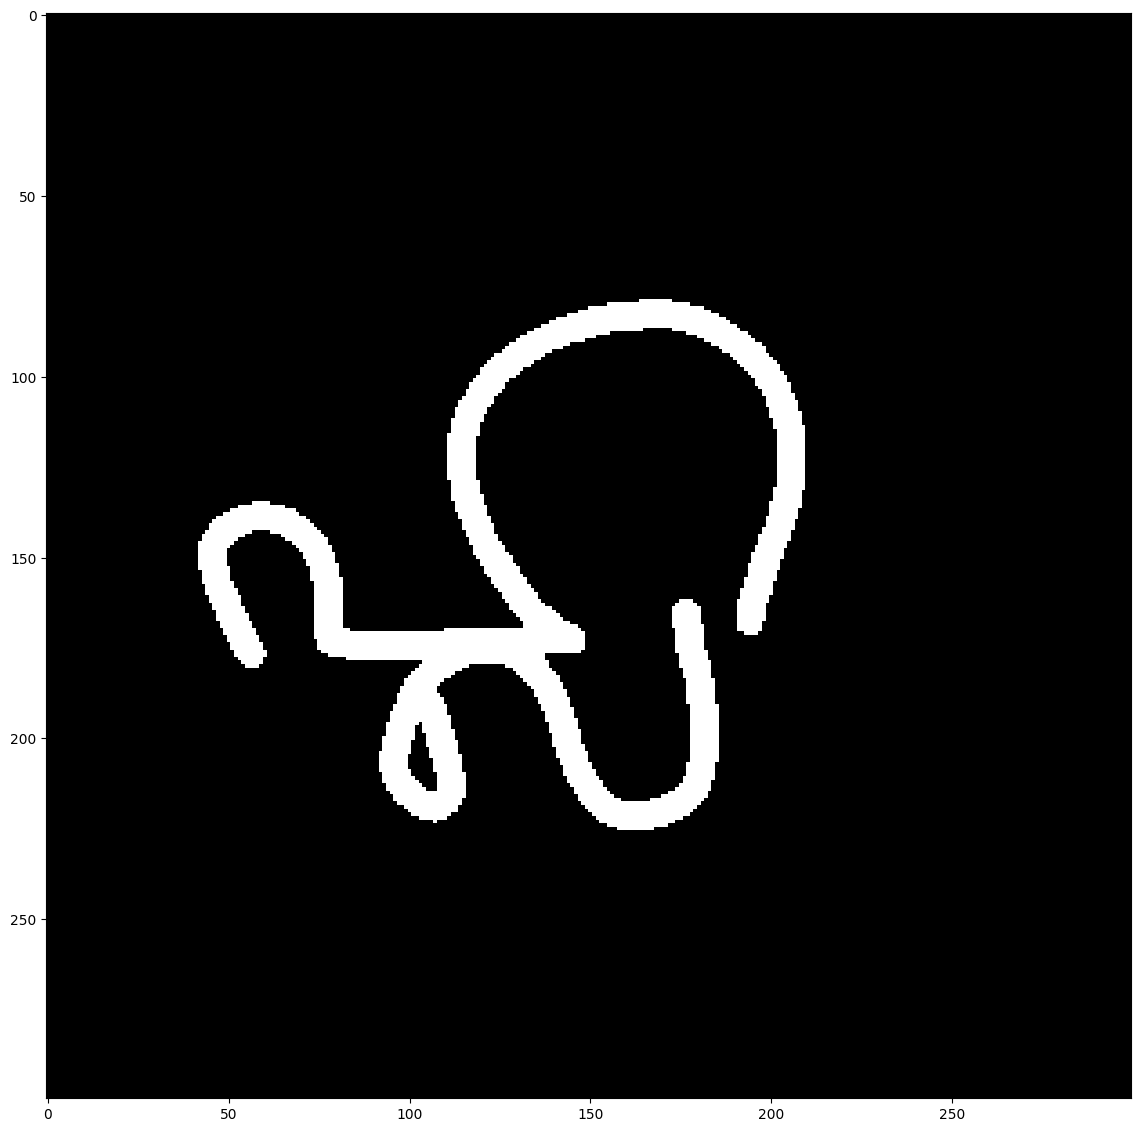

Predicted as ഠ


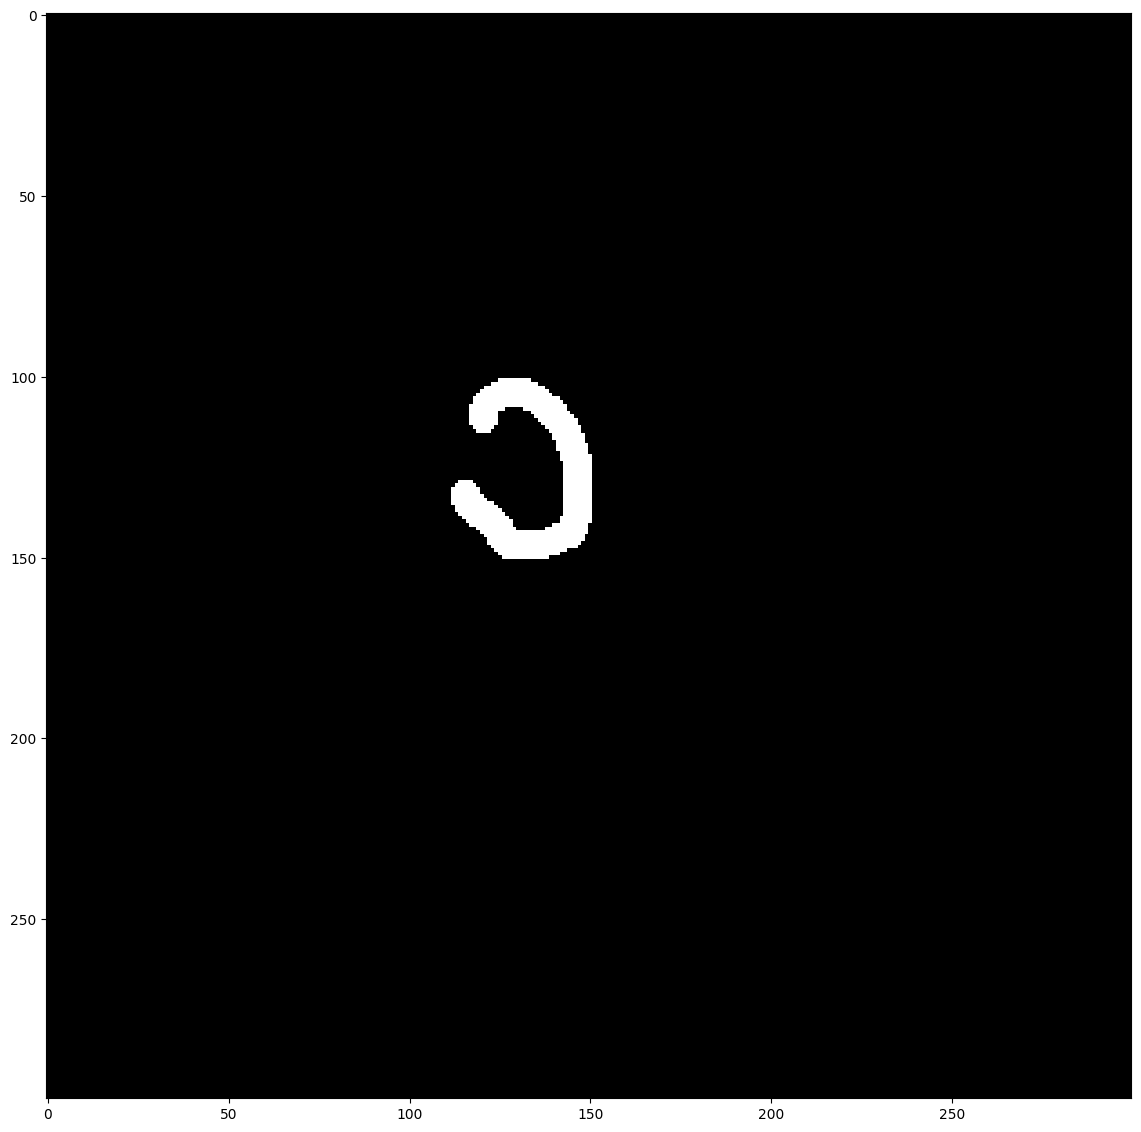

Predicted as ൂ


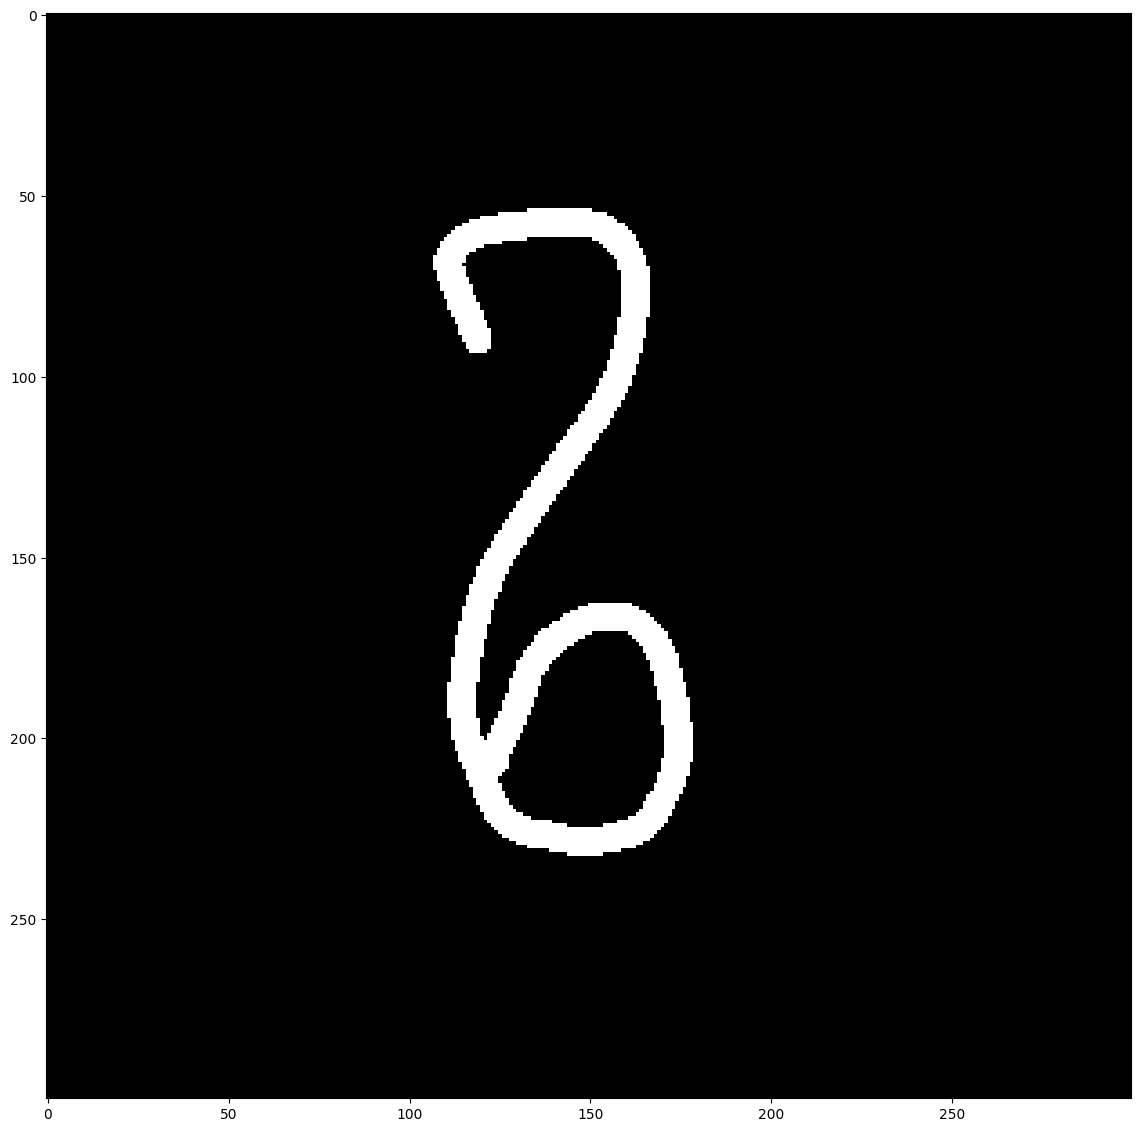

Predicted as ു


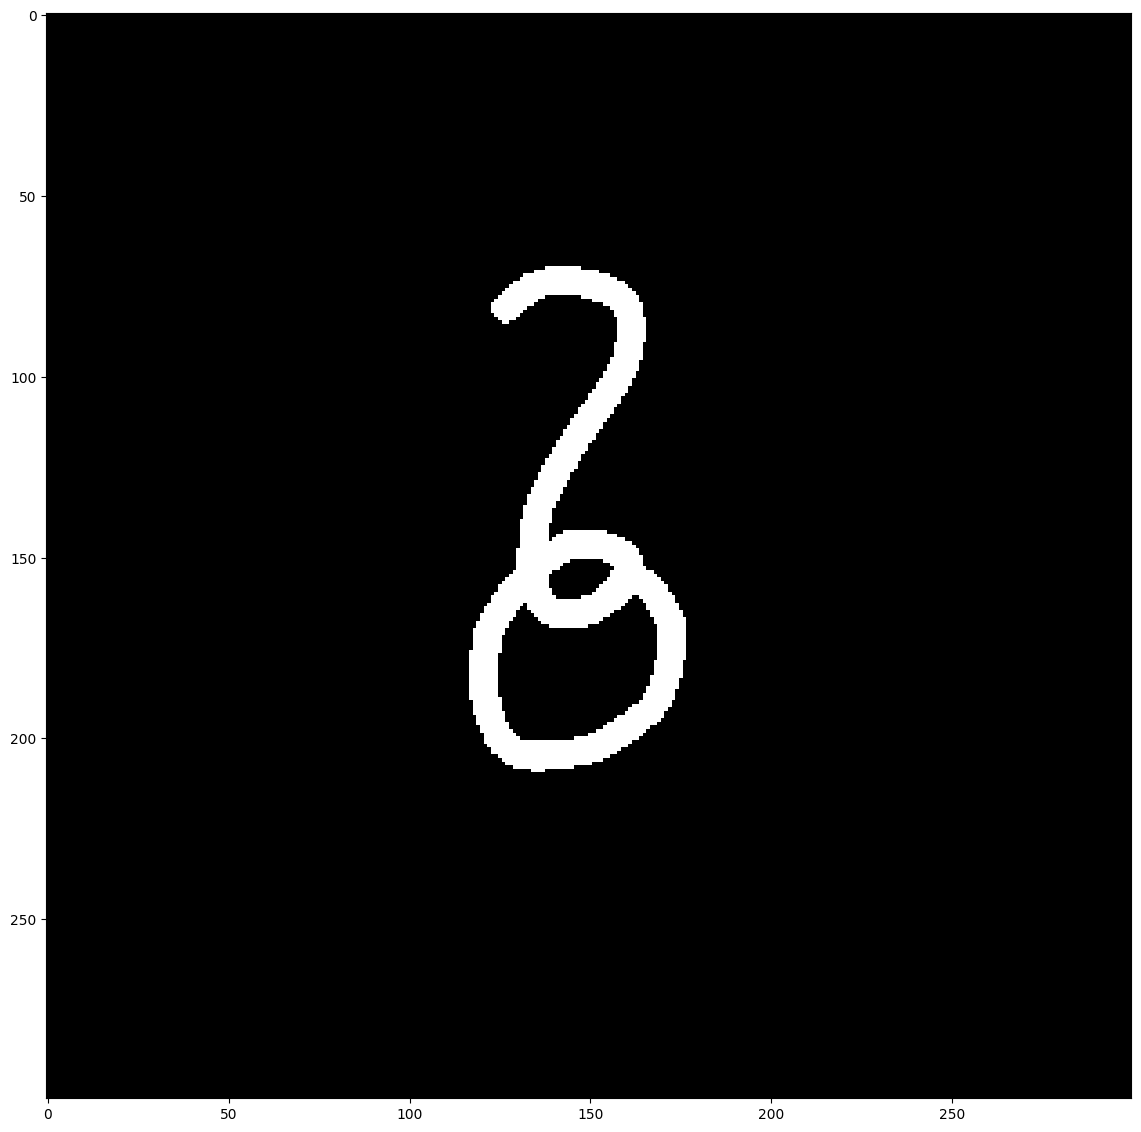

Predicted as ്യ


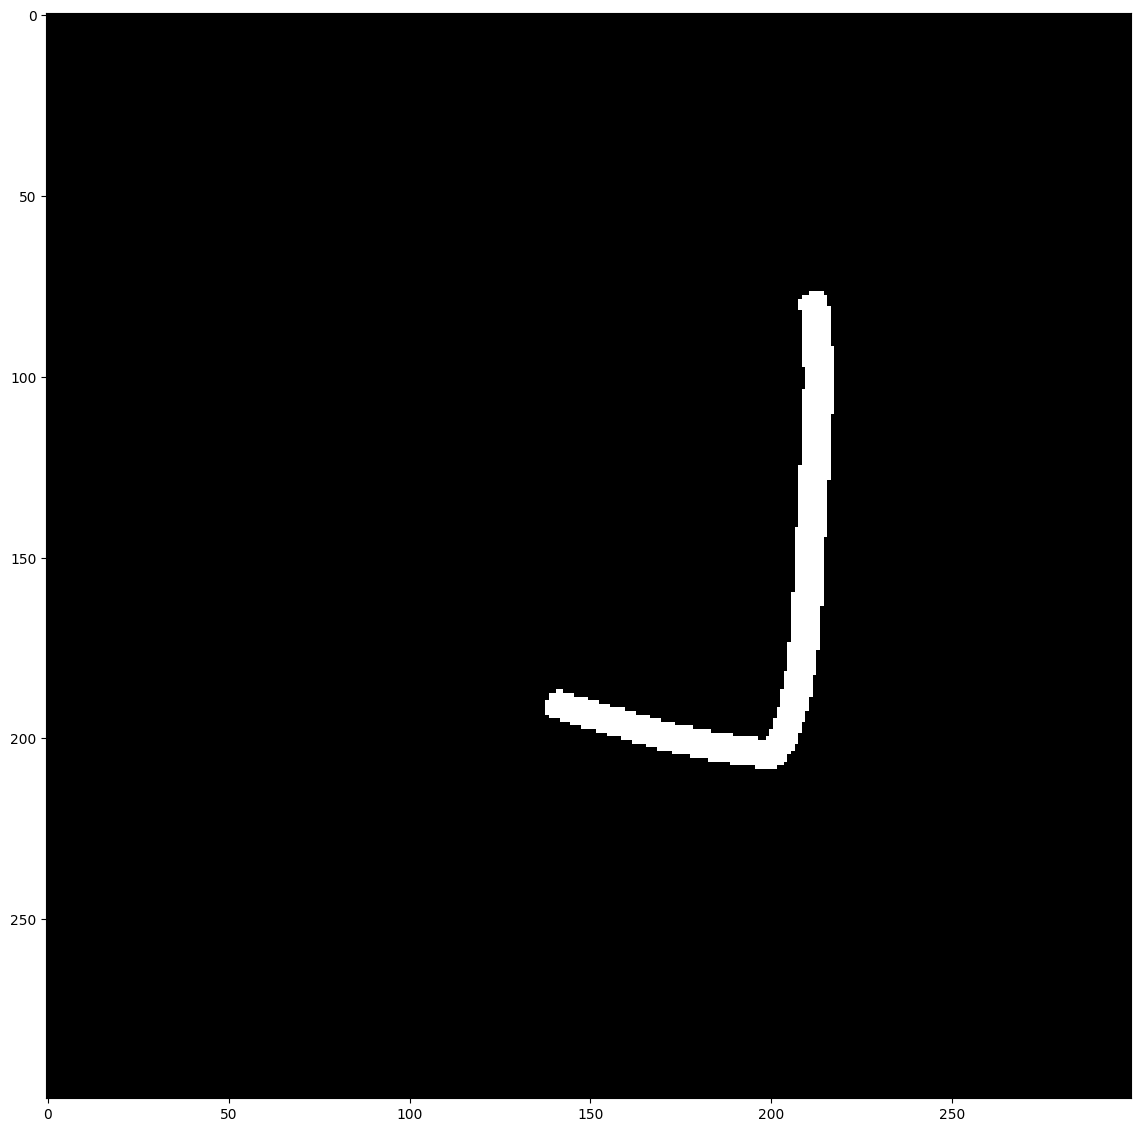

Predicted as വ


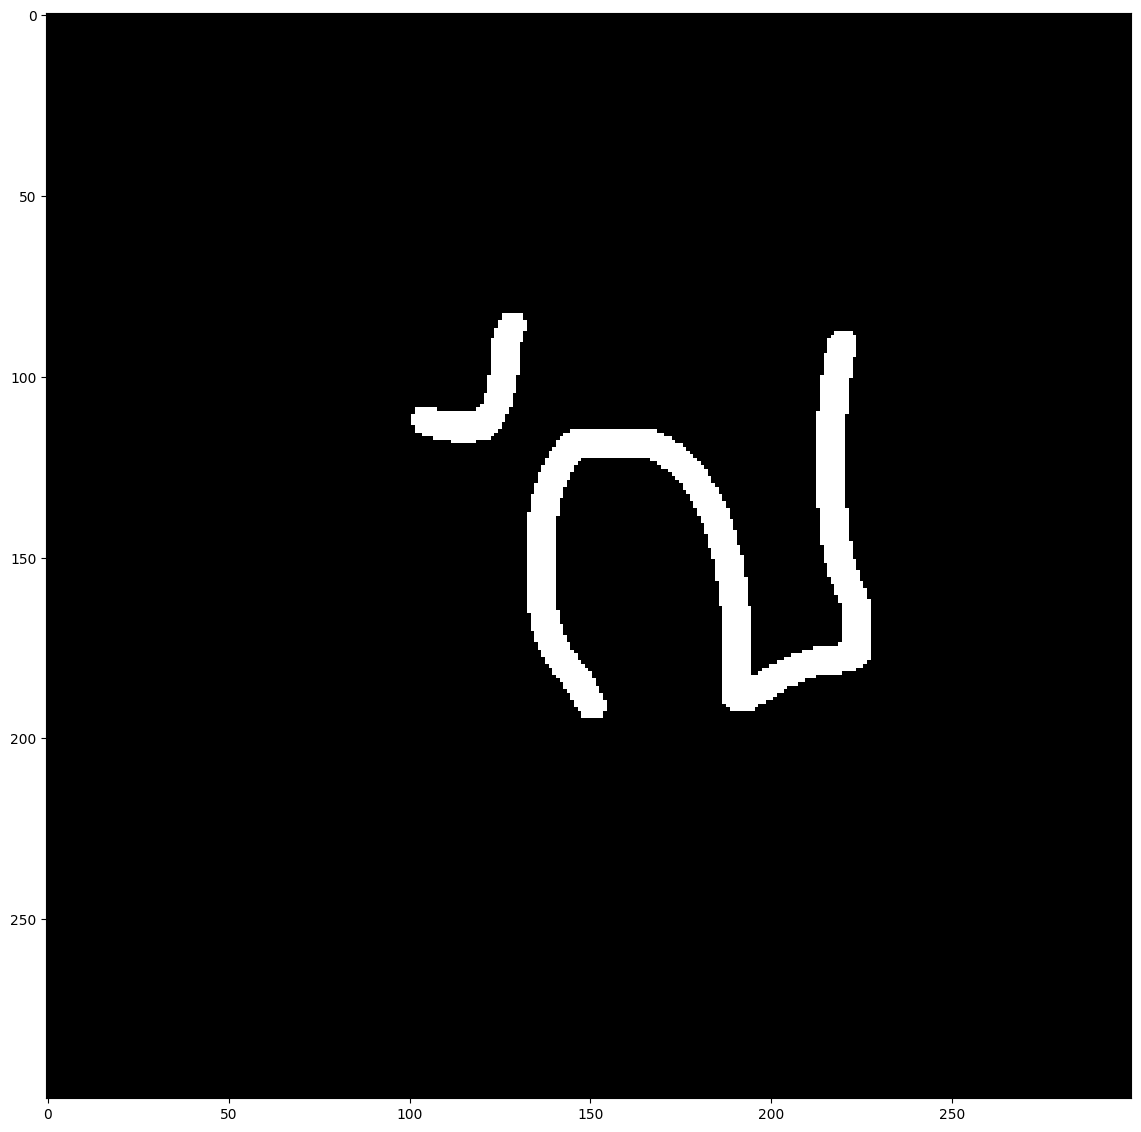

Predicted as ശ


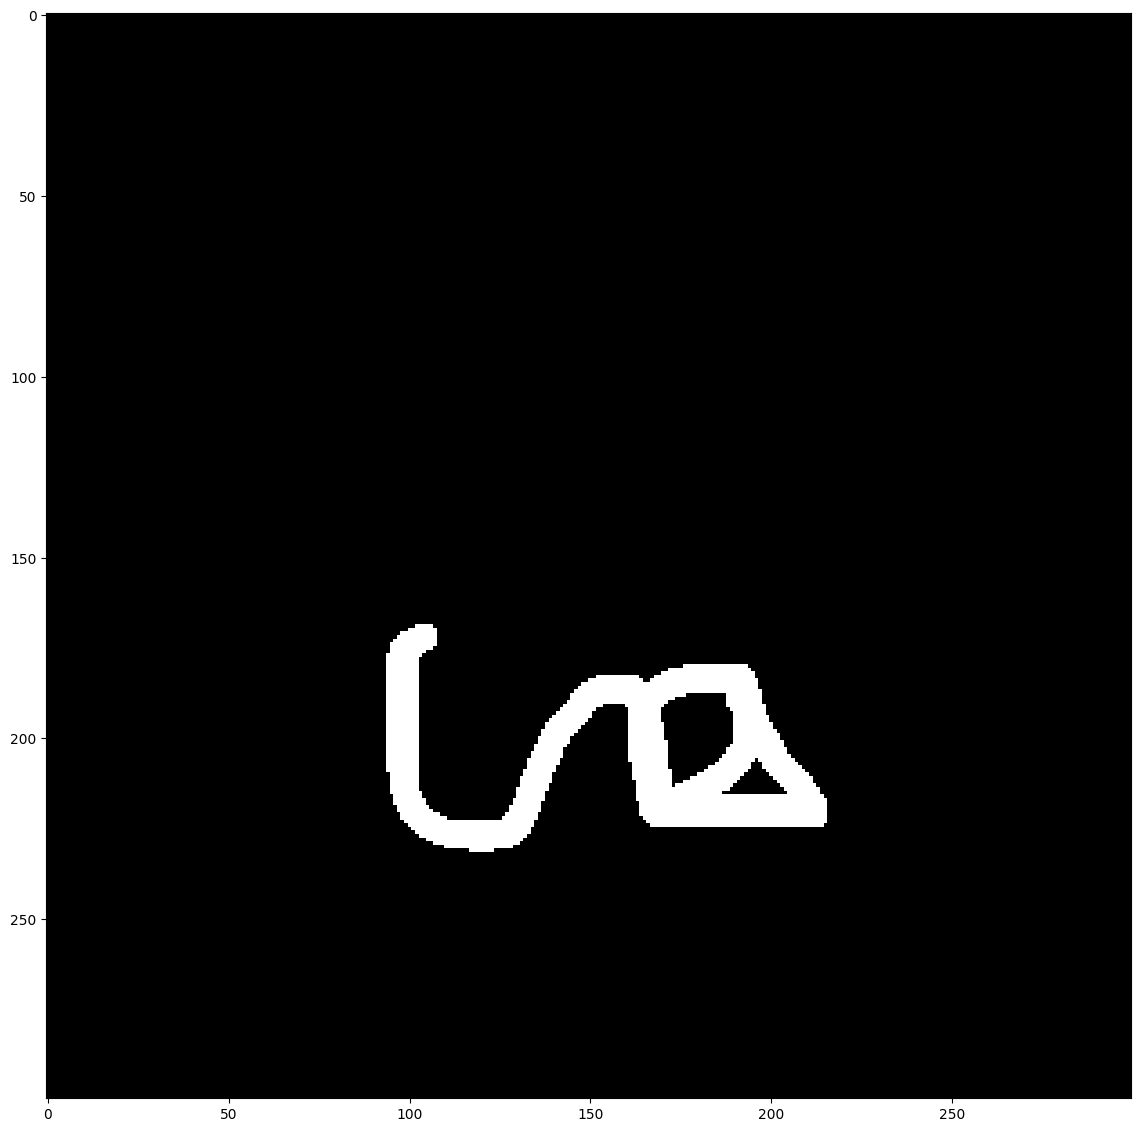

Predicted as ശ


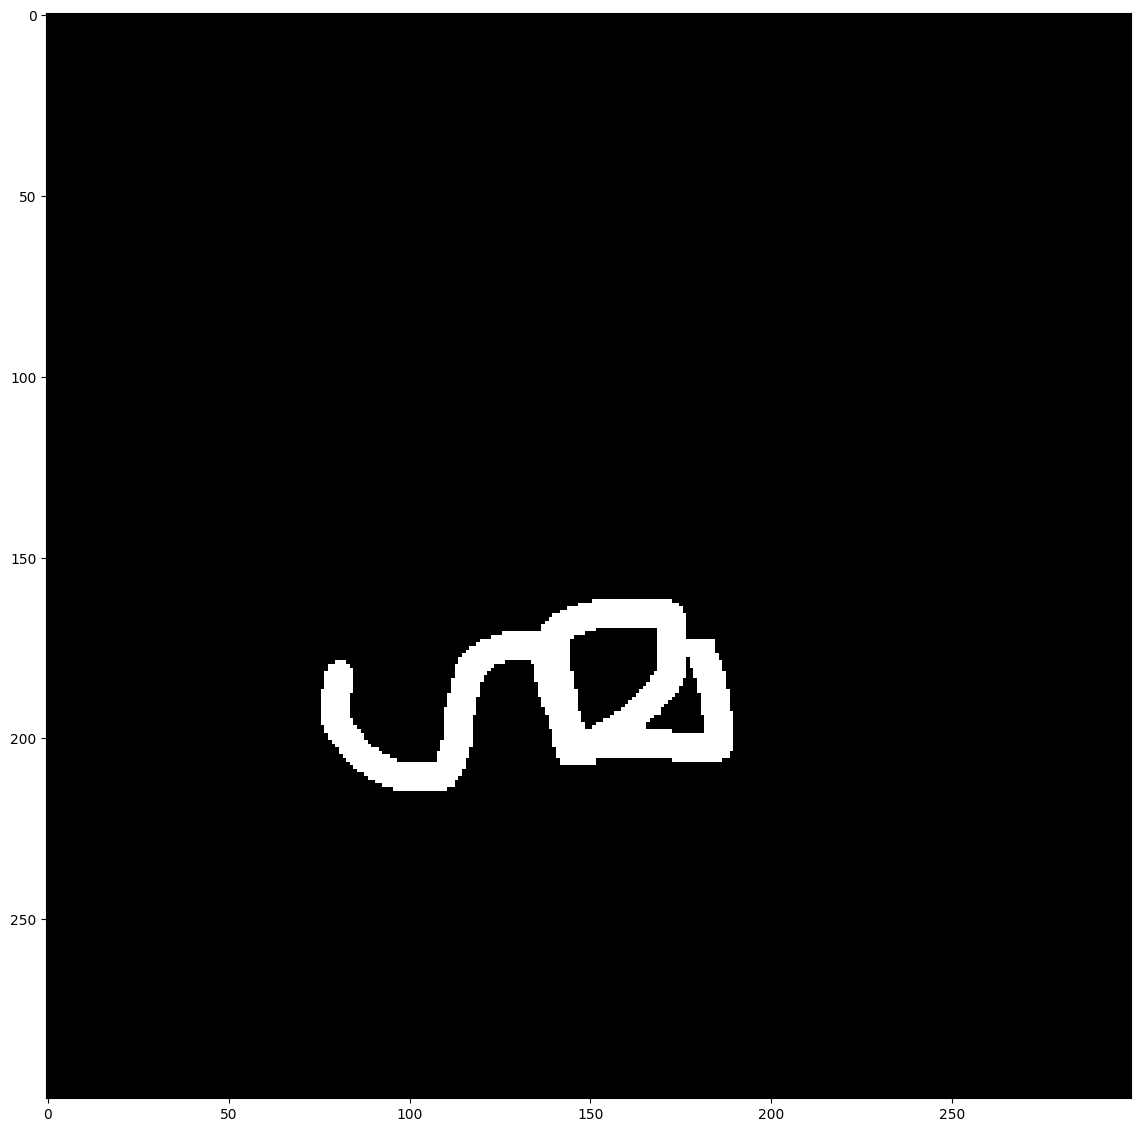

Predicted as ഴ


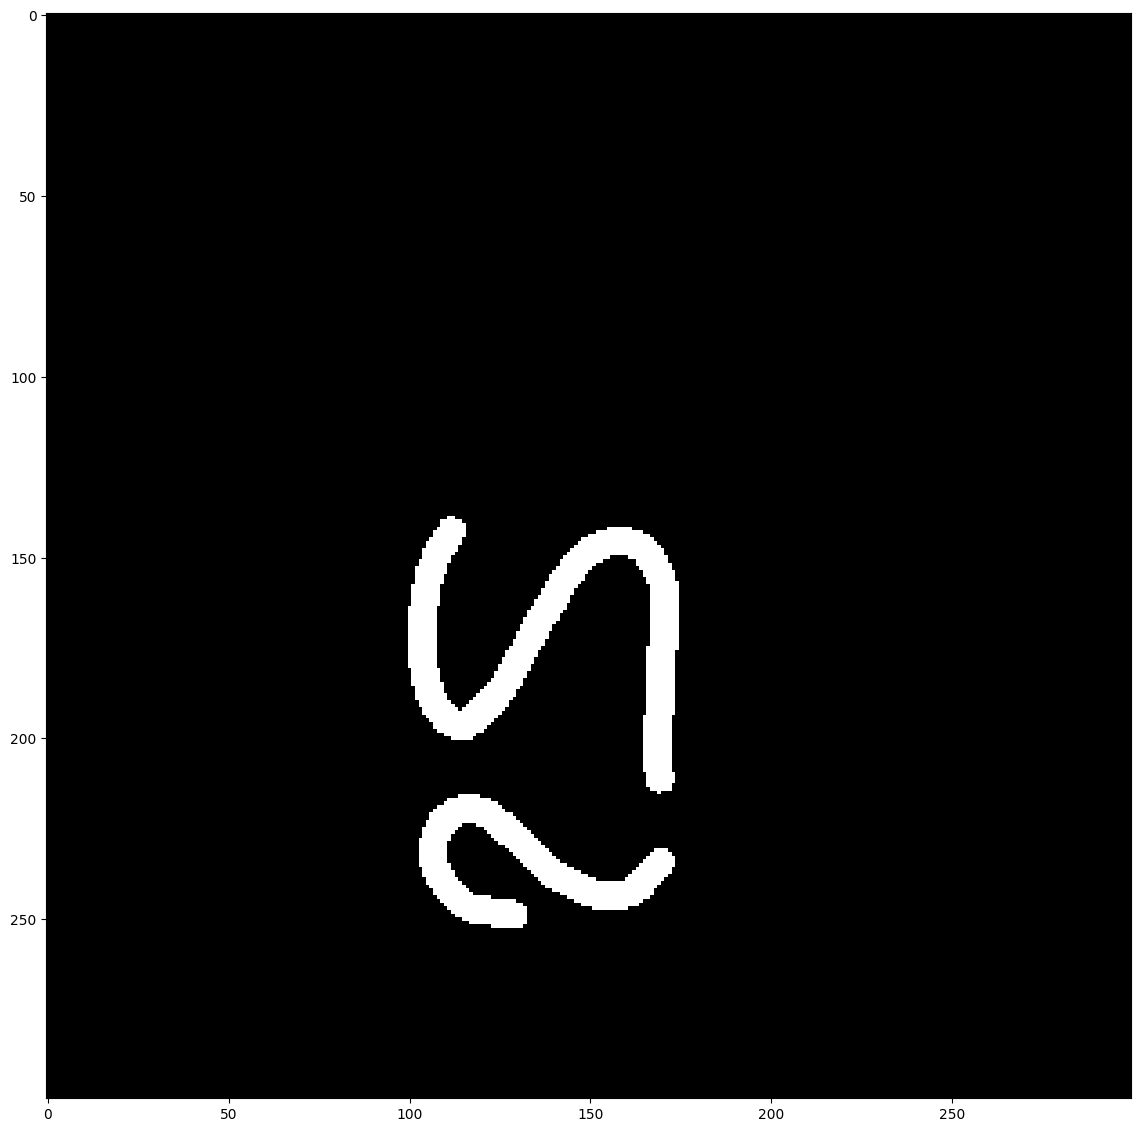

Predicted as ഉ


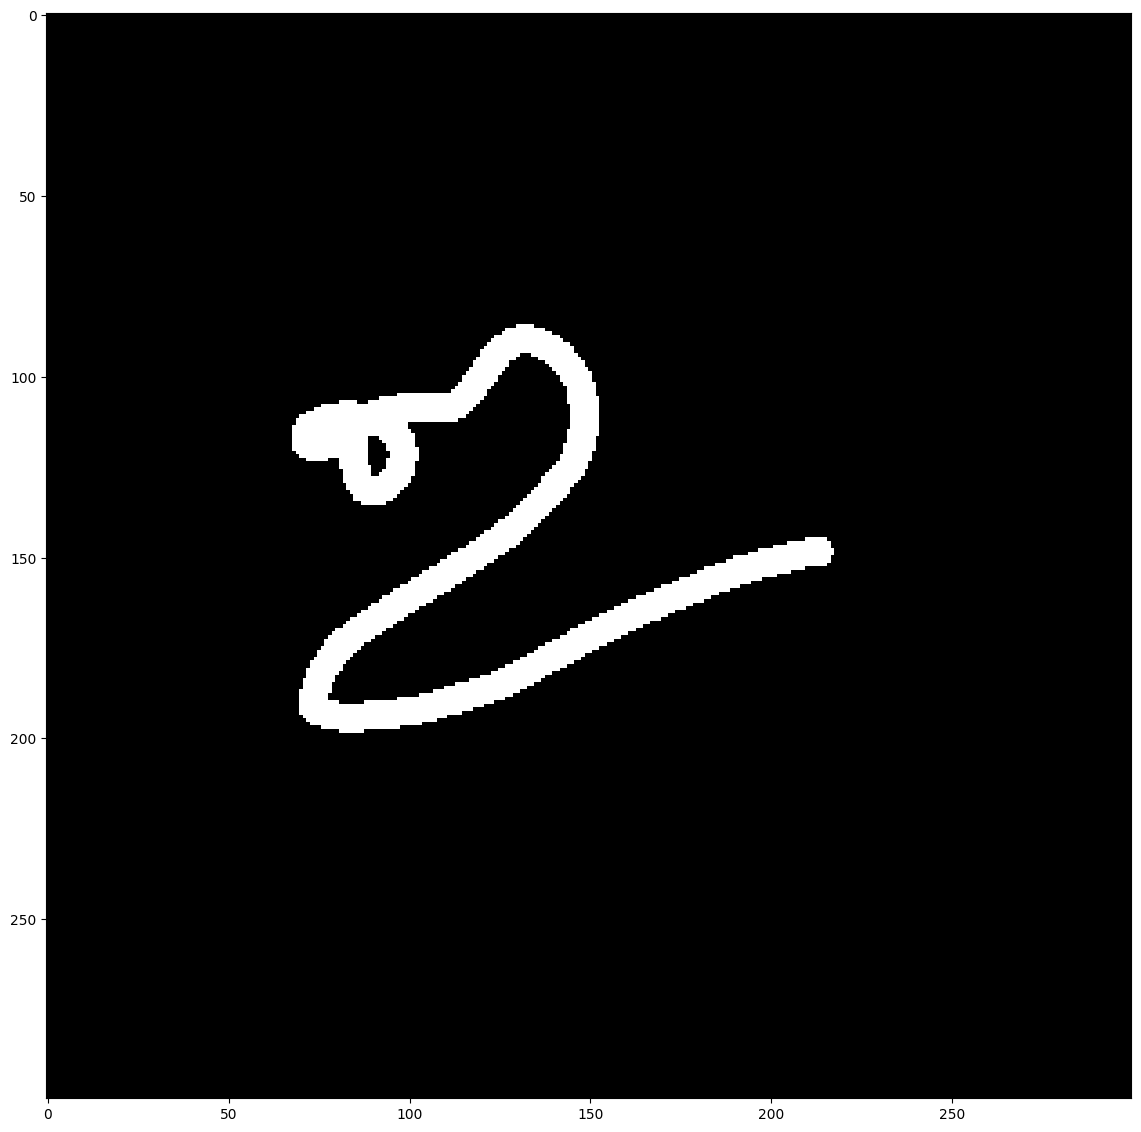

Predicted as ക്ക


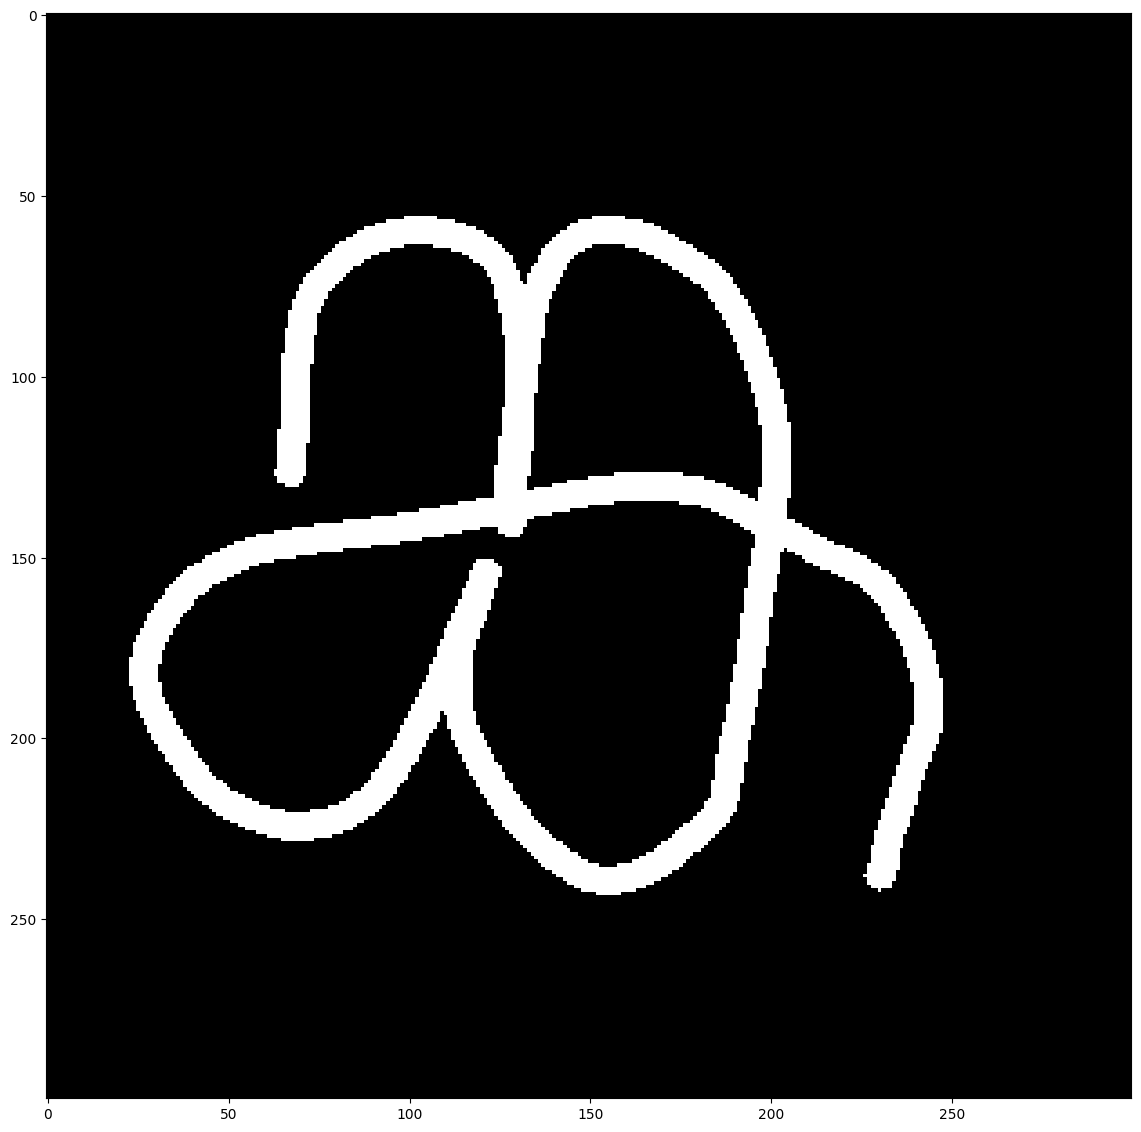

Predicted as ജ


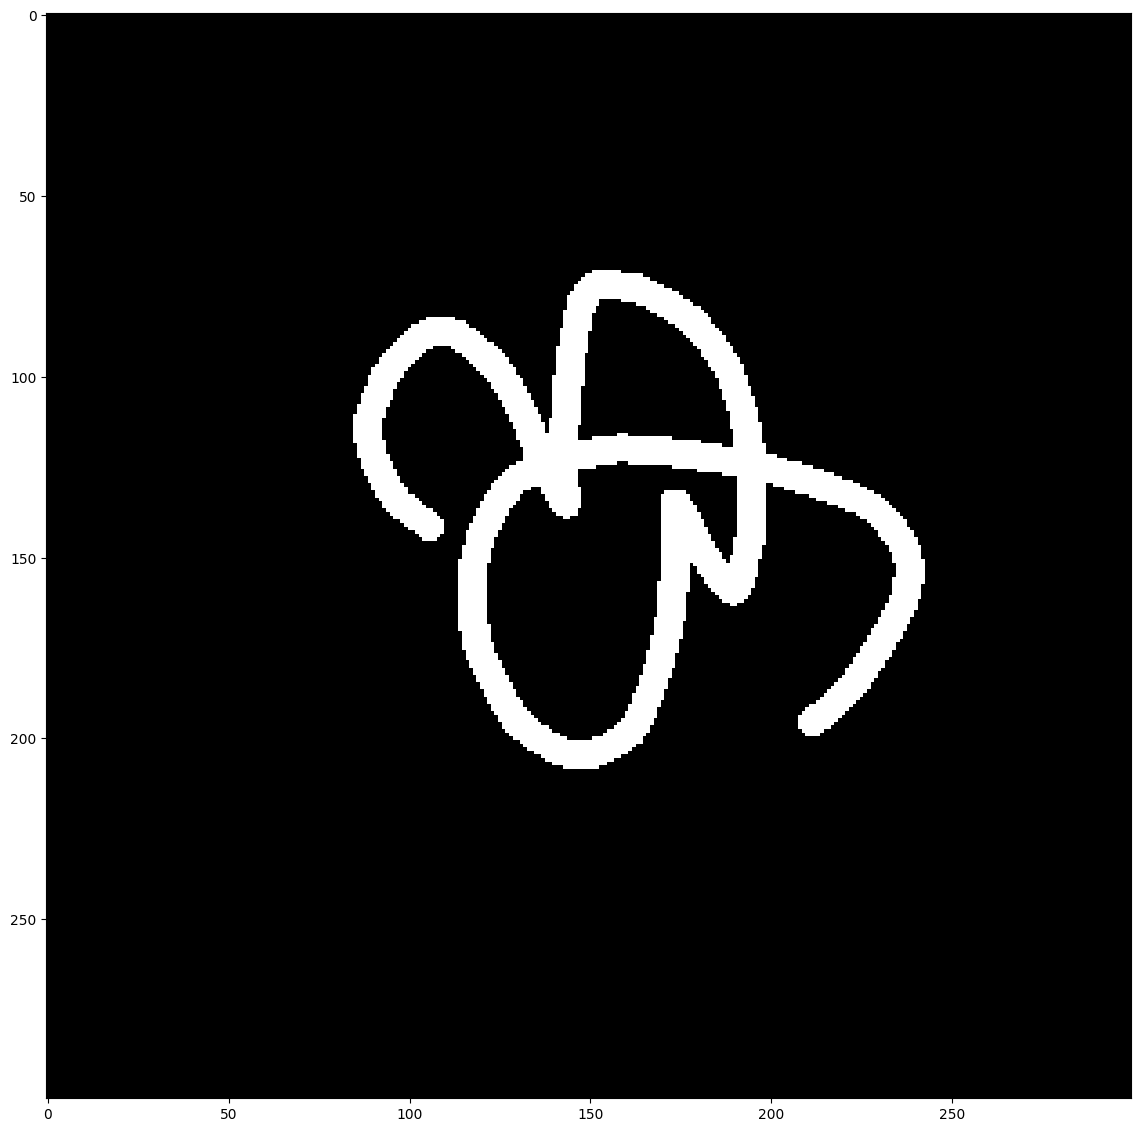

Predicted as ണ്ട


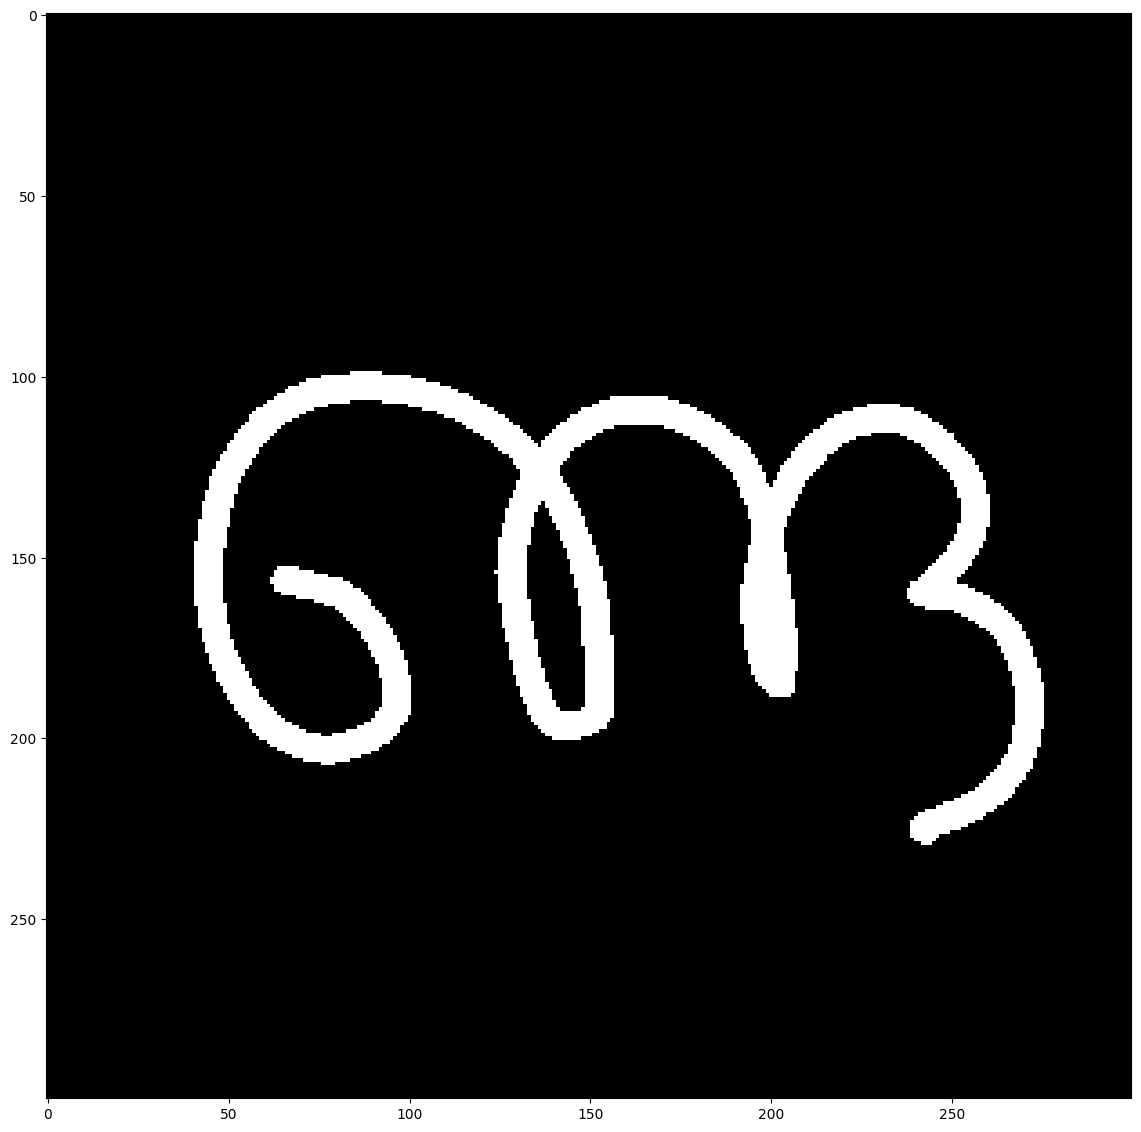

Predicted as ഷ


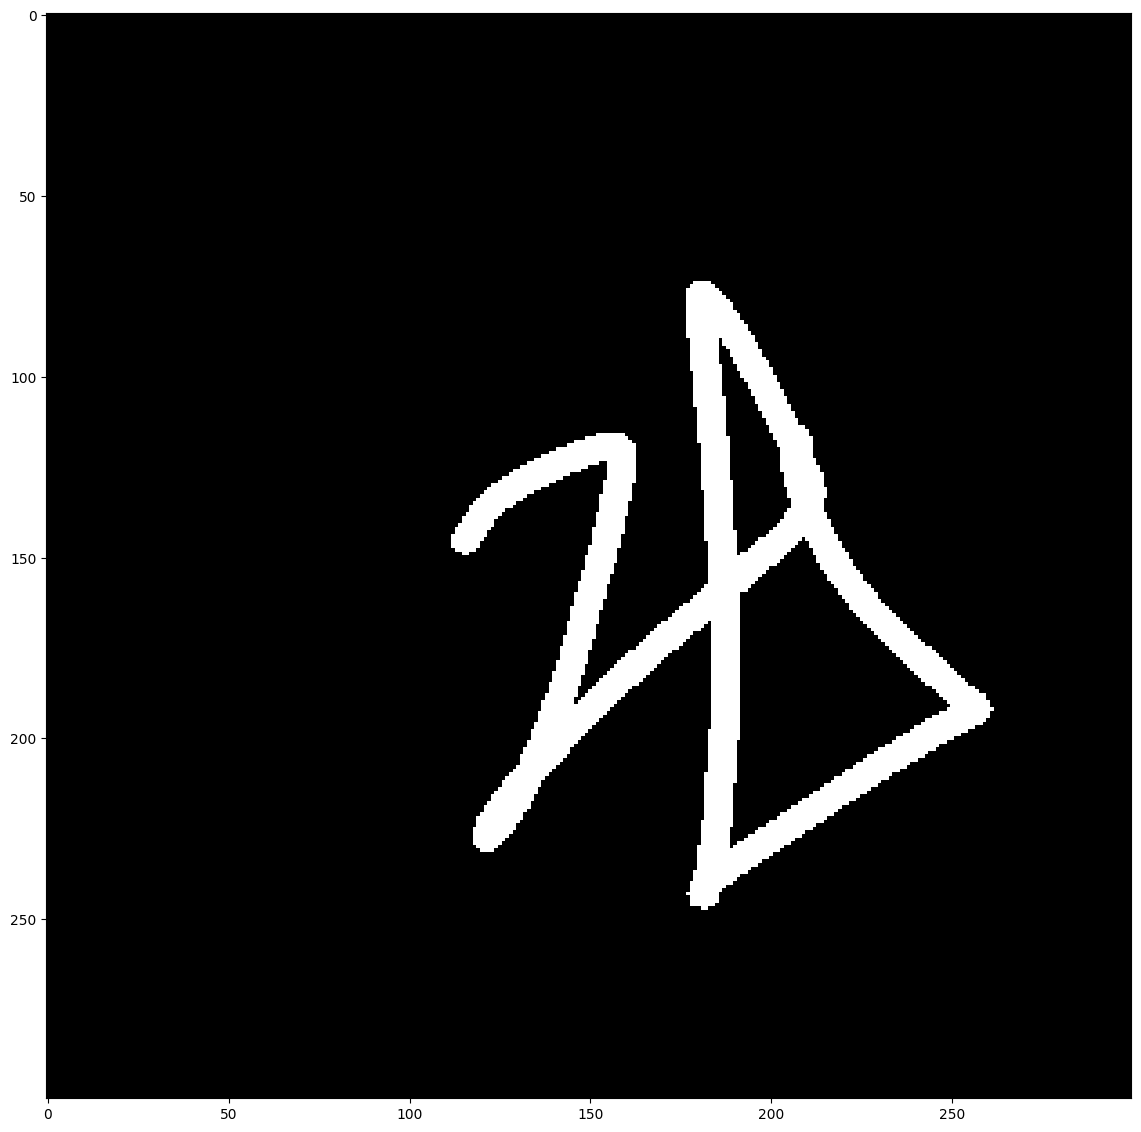

Predicted as ഭ


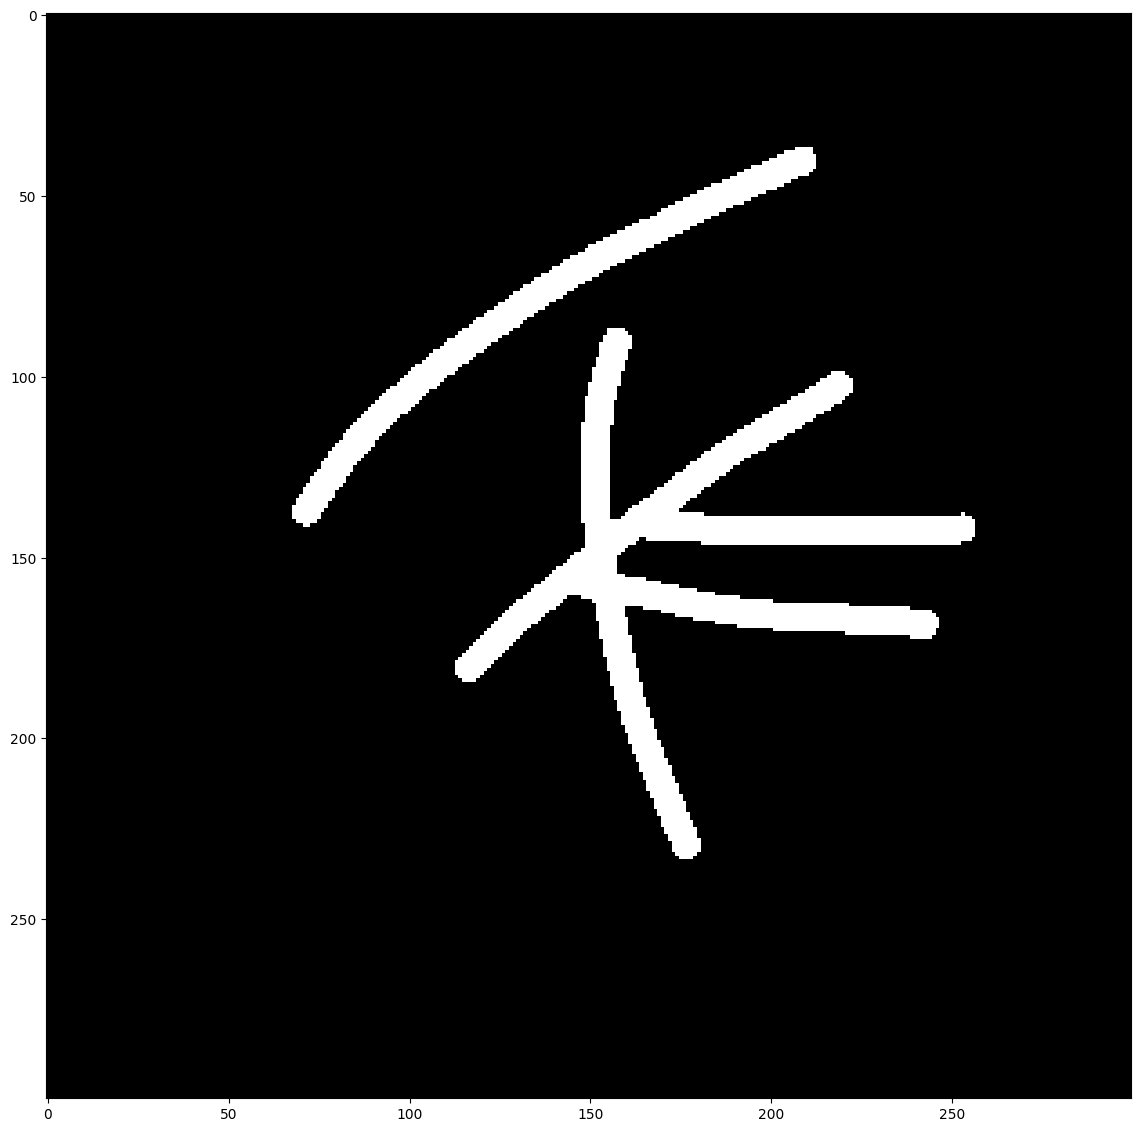

Predicted as ക


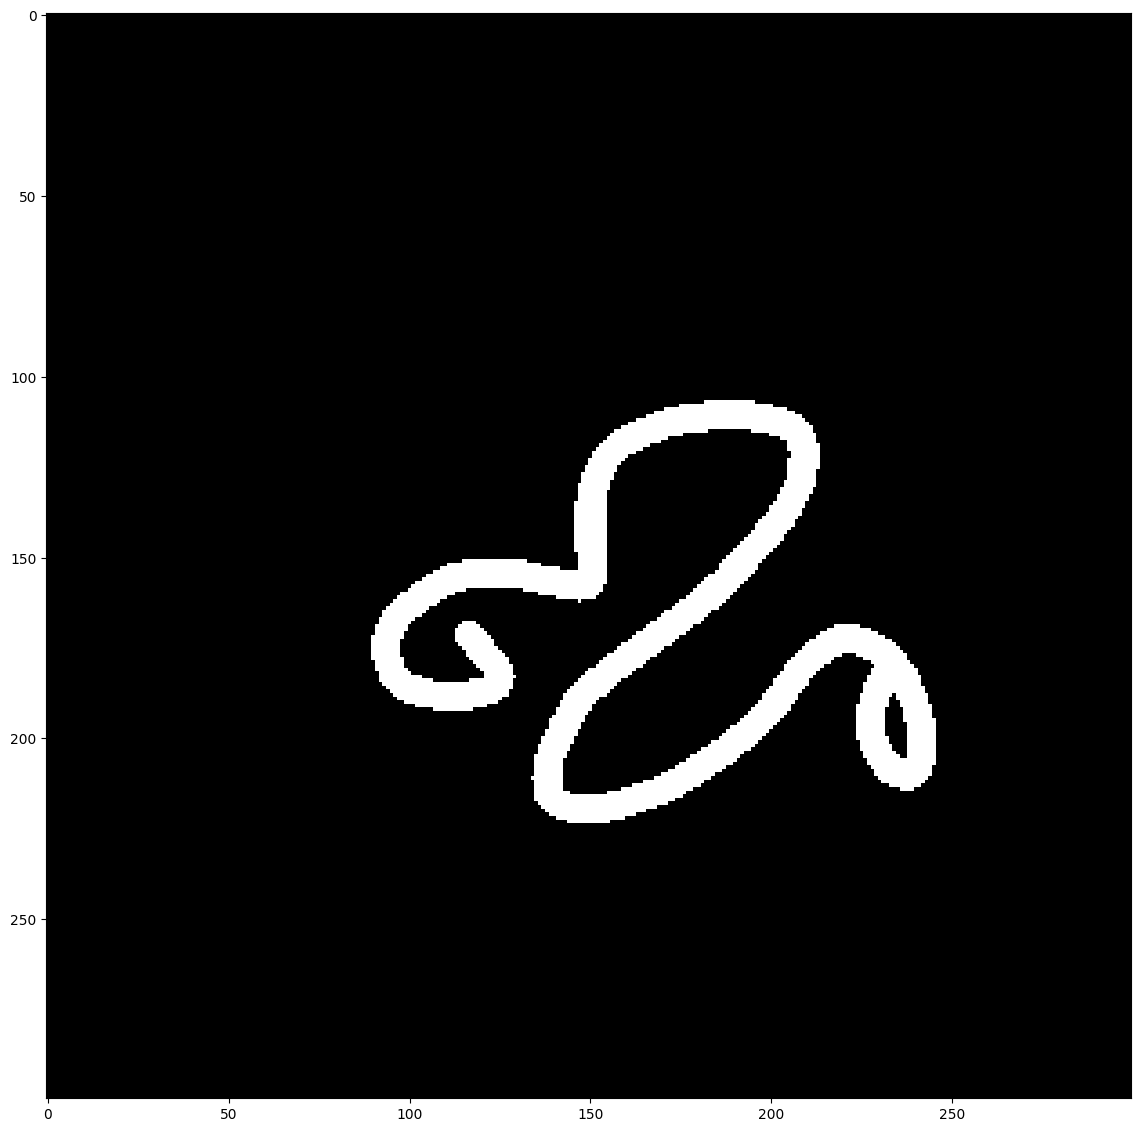

Predicted as ങ്ങ


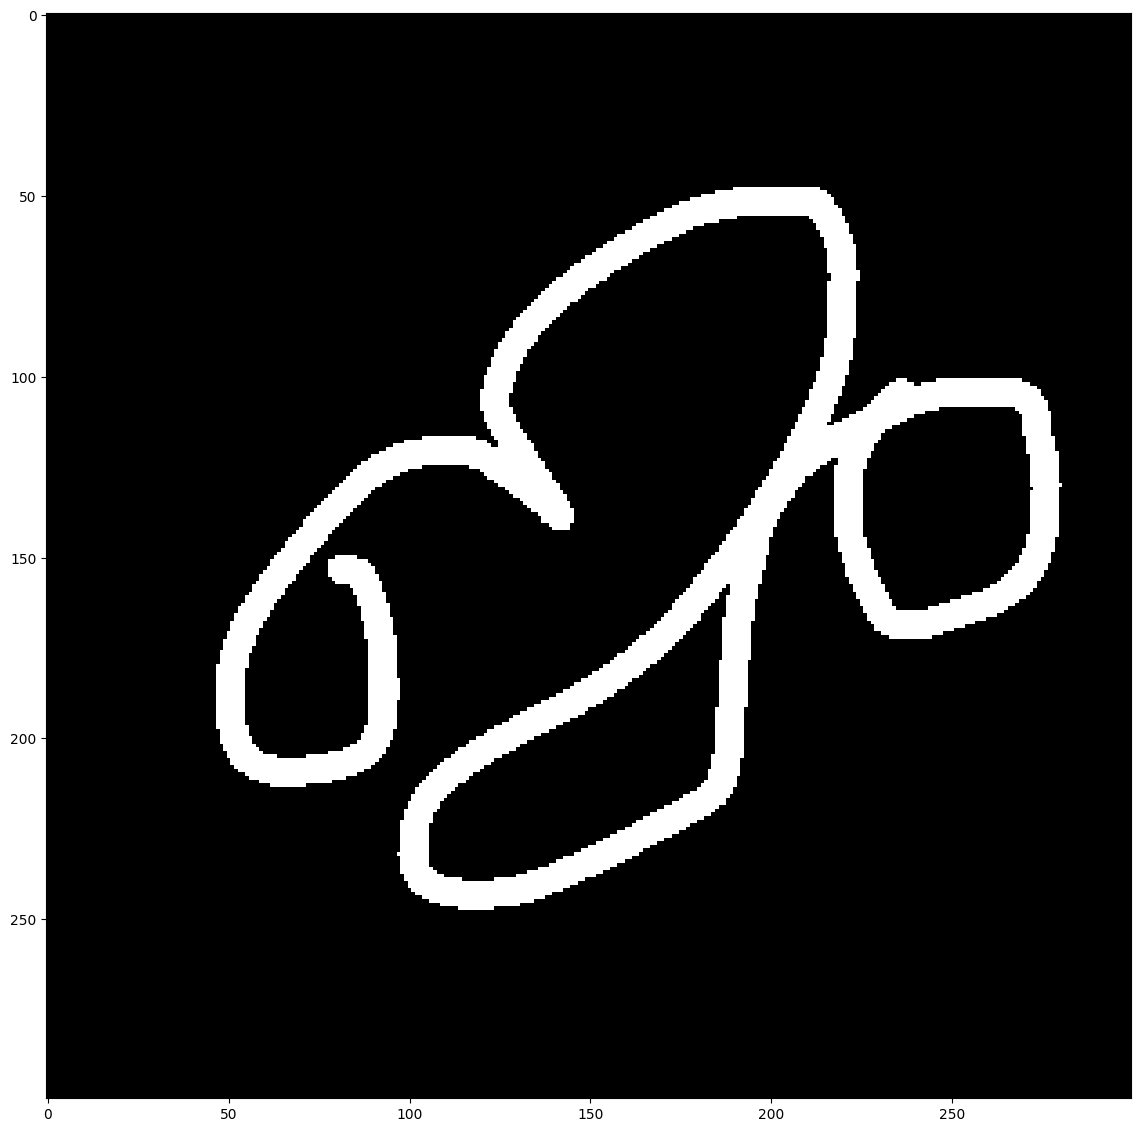

Predicted as ജ


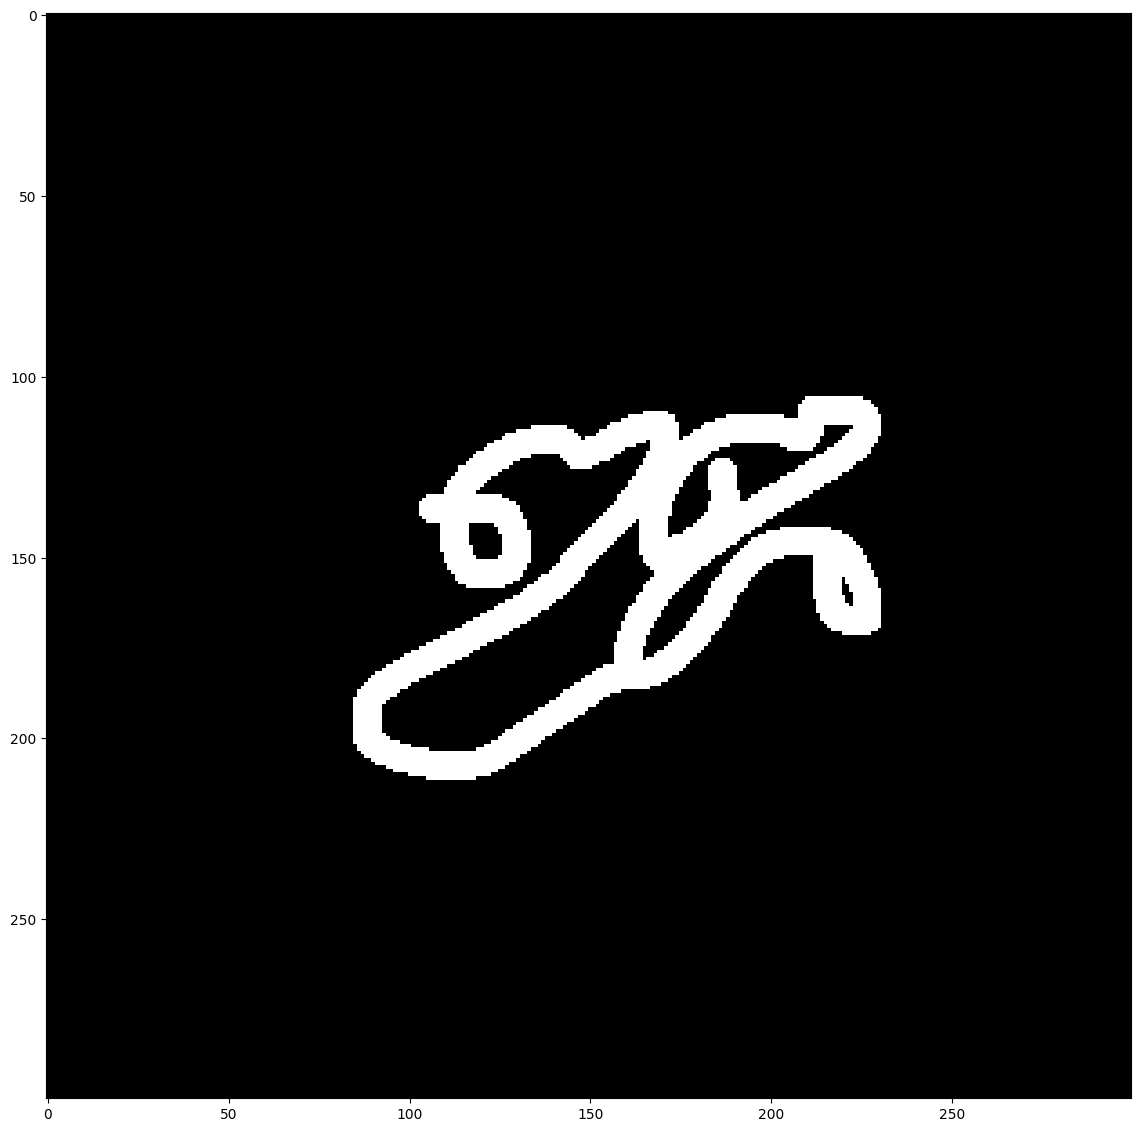

Predicted as ണ്ണ


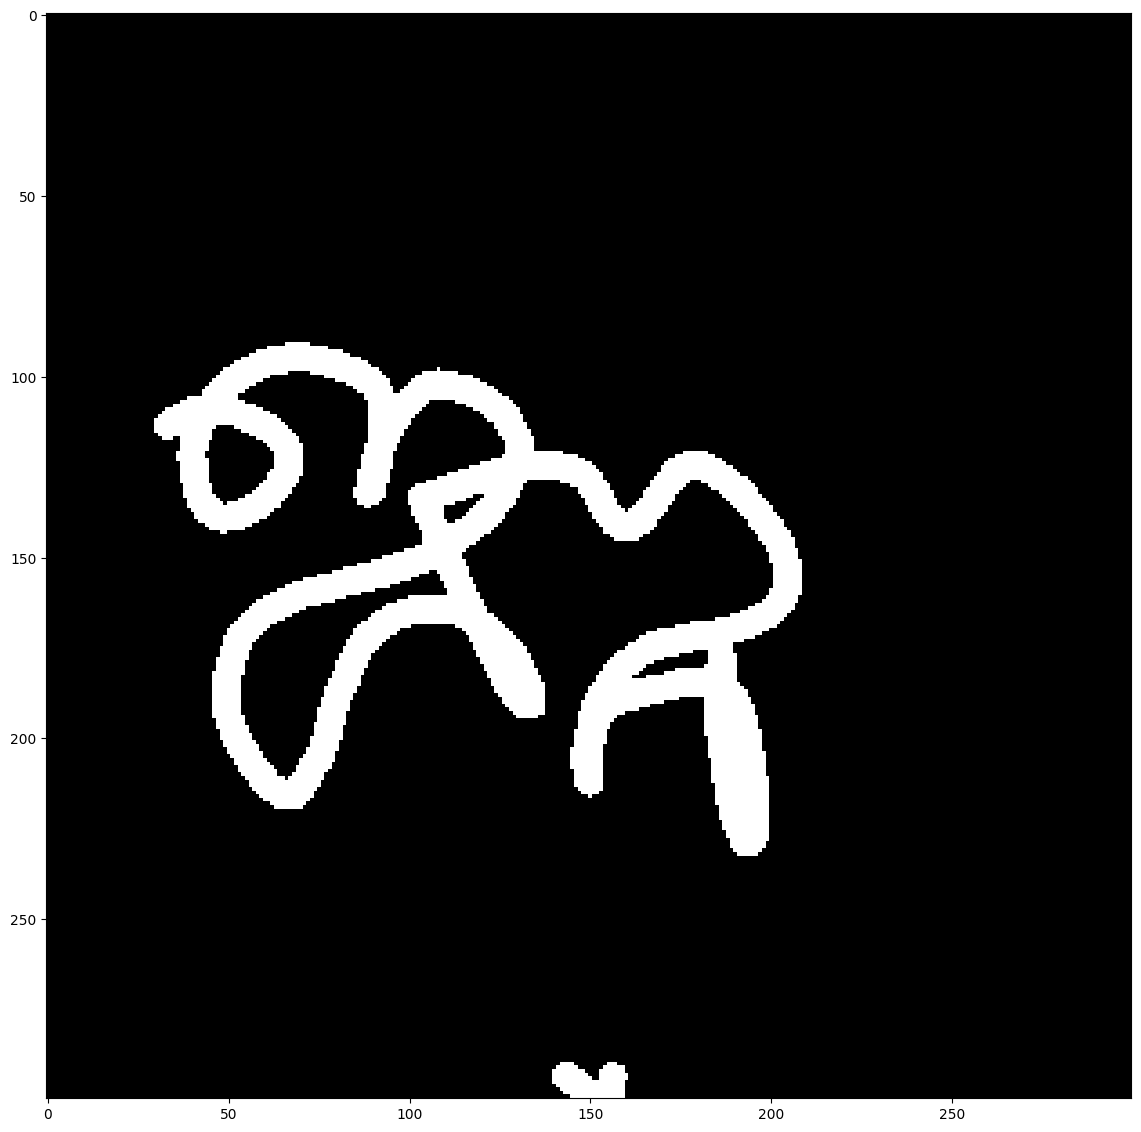

Predicted as ത്സ


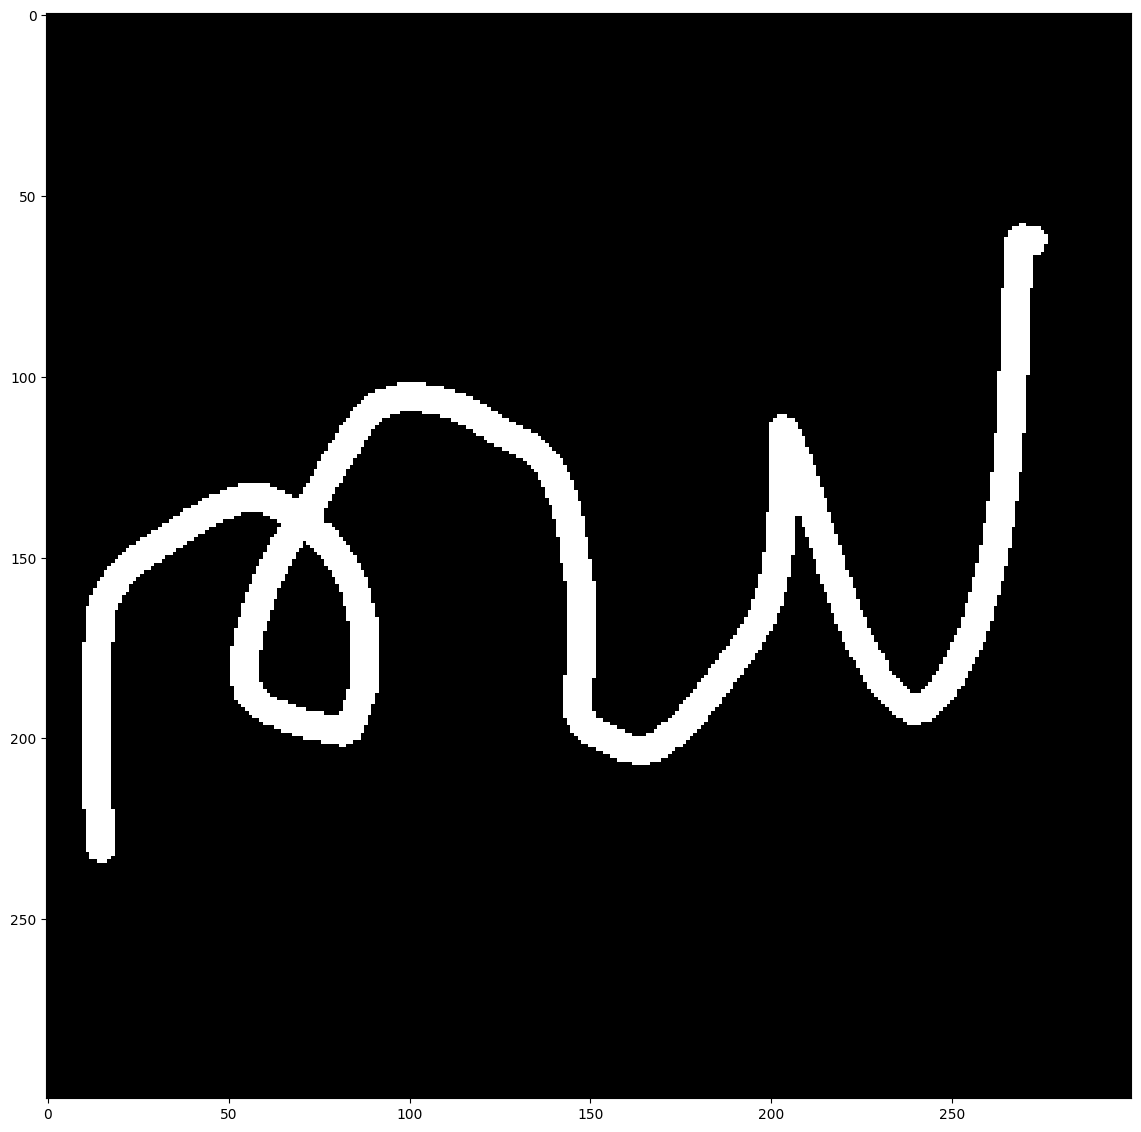

Predicted as ത്സ


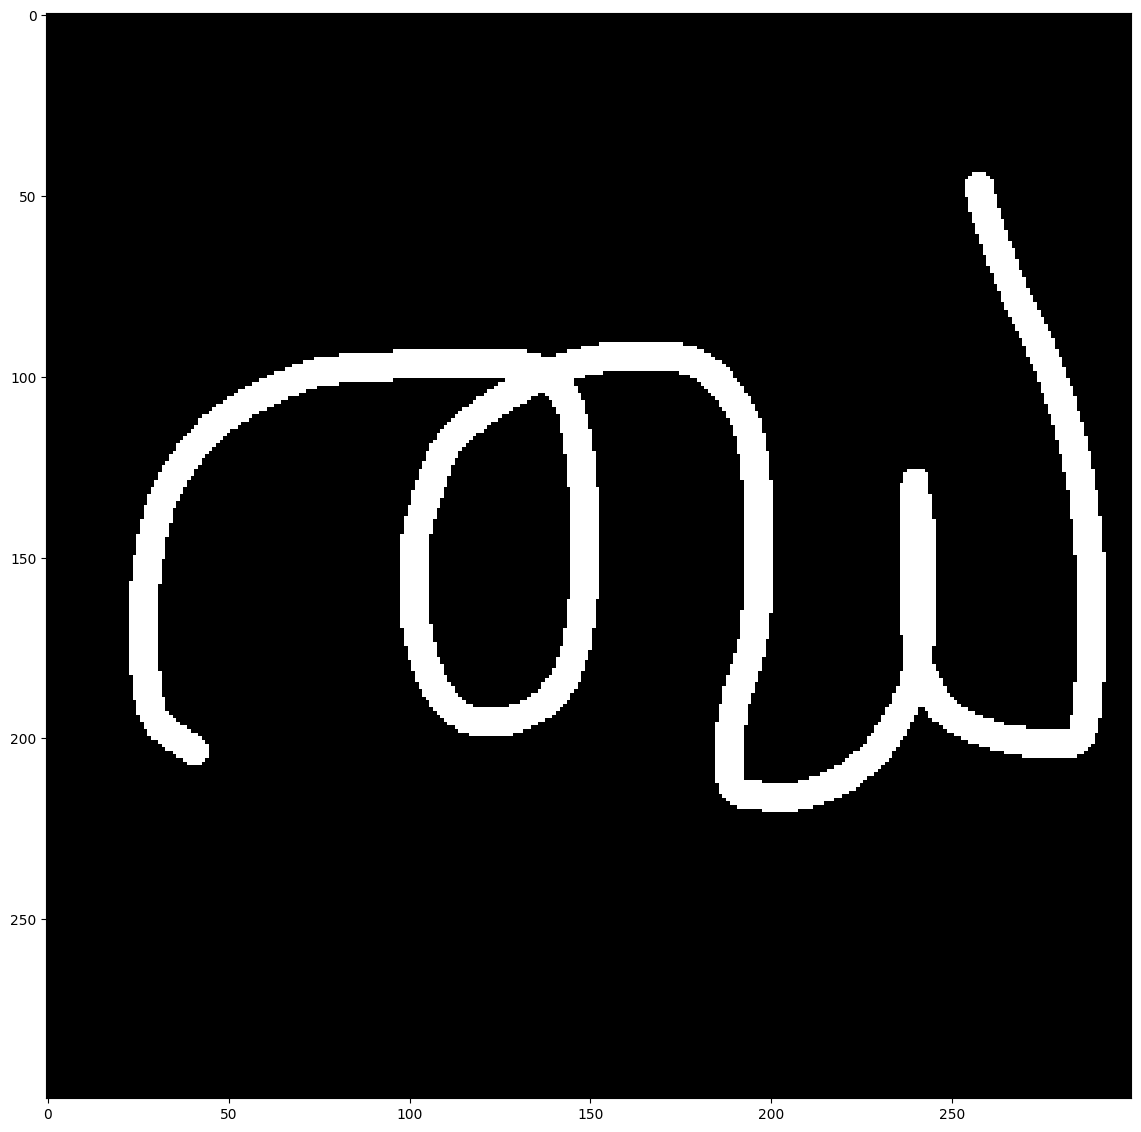

Predicted as ത്സ


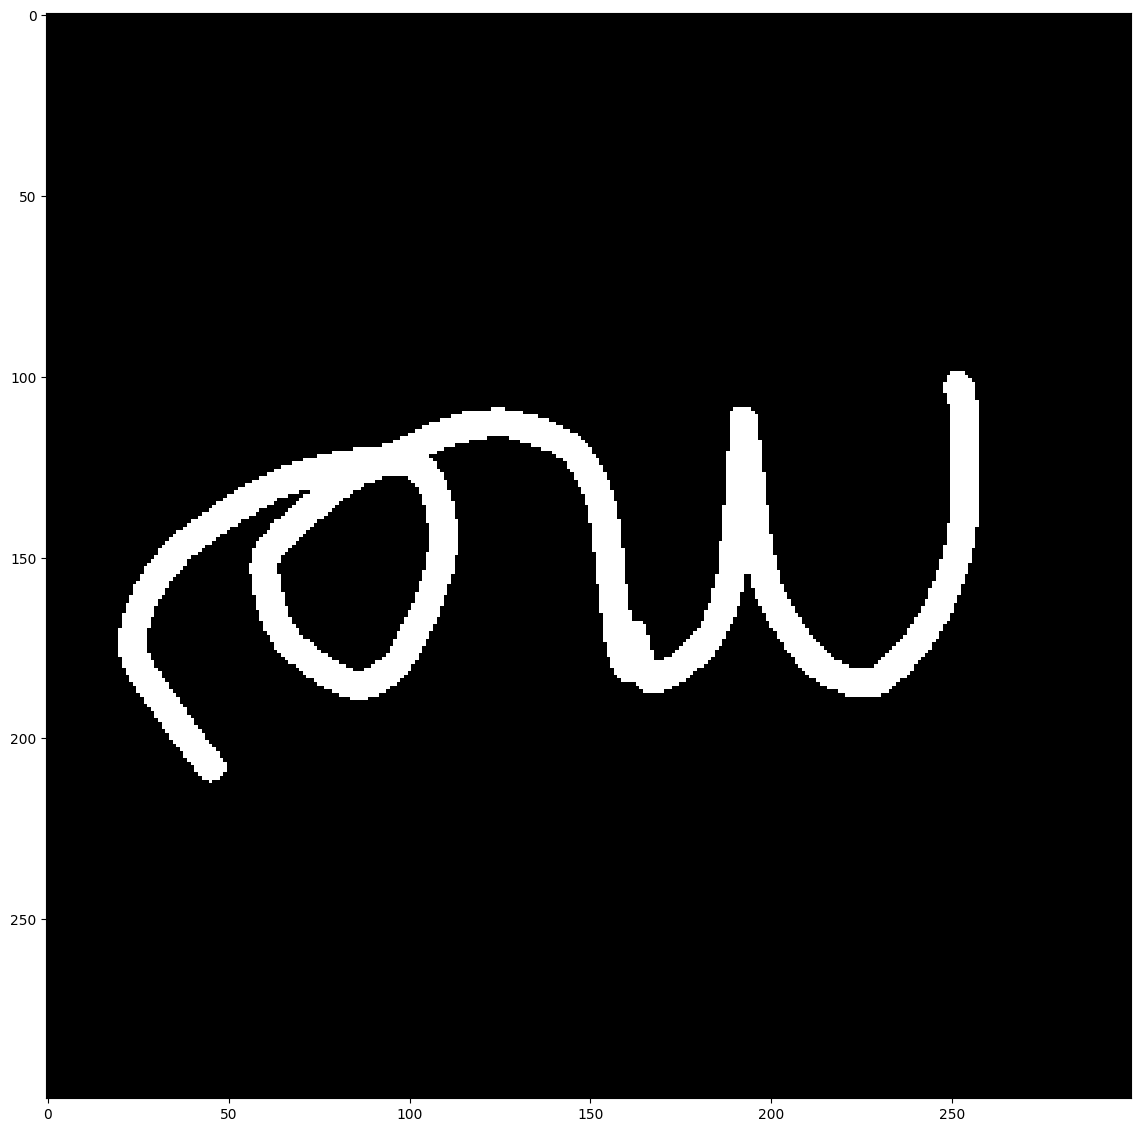

Predicted as ത്സ


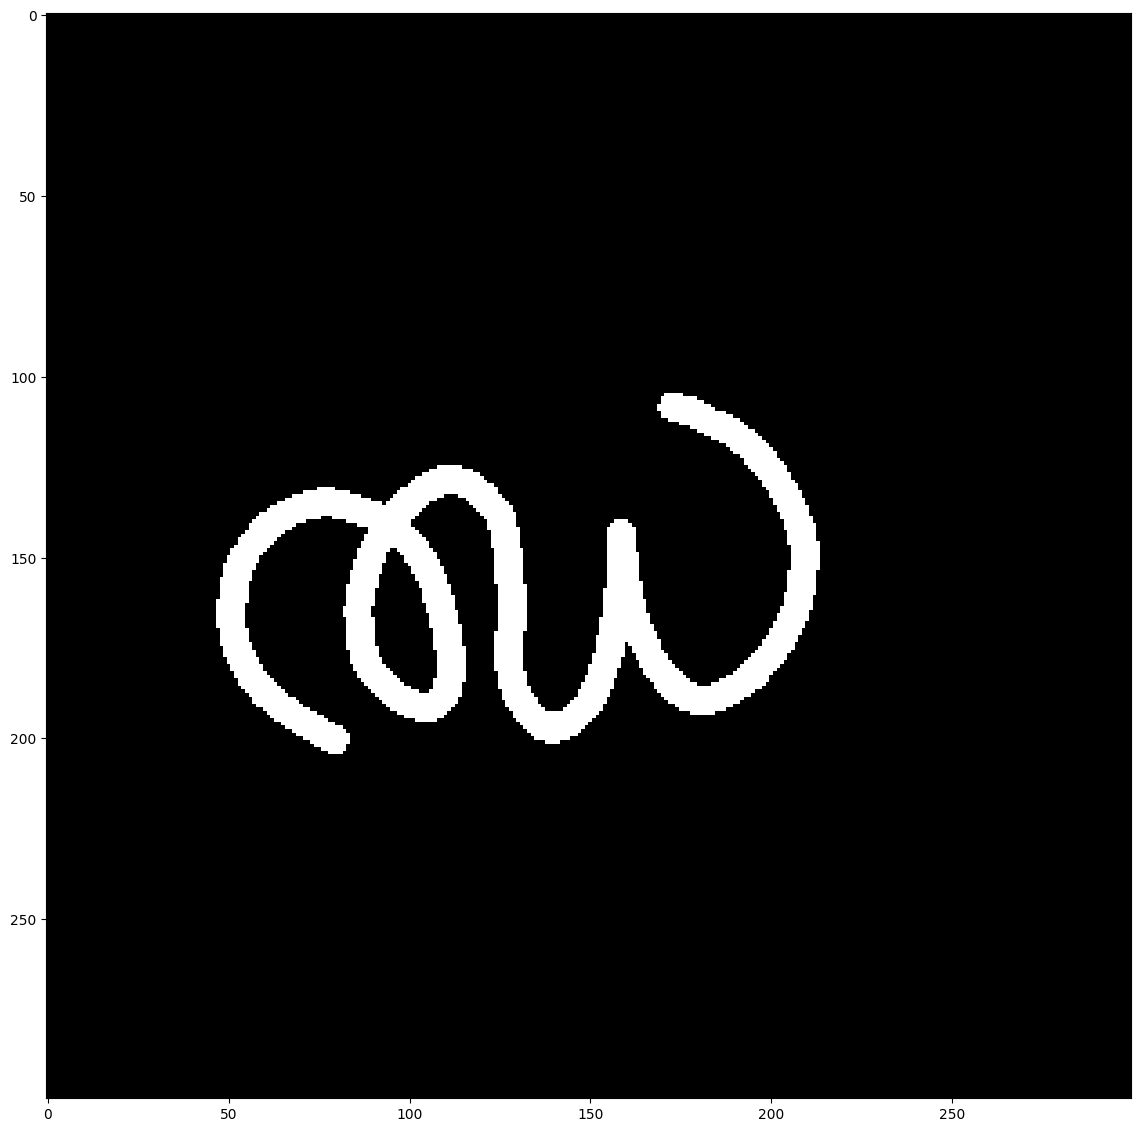

Predicted as ത്സ


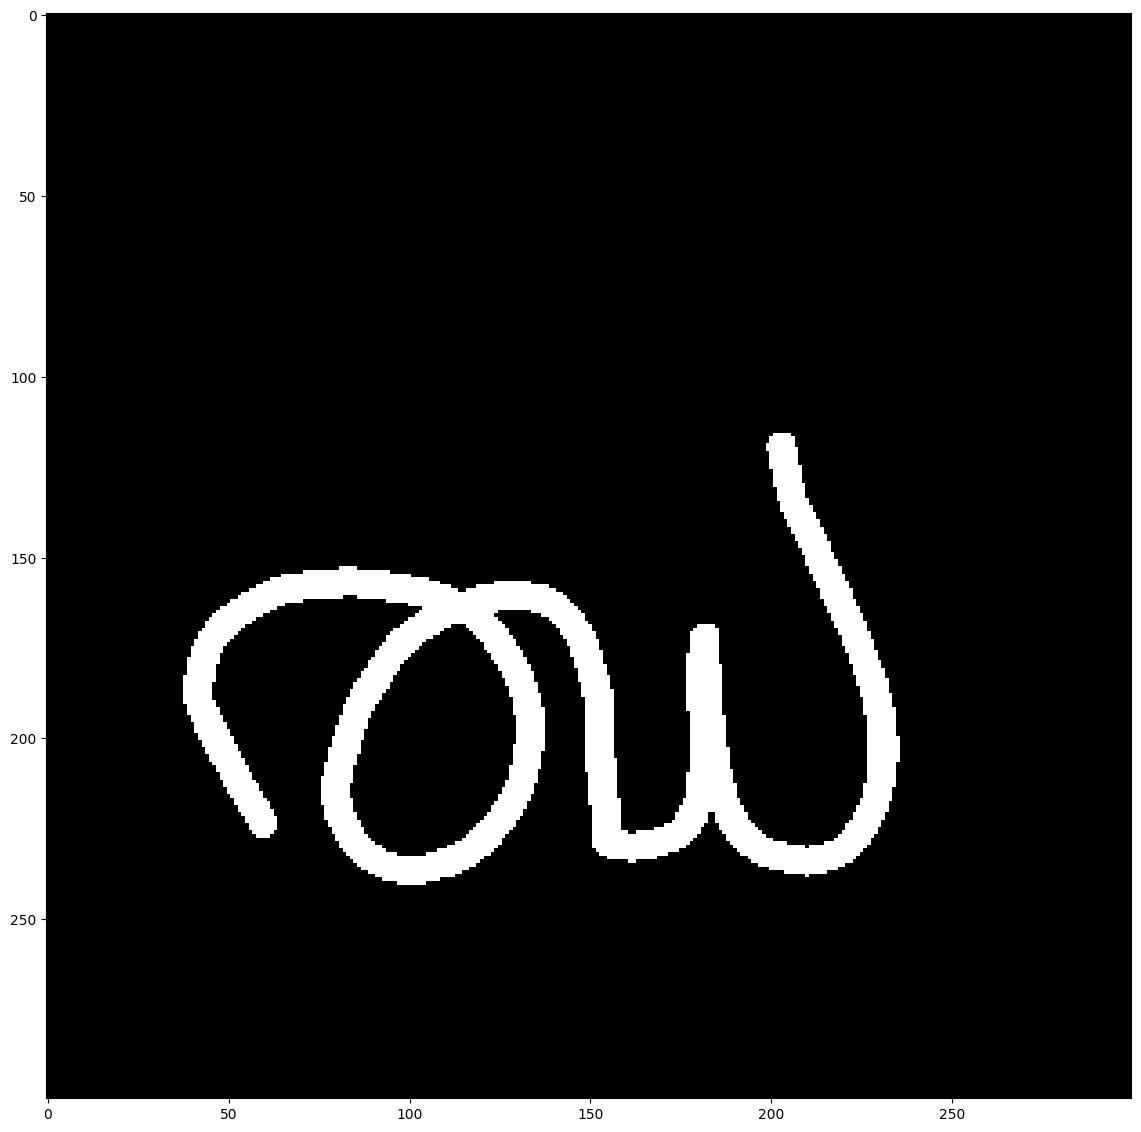

Predicted as ണ


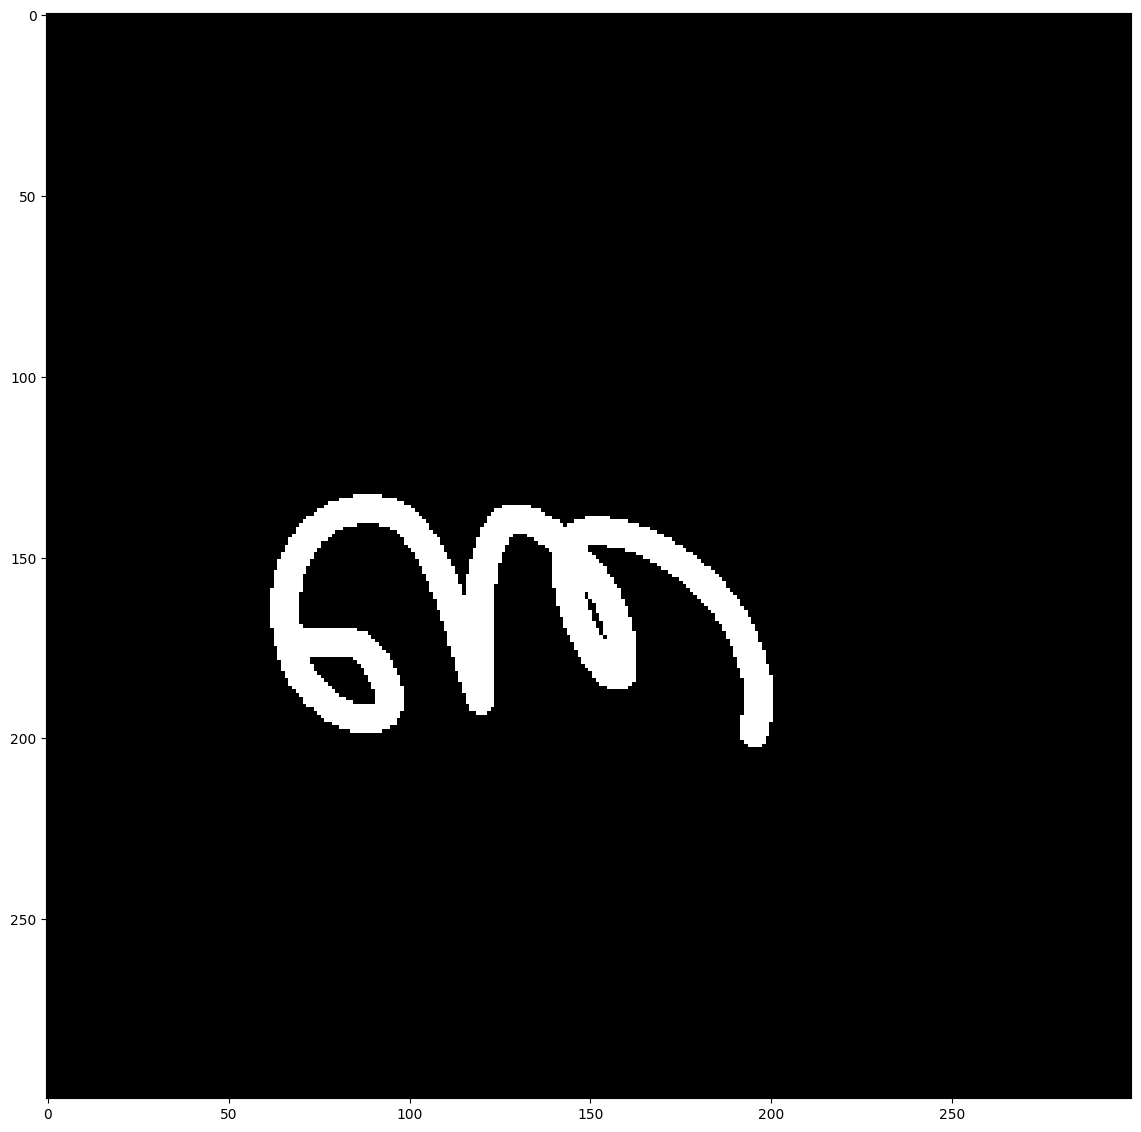

Predicted as ബ


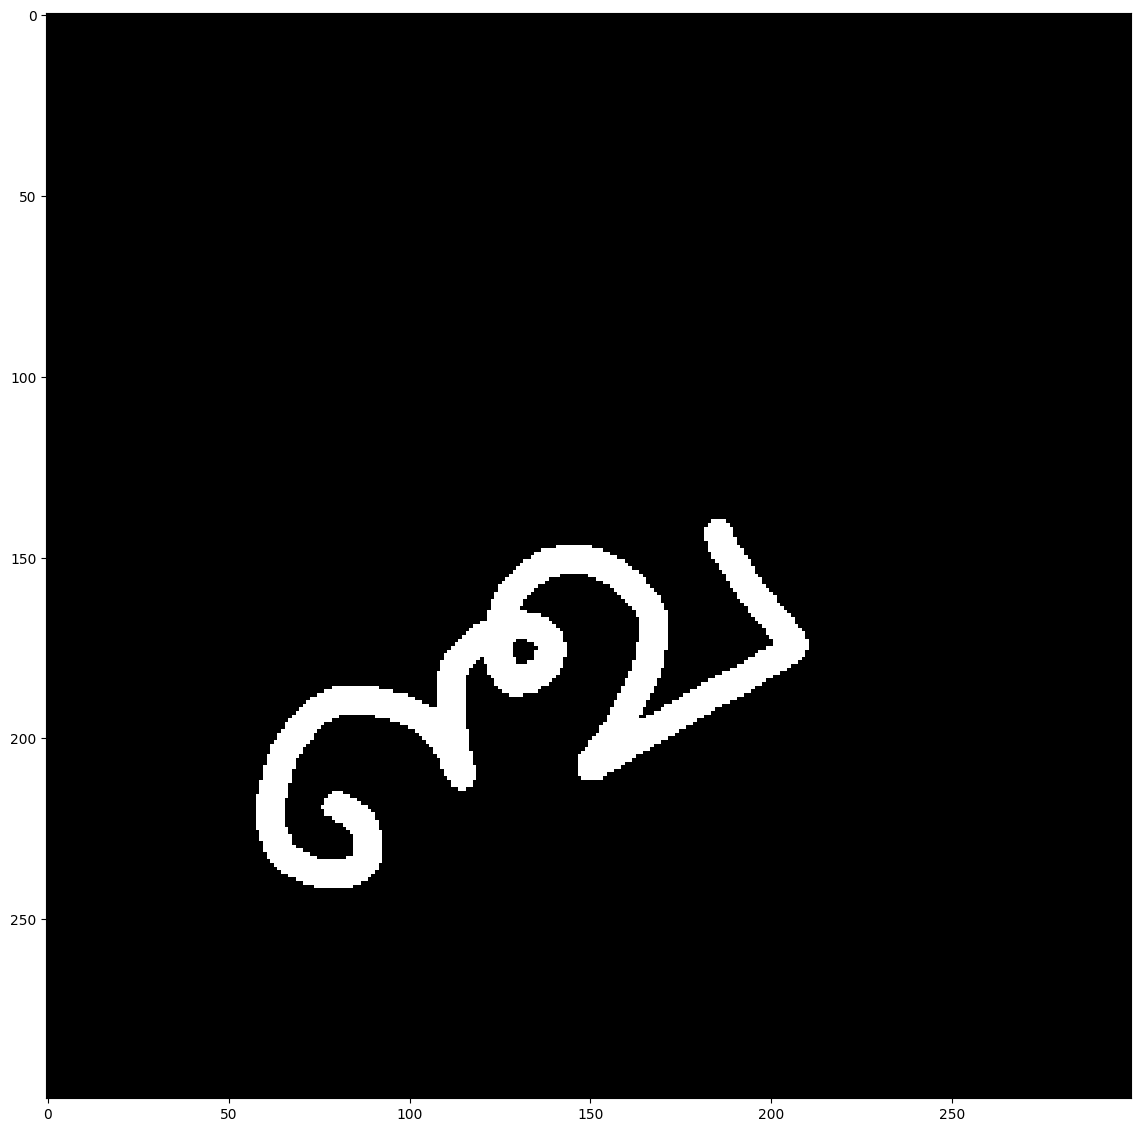

Predicted as ബ


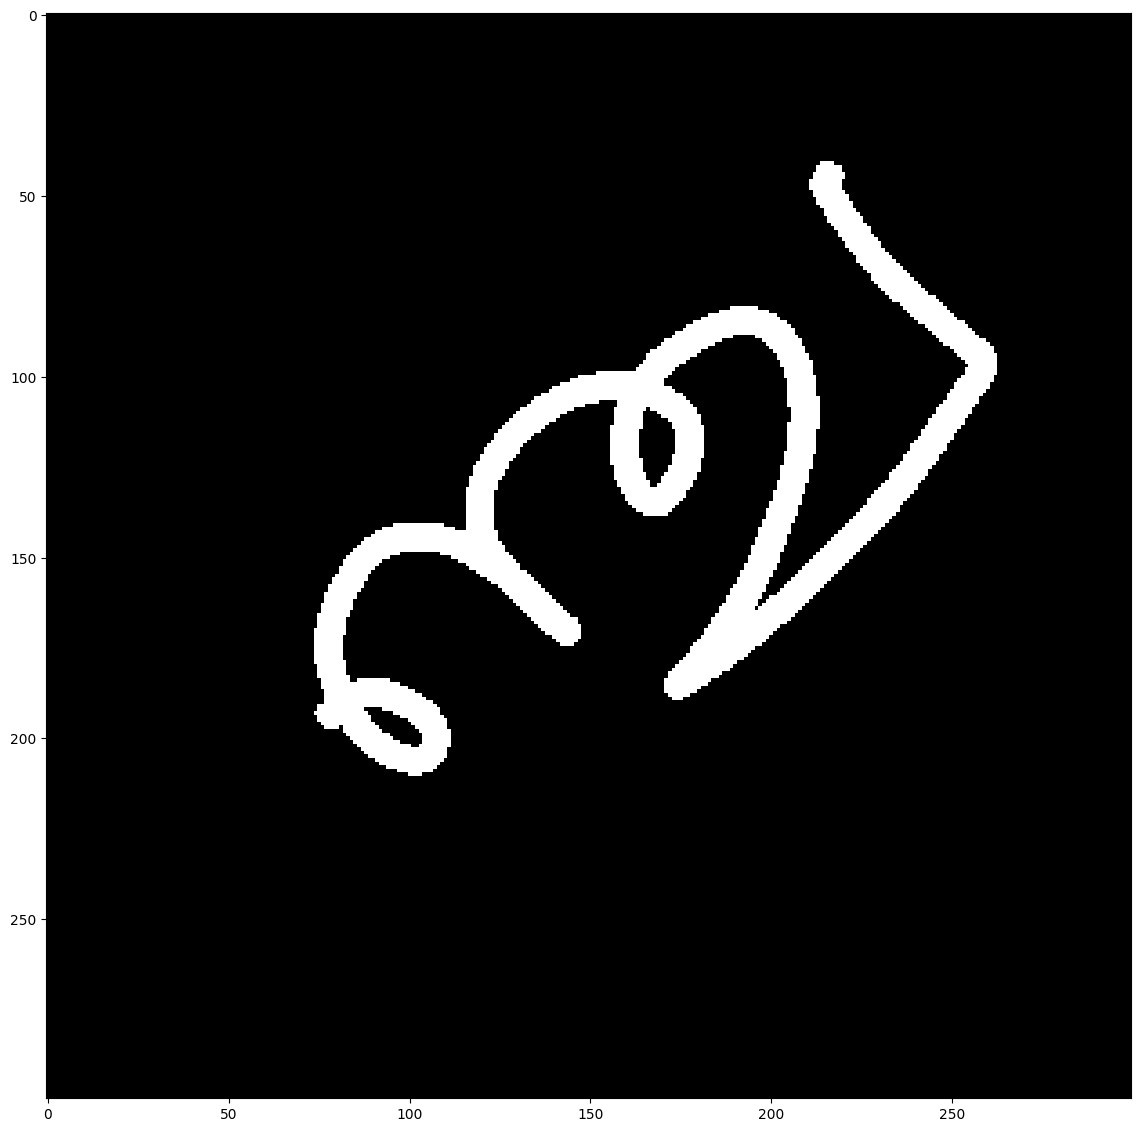

Predicted as ണ


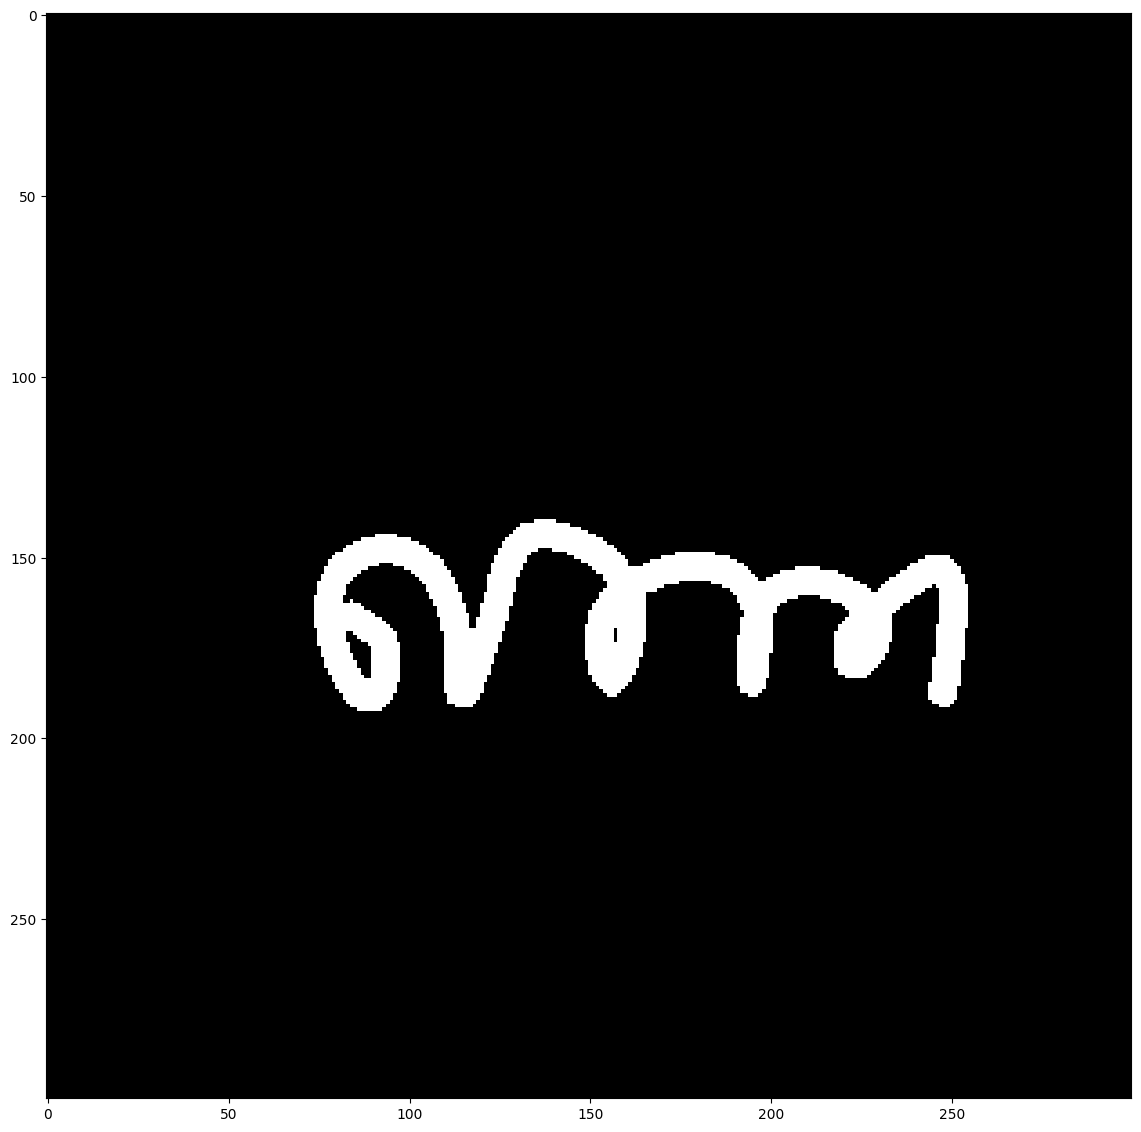

Predicted as ട


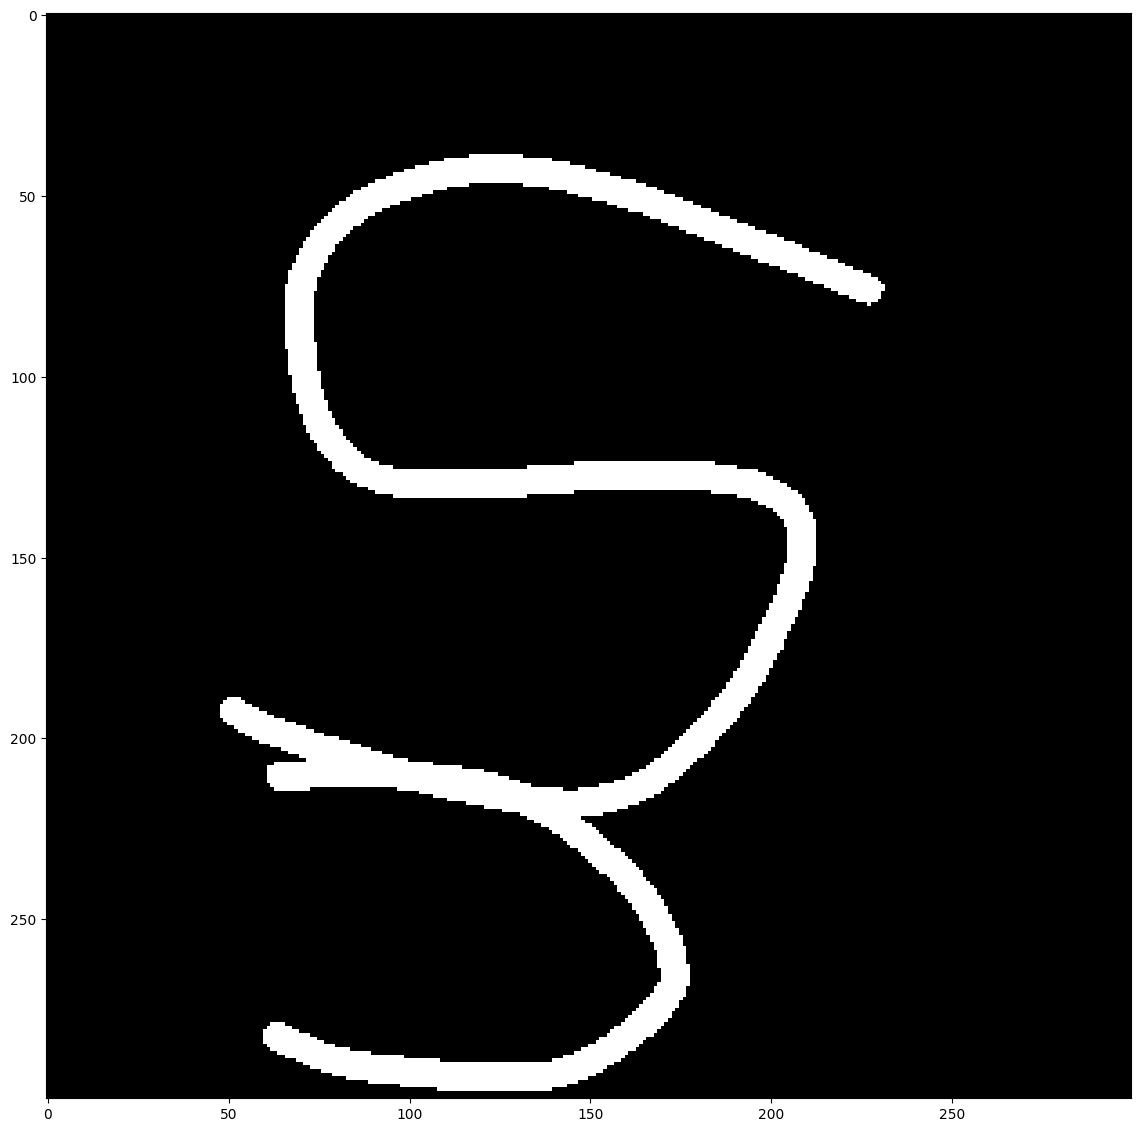

Predicted as ദ്ദ


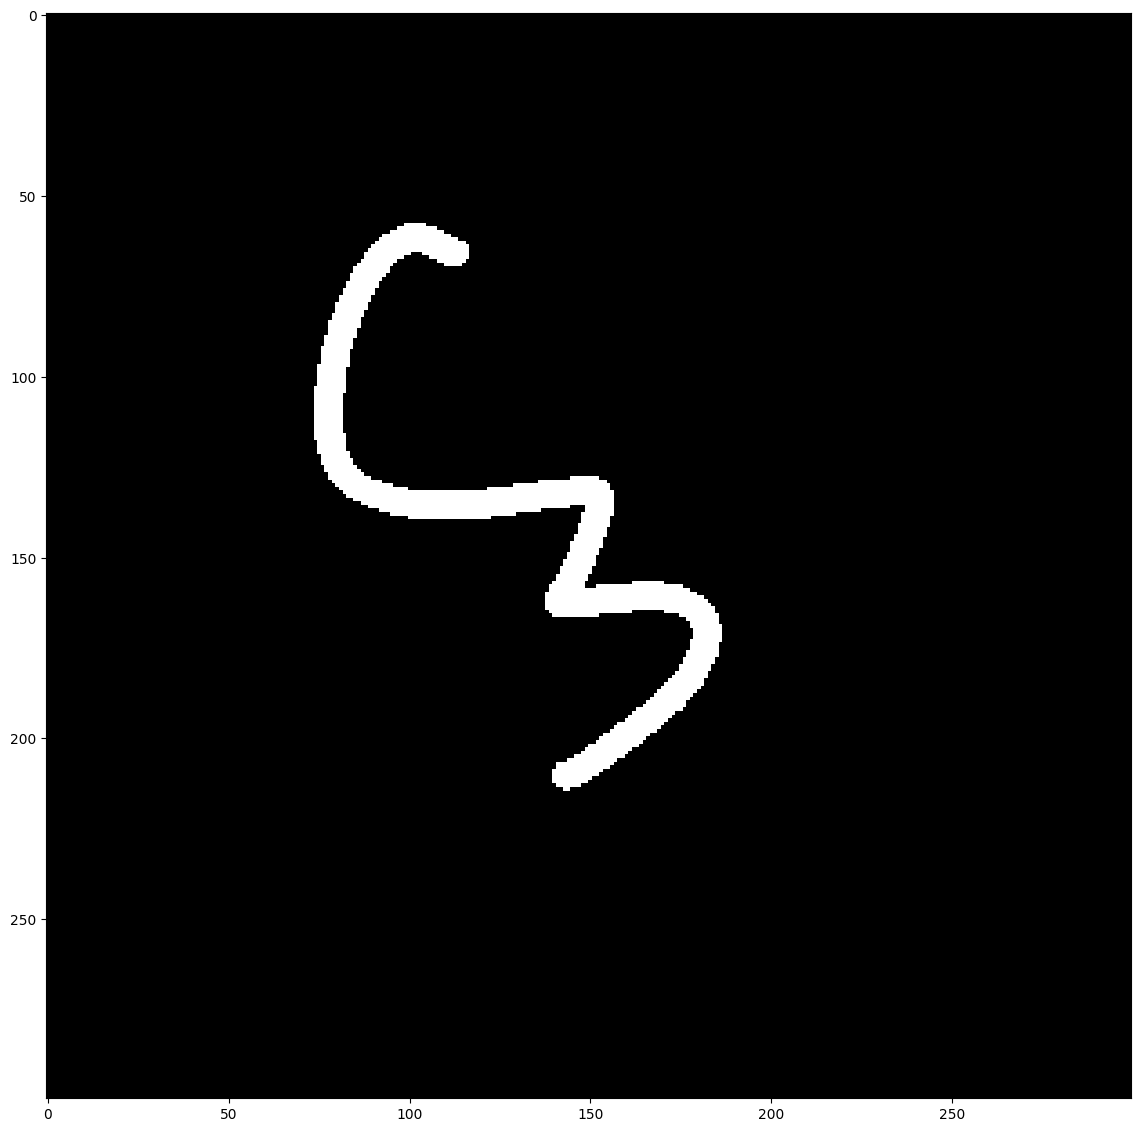

Predicted as ശ്ശ


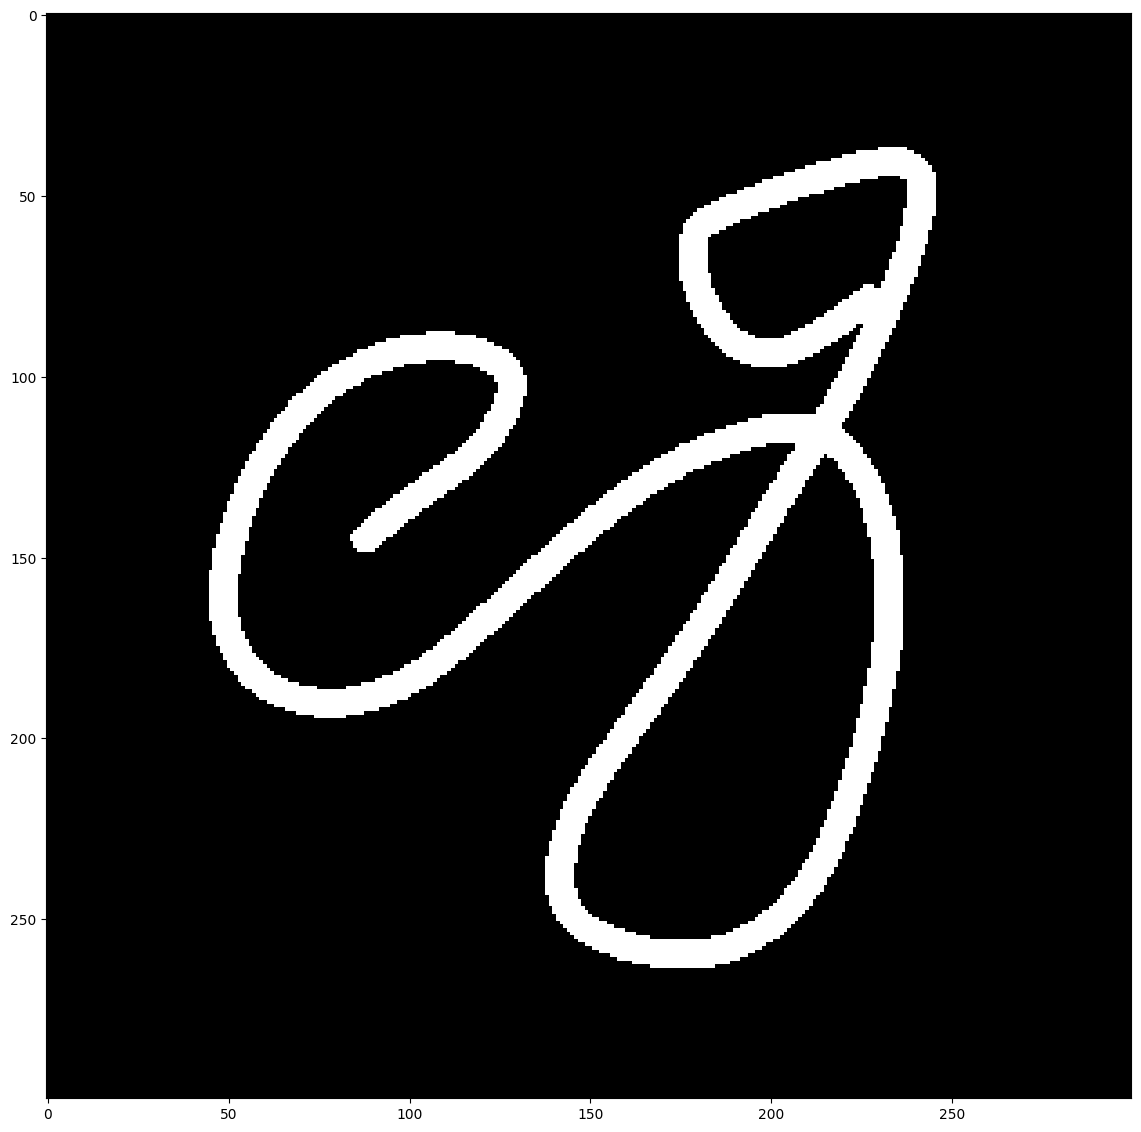

Predicted as ണ


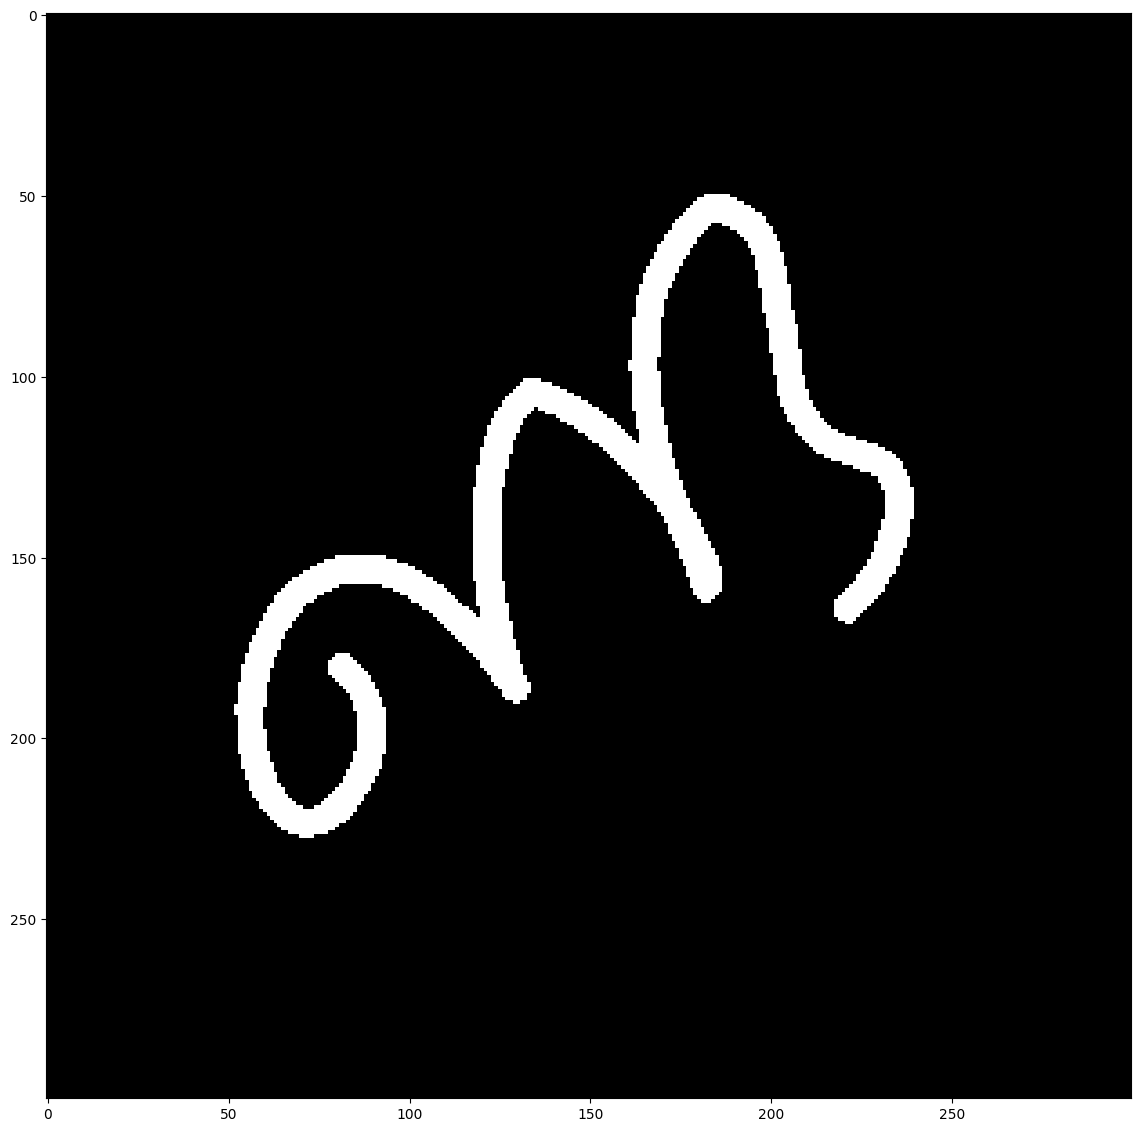

Predicted as ന


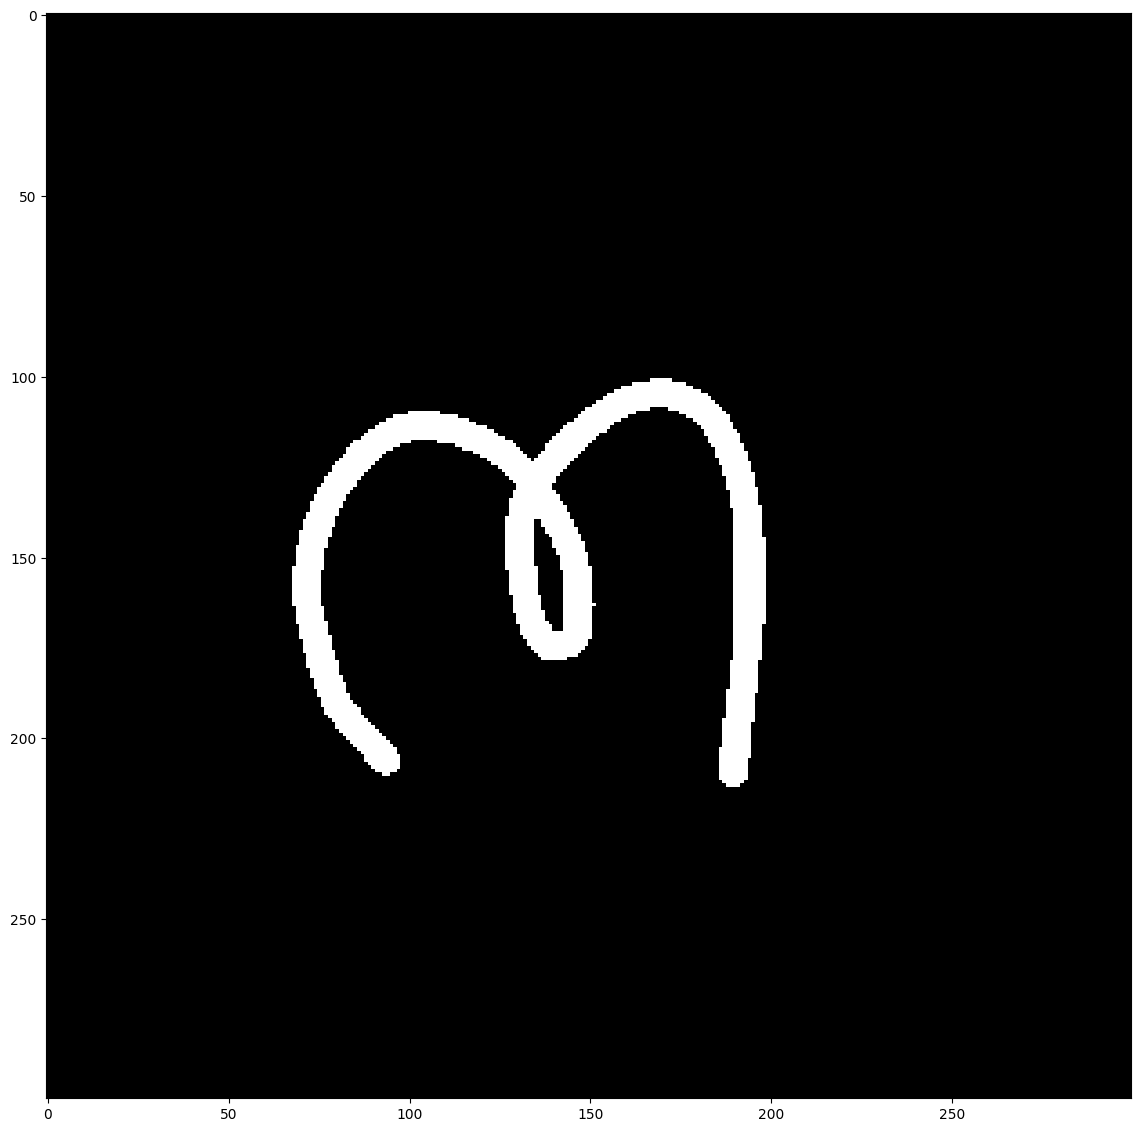

Predicted as ന


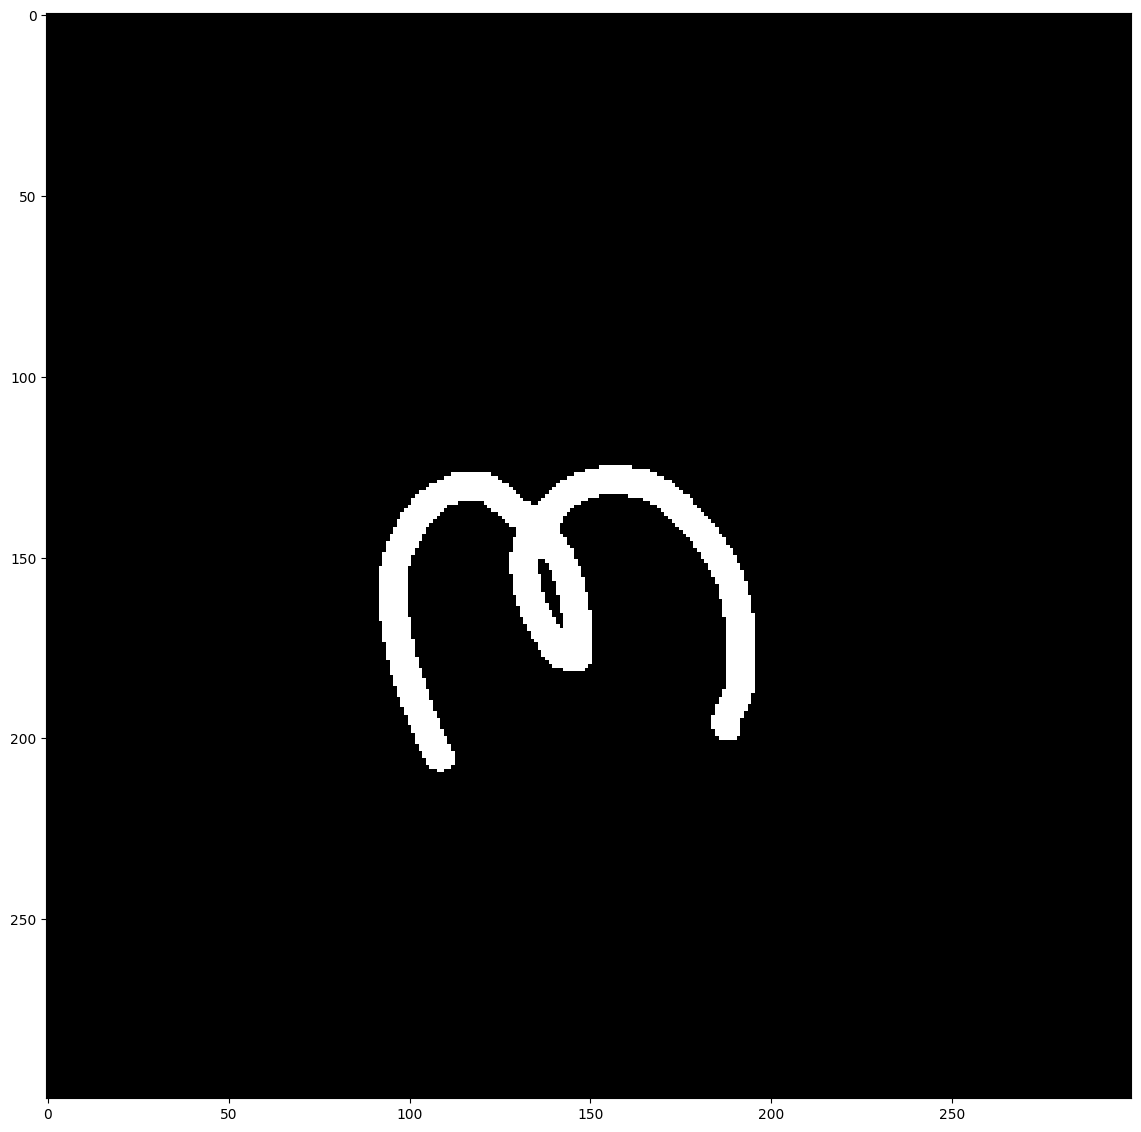

Predicted as ഝ


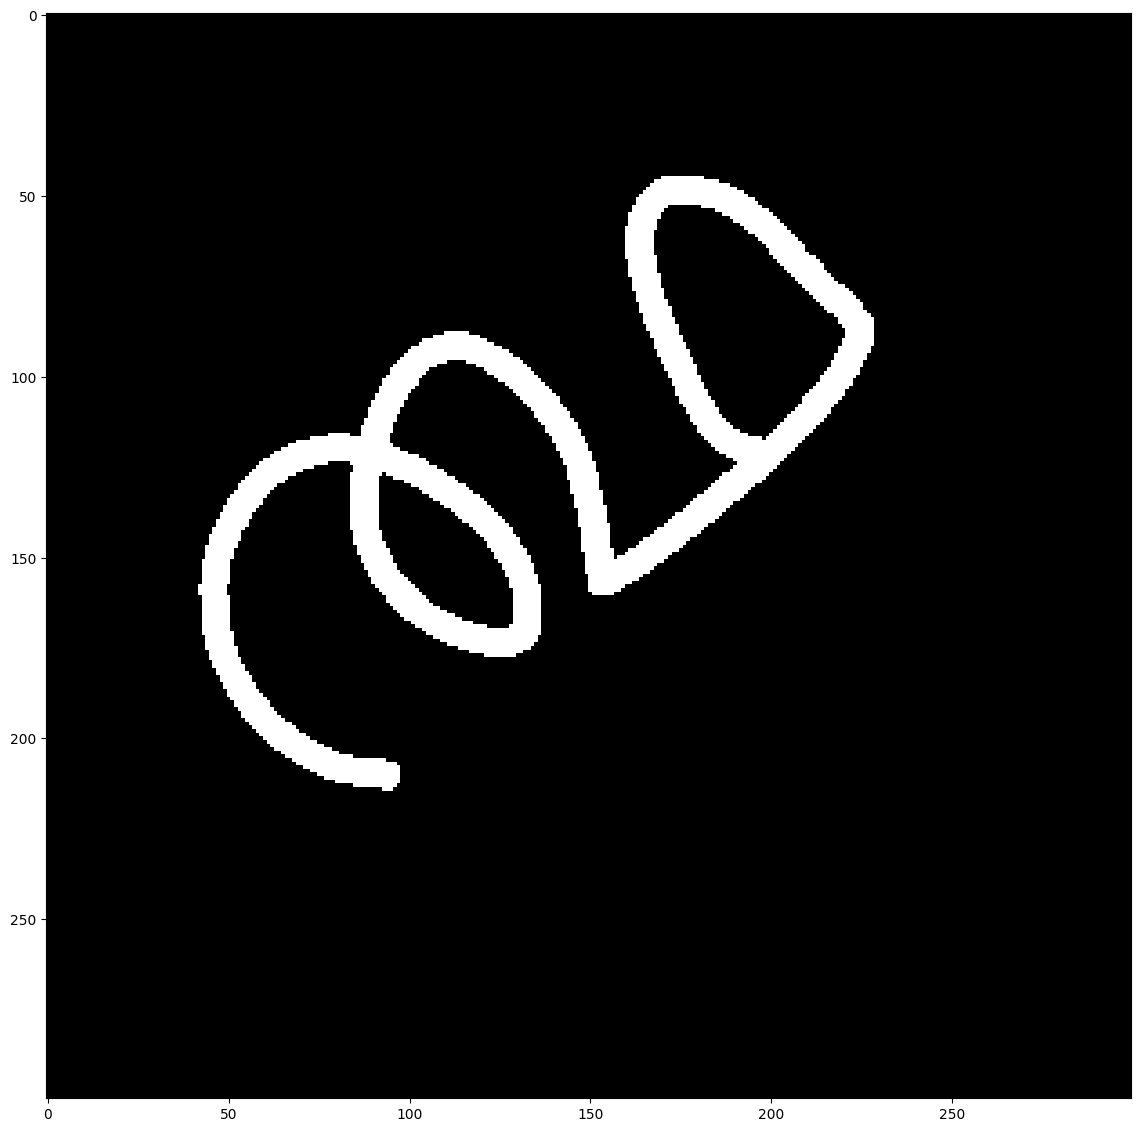

Predicted as ത്സ


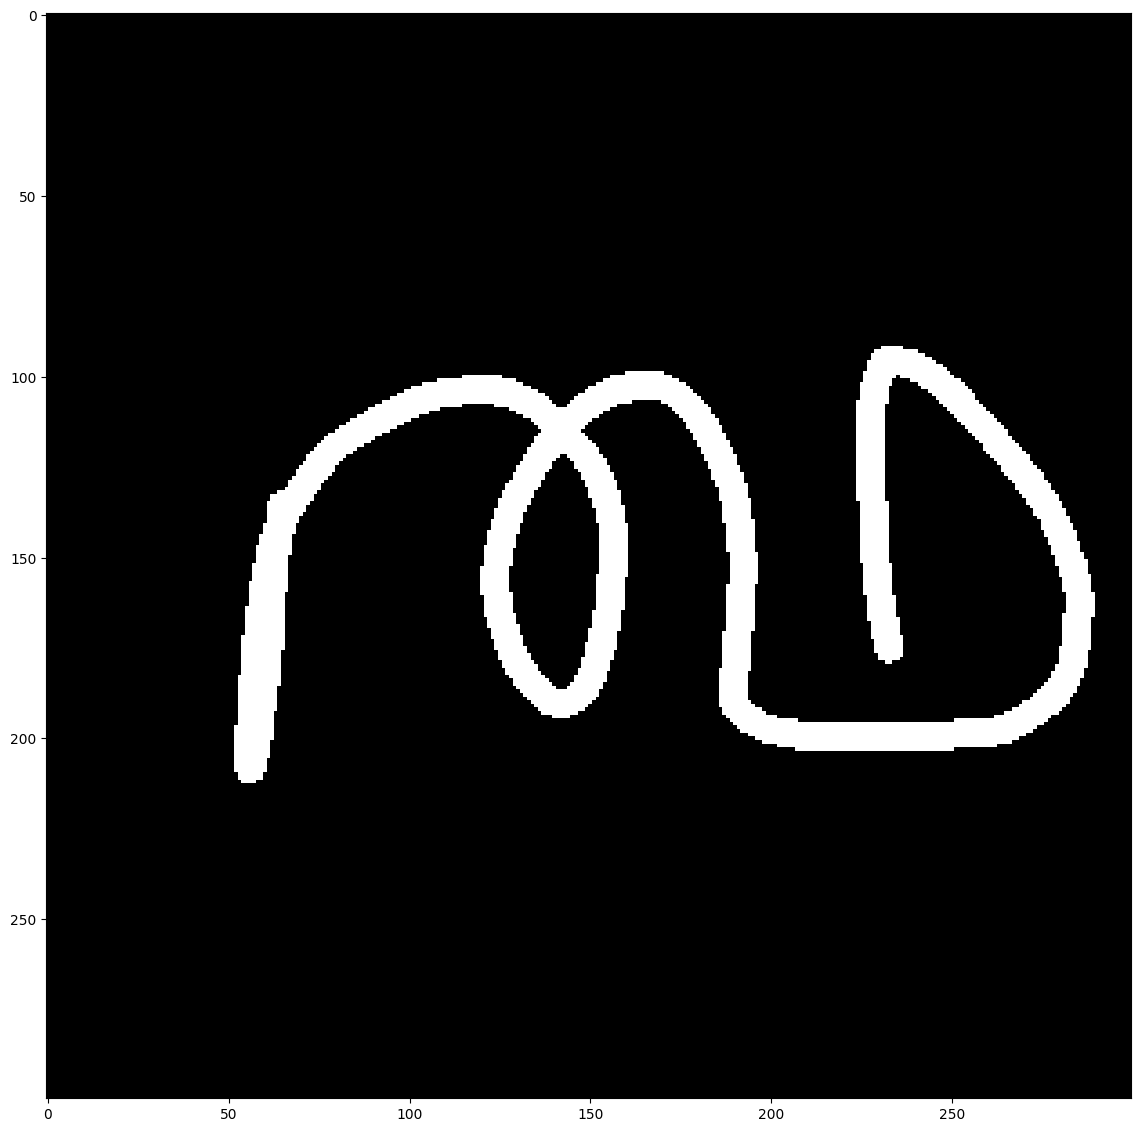

Predicted as ത്മ


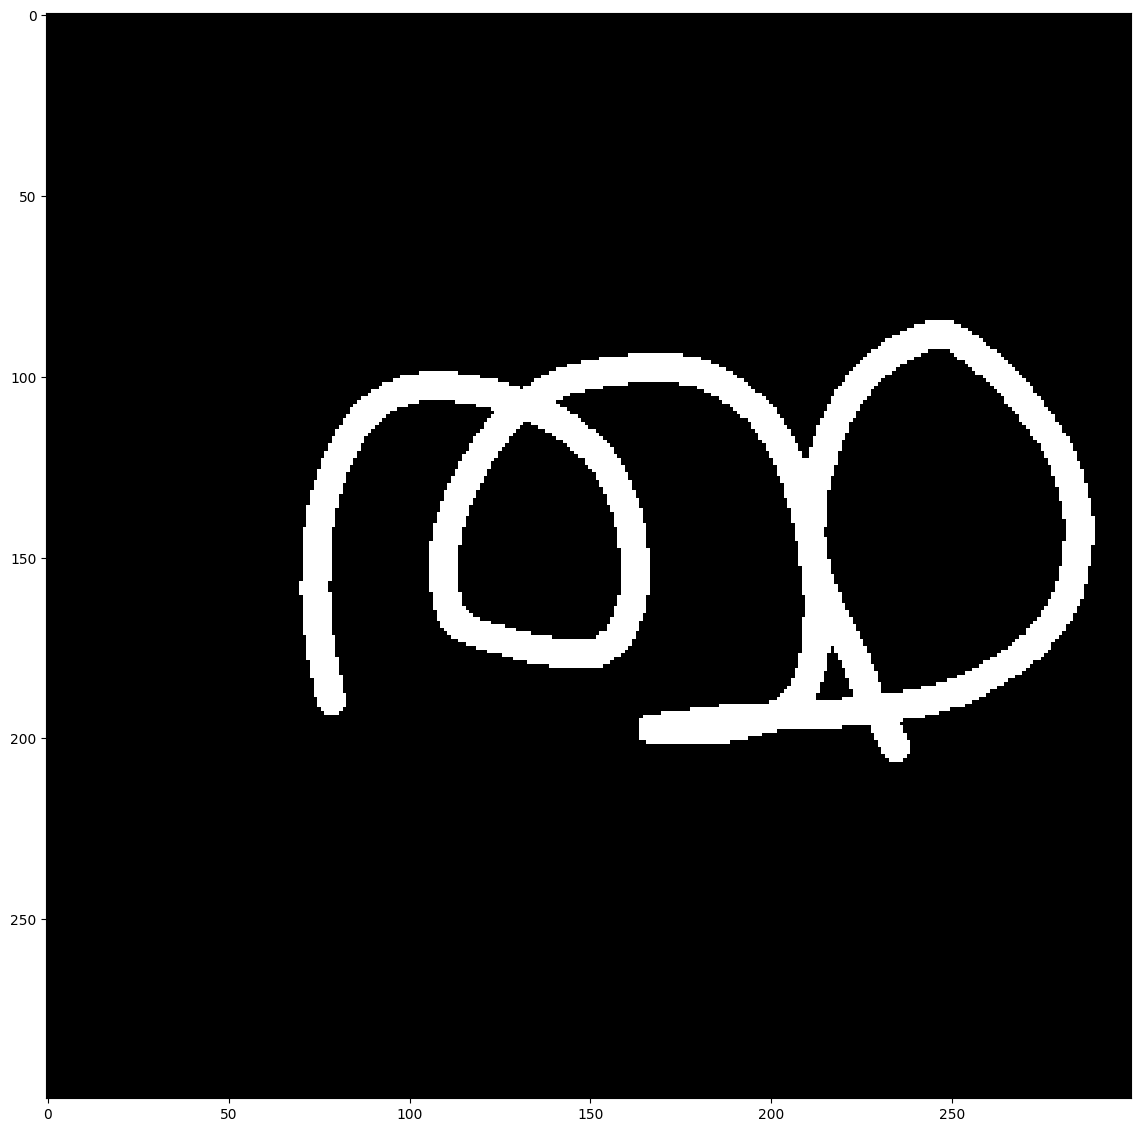

Predicted as ഏ


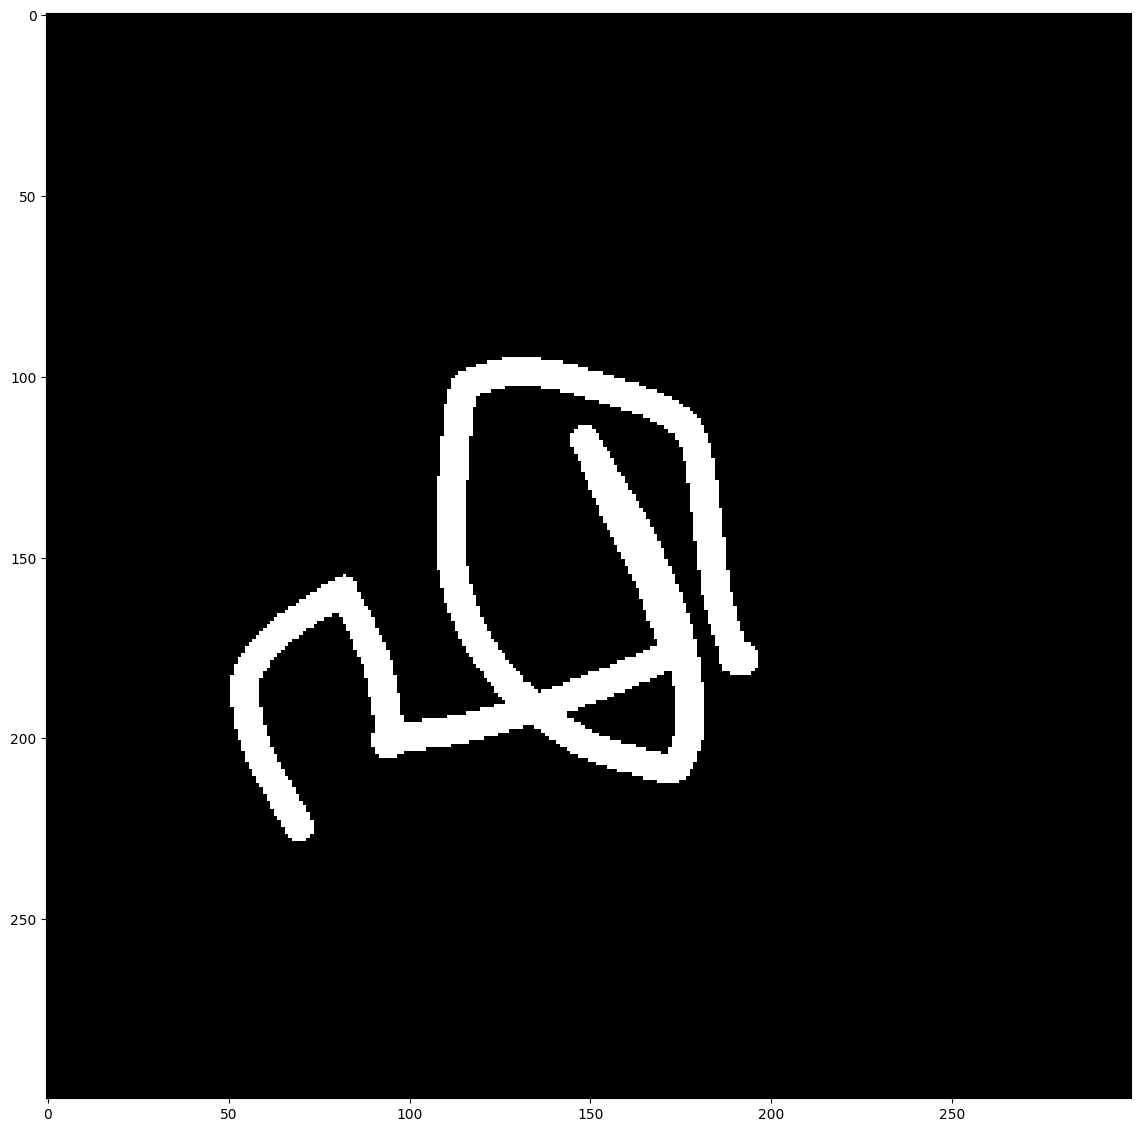

Predicted as ഹ


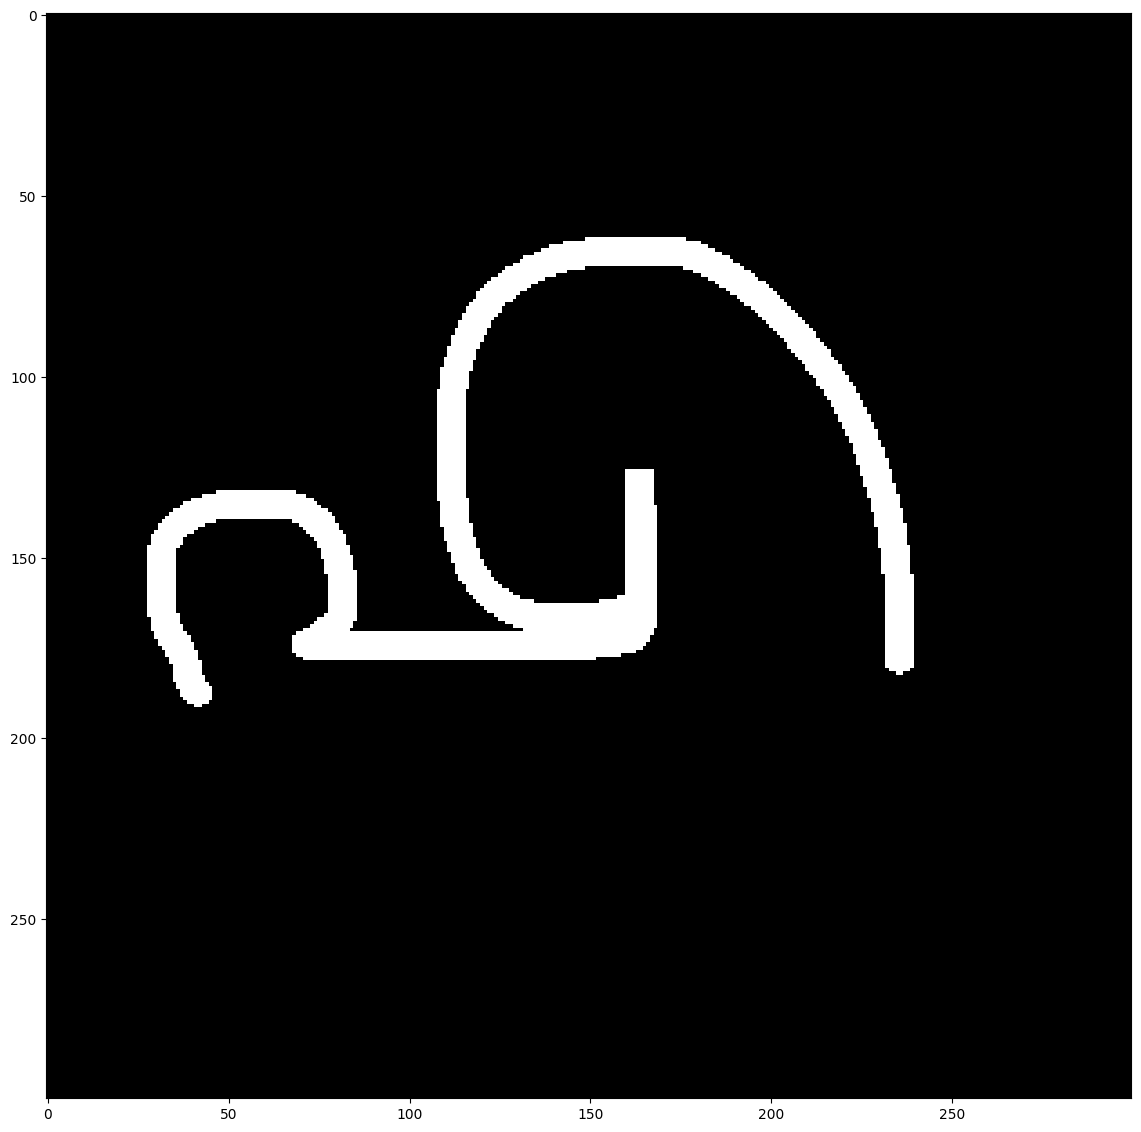

Predicted as ണ്മ


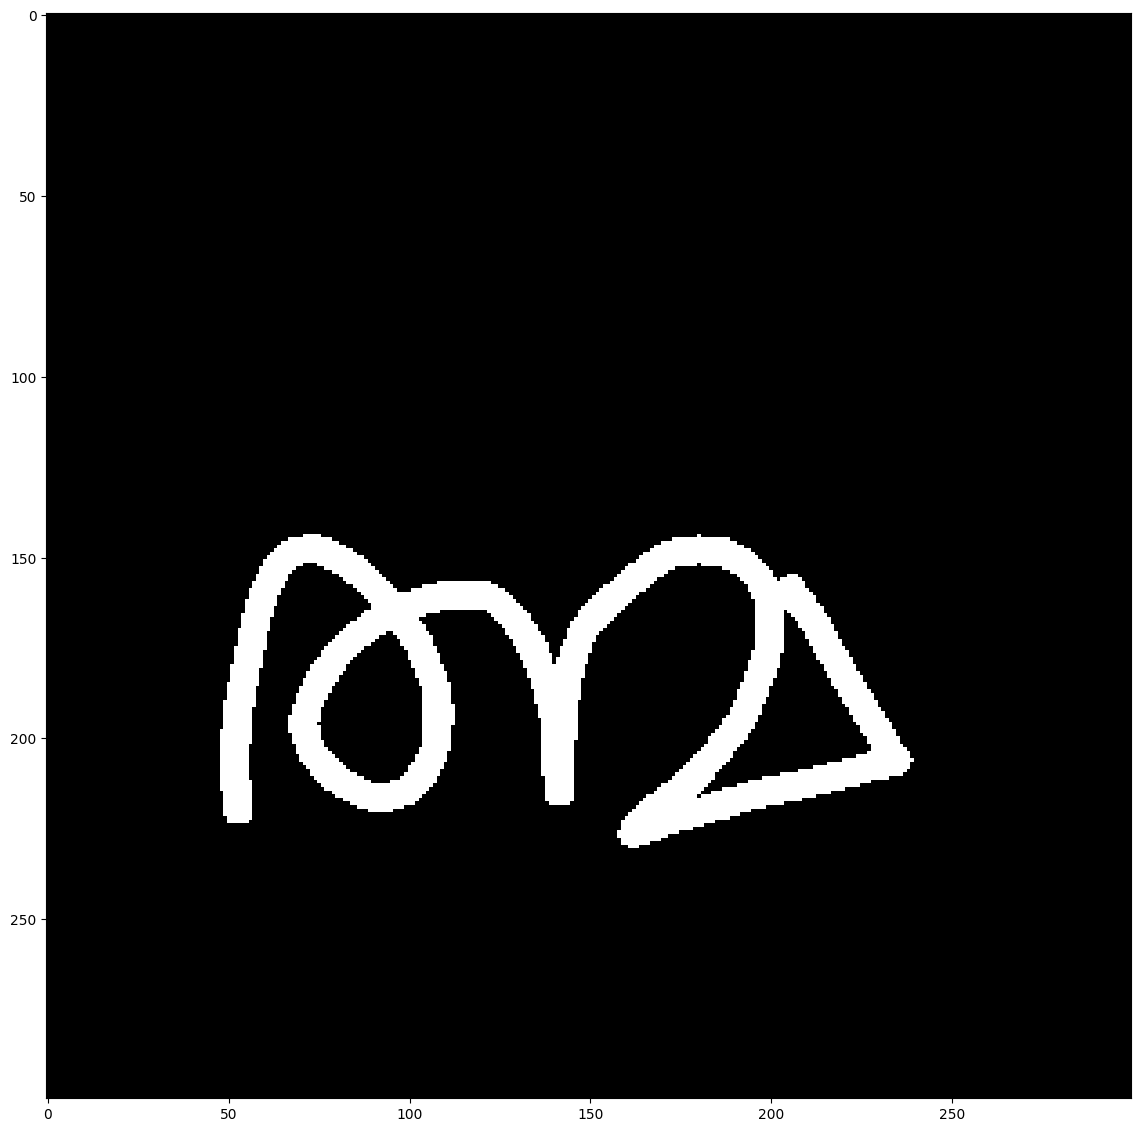

Predicted as ട


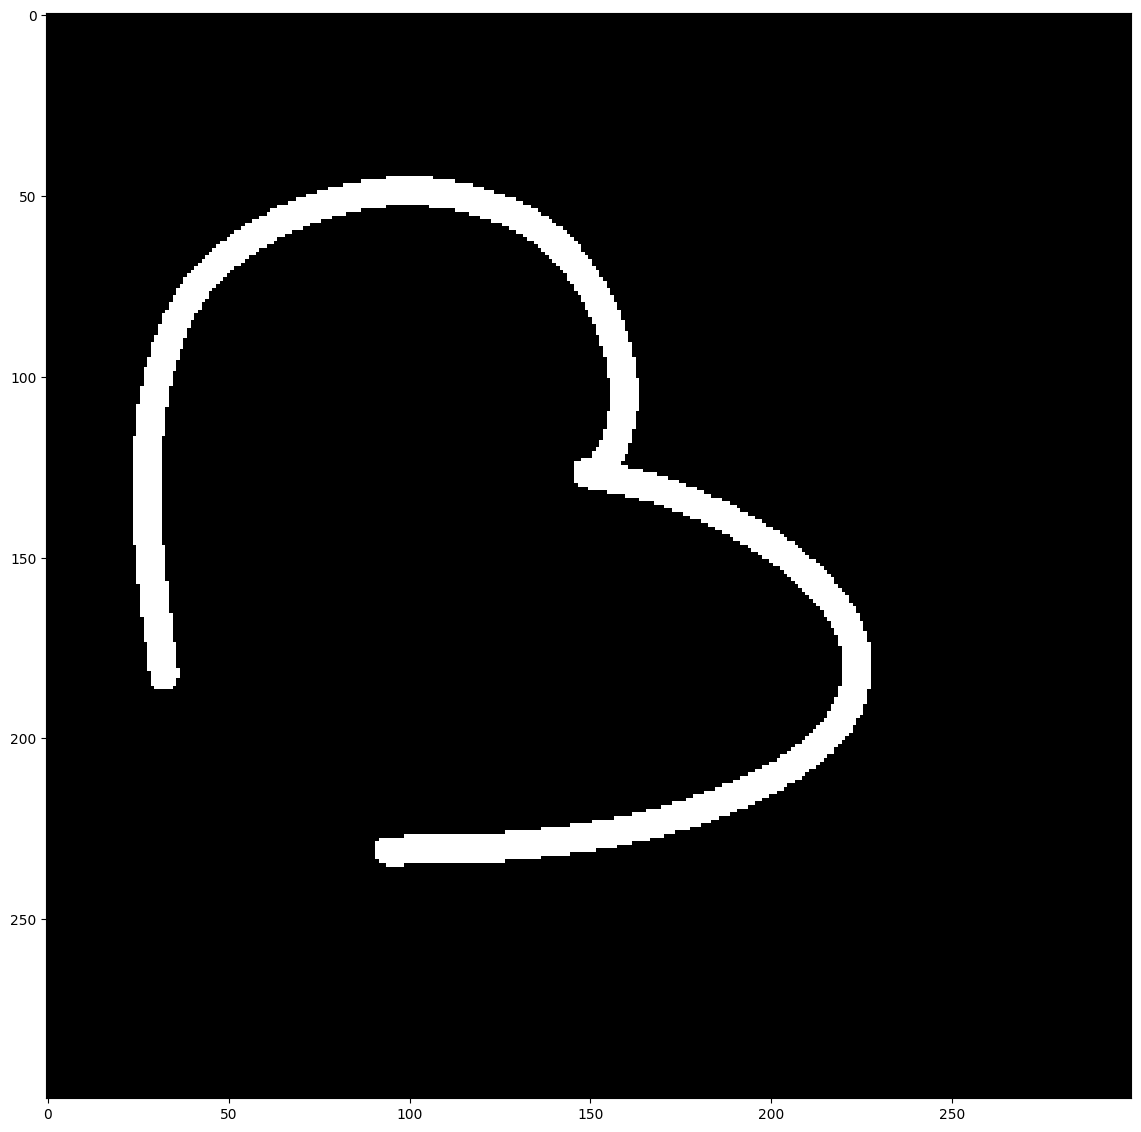

Predicted as ഭ


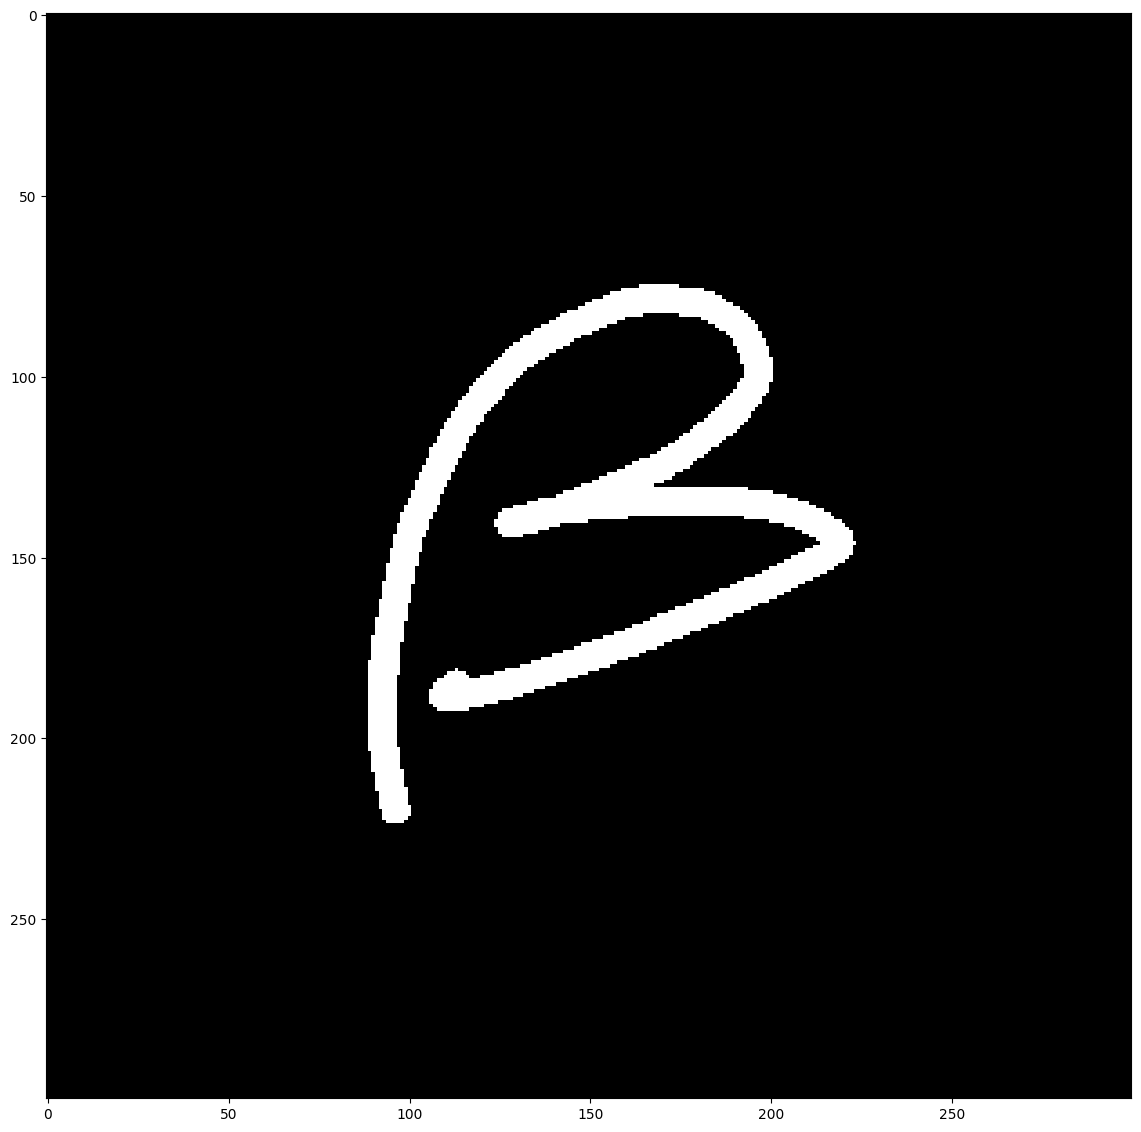

Predicted as ര


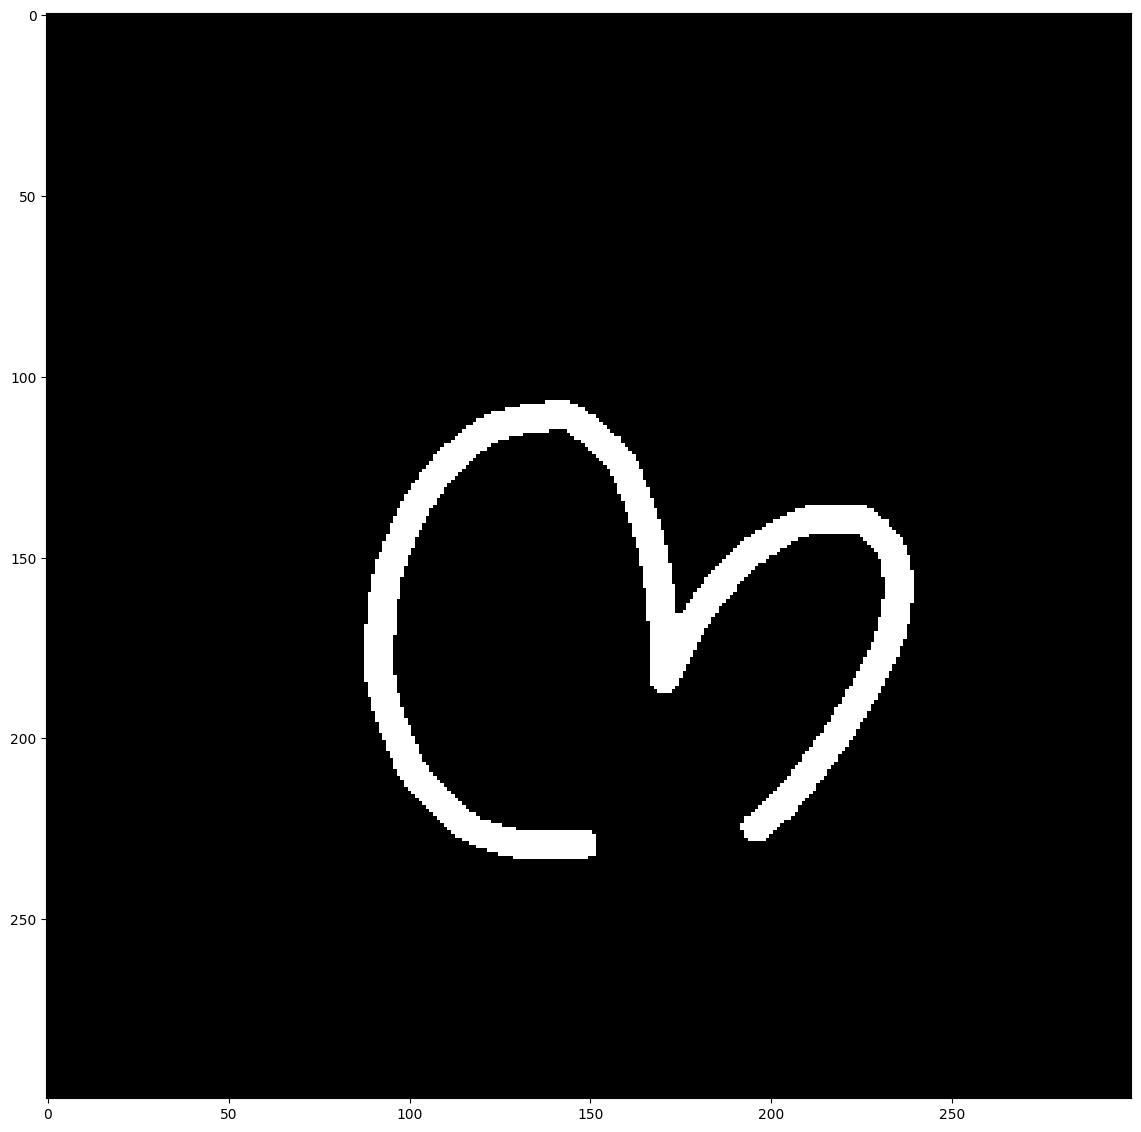

Predicted as ദ


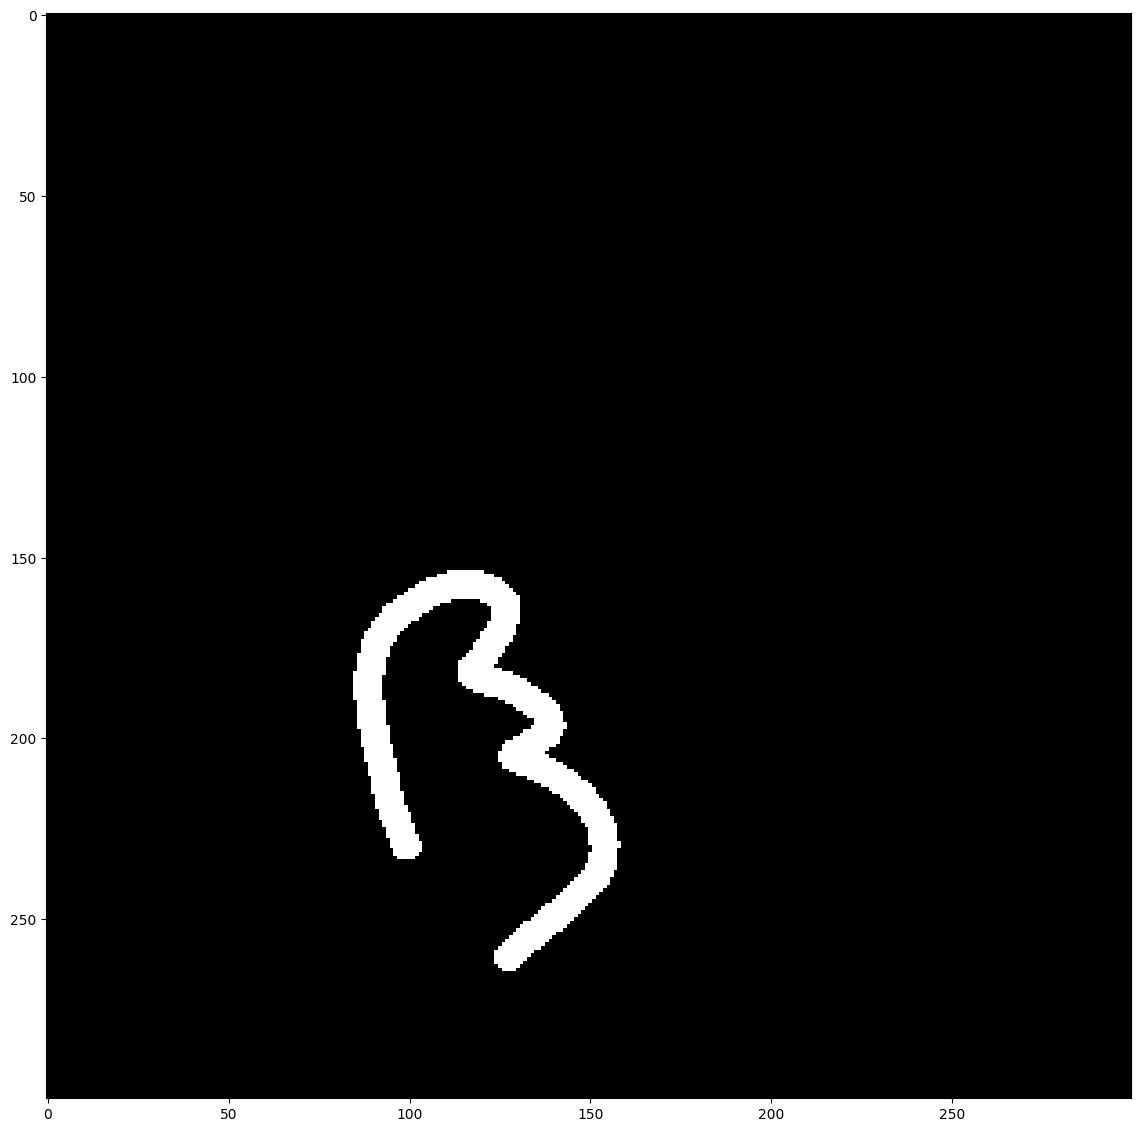

Predicted as ന്ന


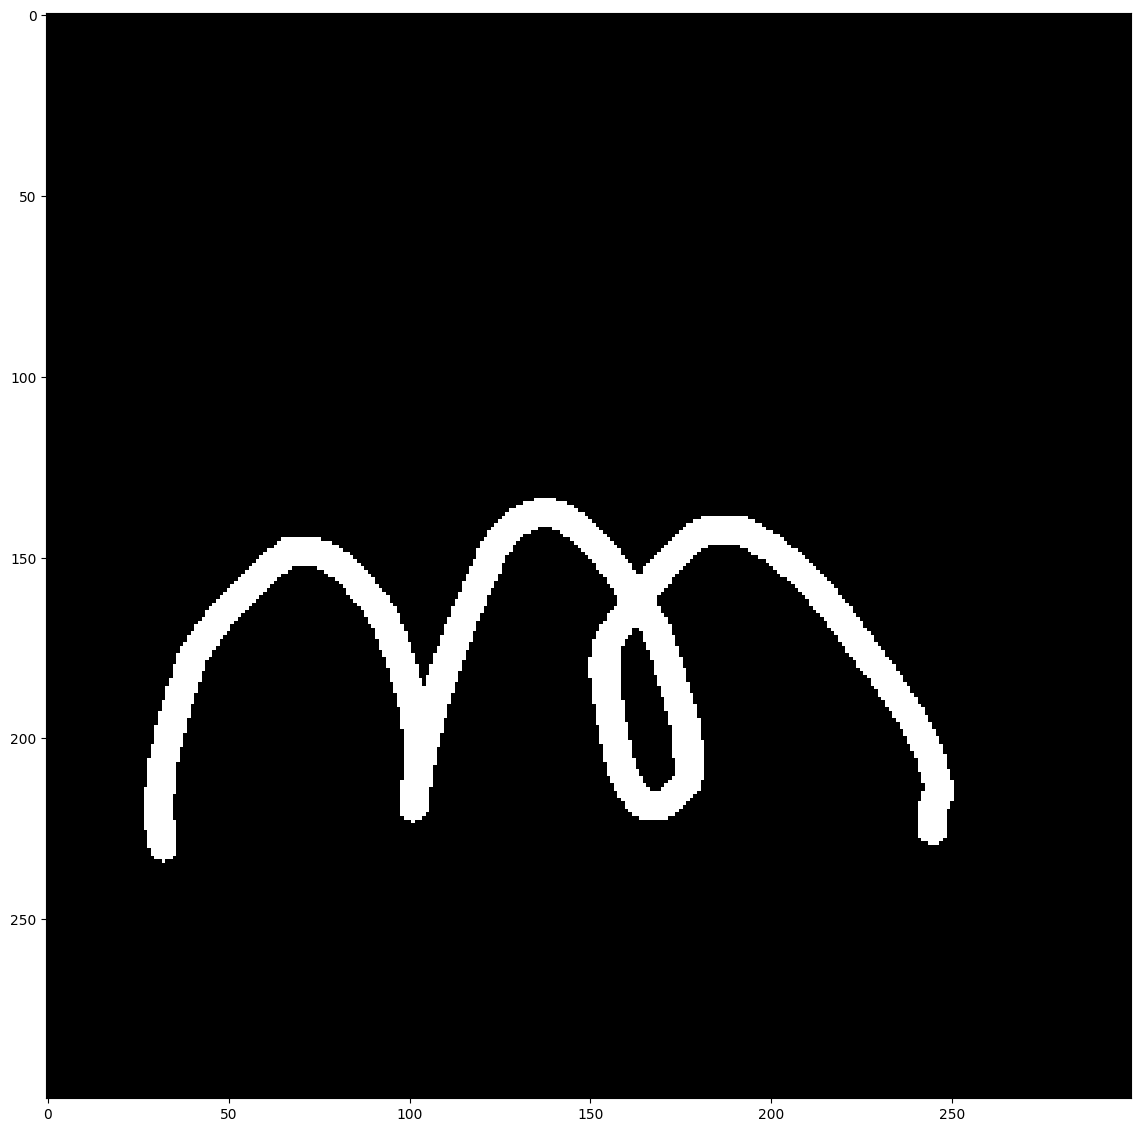

Predicted as യ


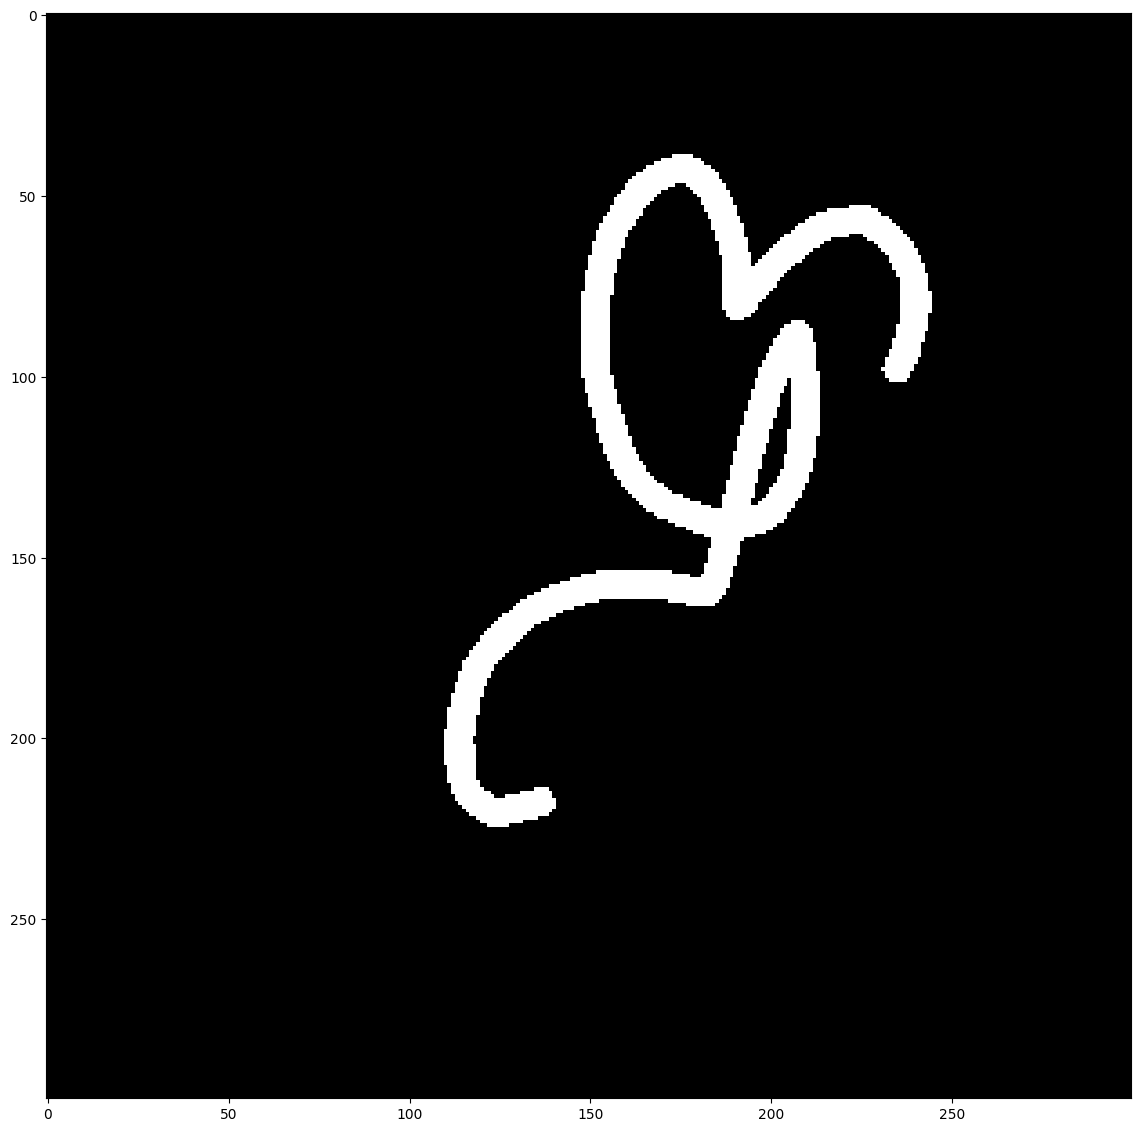

Predicted as ന്‍


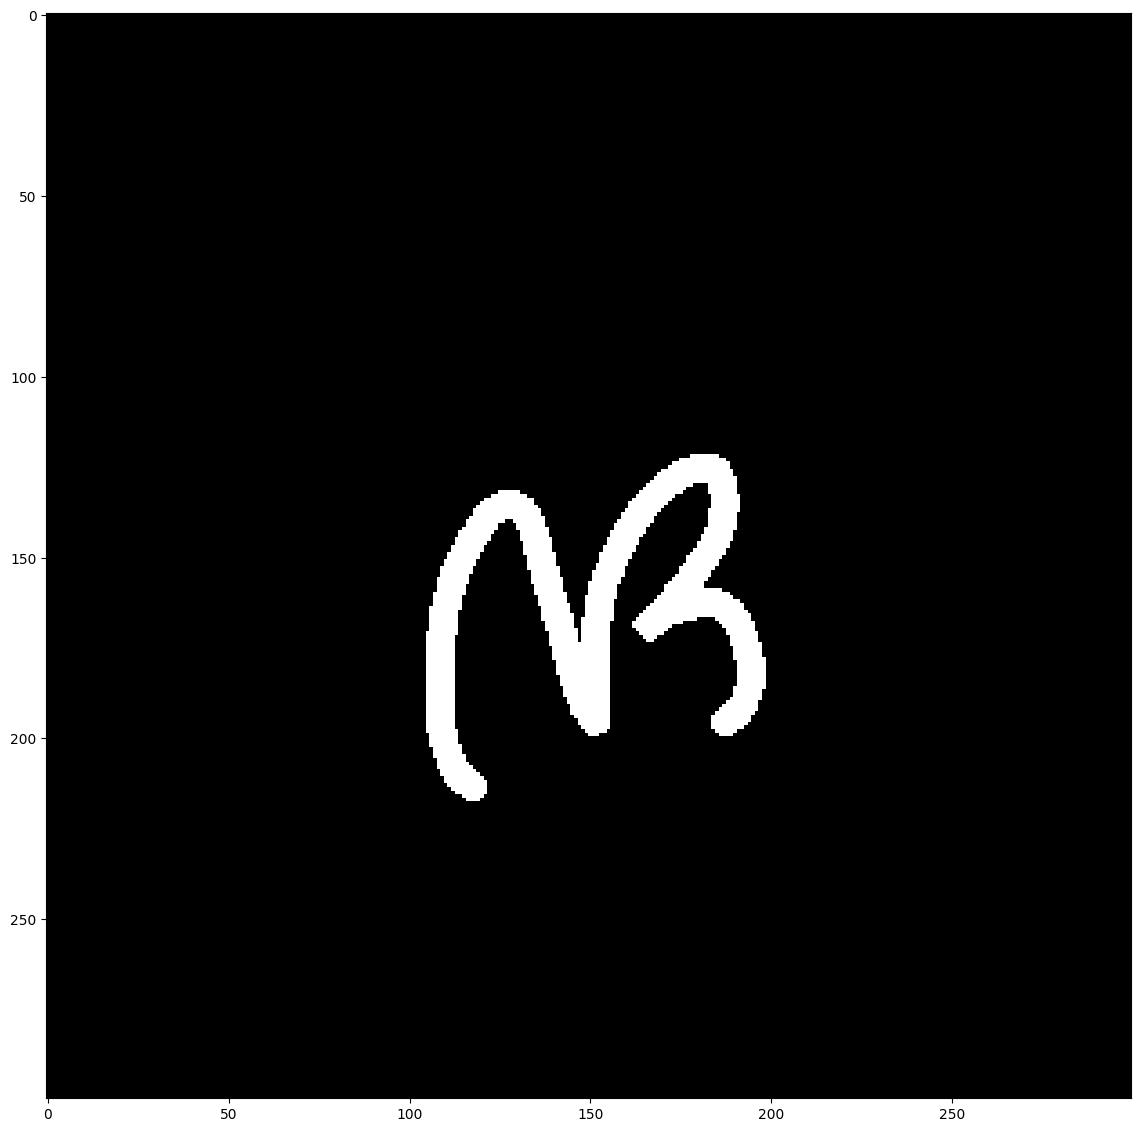

Predicted as ന്ഥ


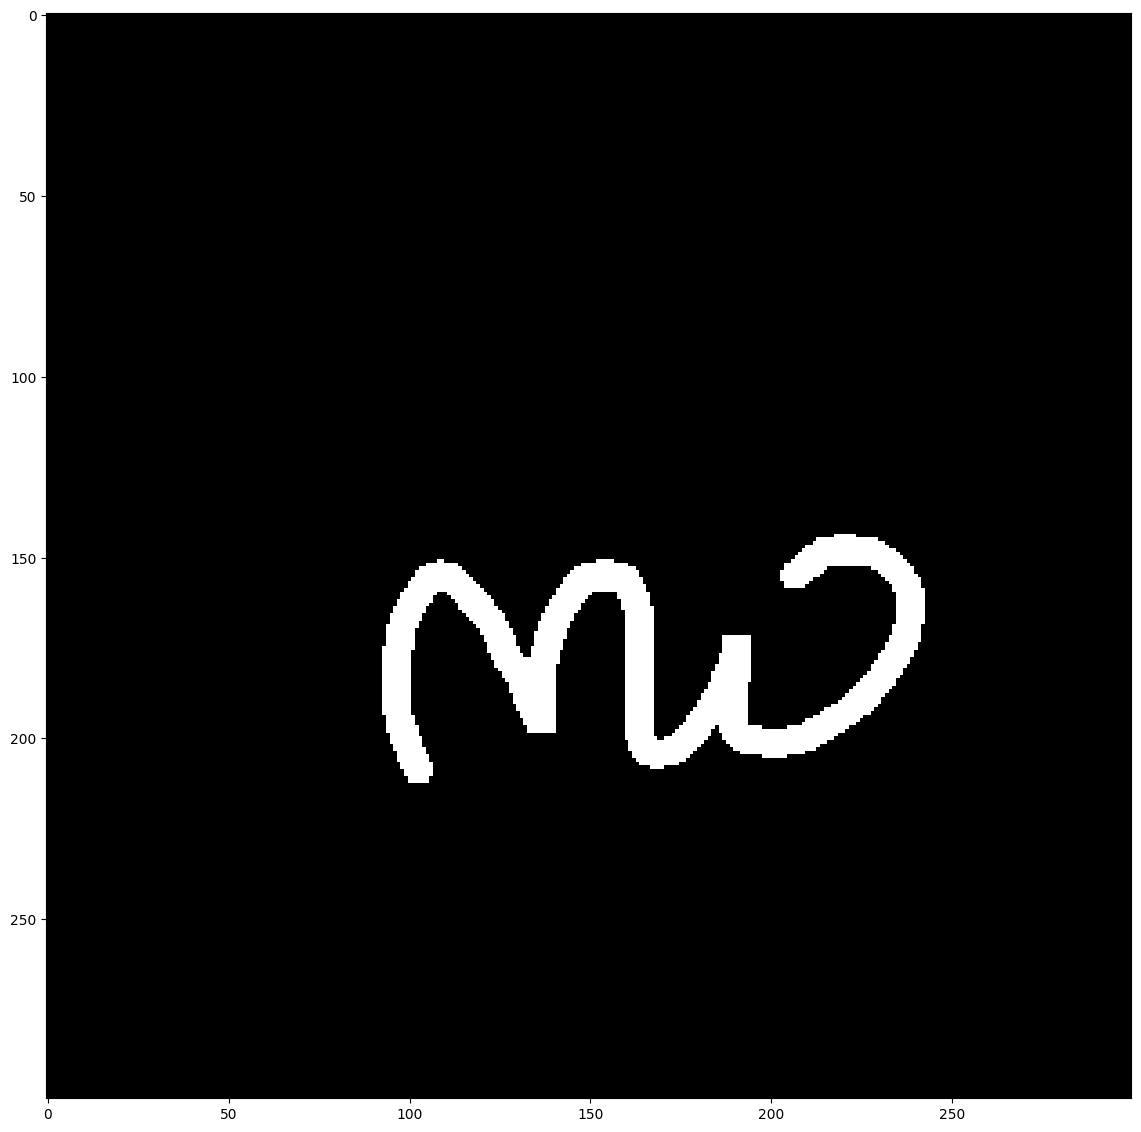

Predicted as ര


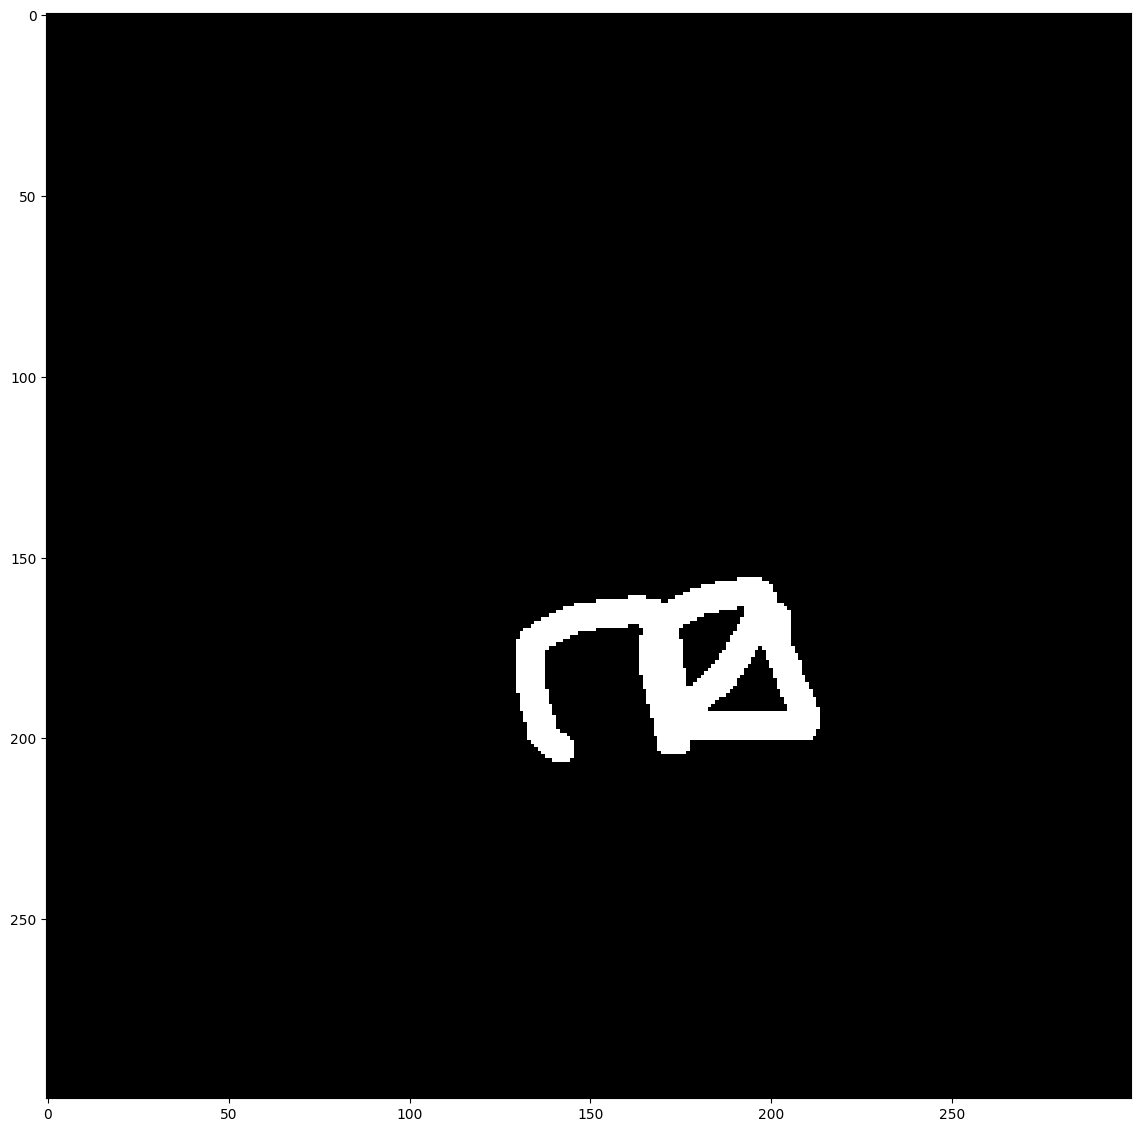

Predicted as ന്‍റ


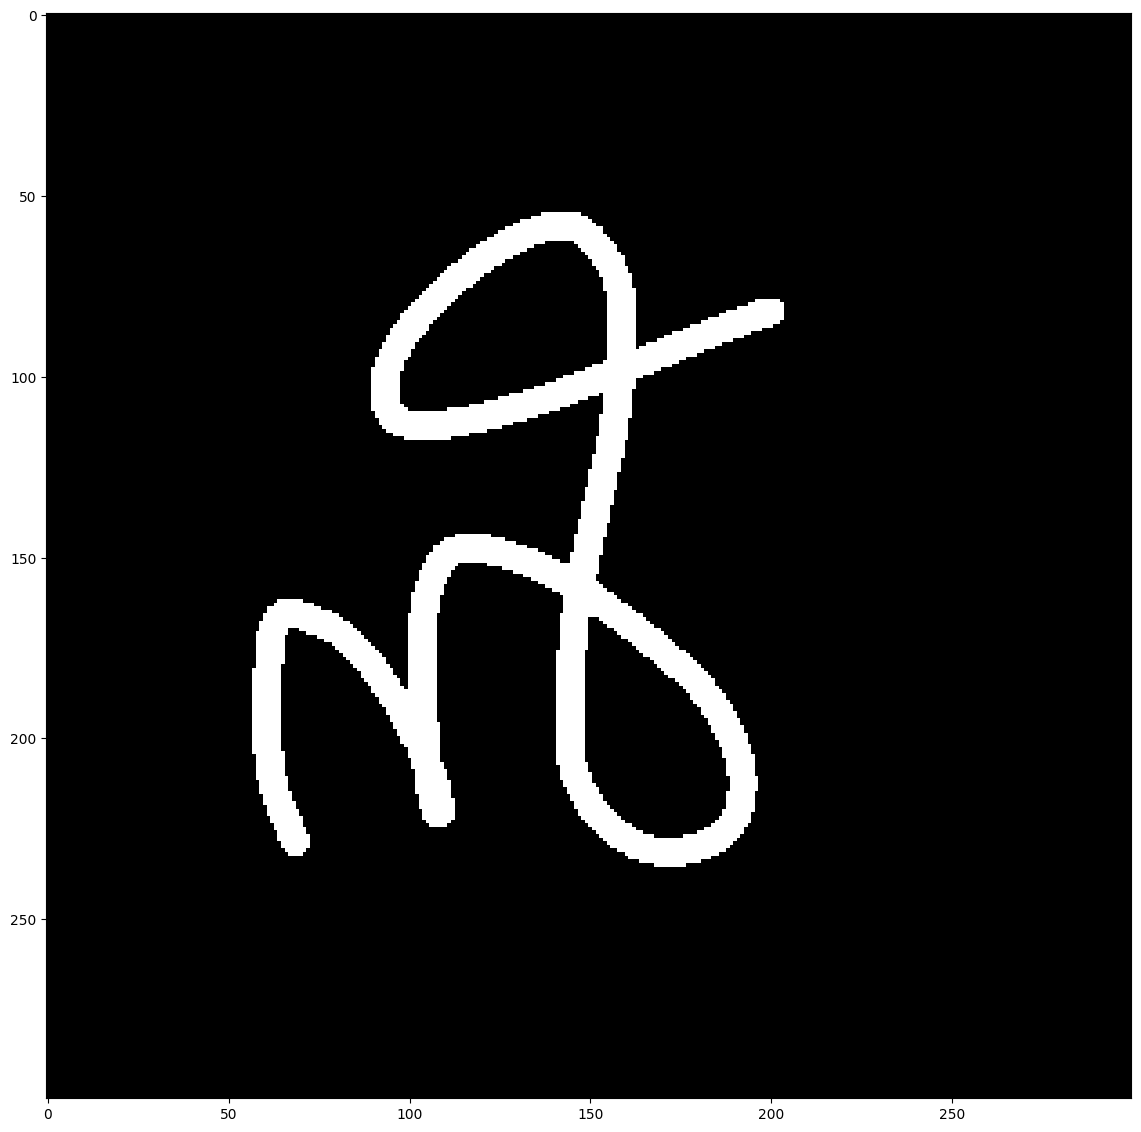

Predicted as പ്ല


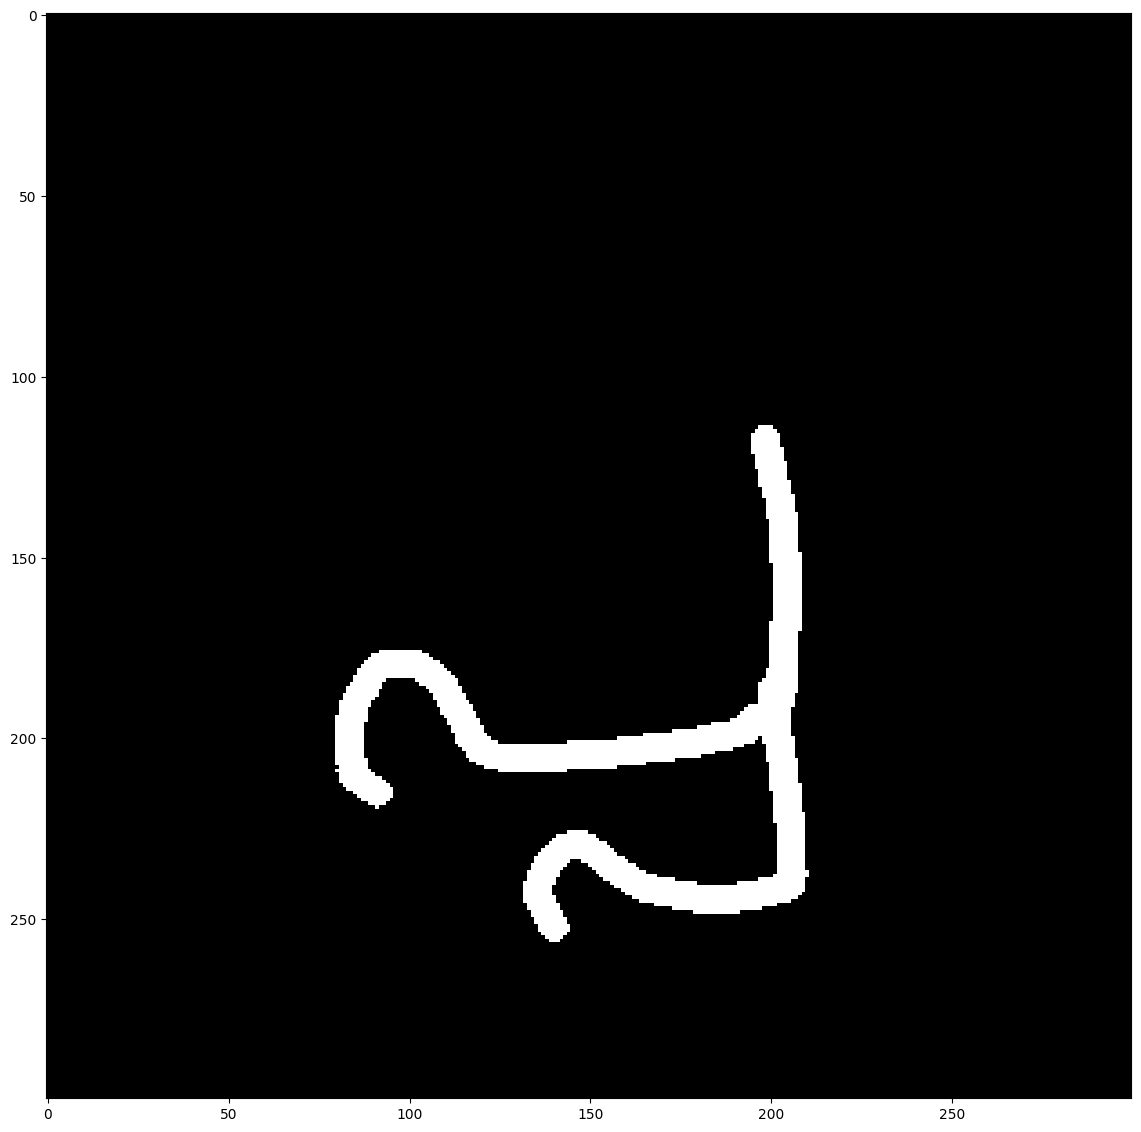

Predicted as ഷ


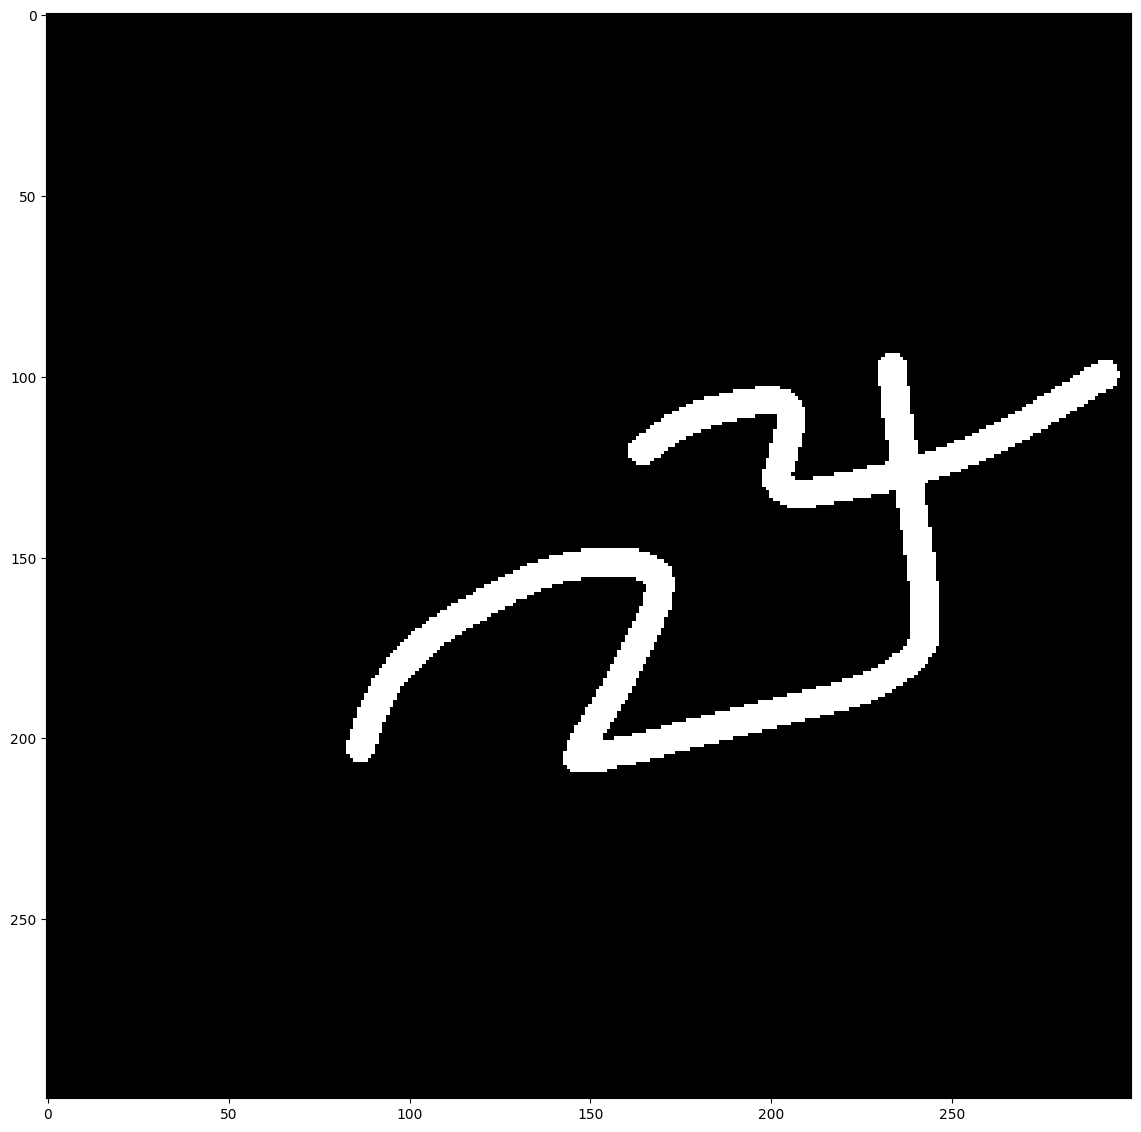

Predicted as ല്‍


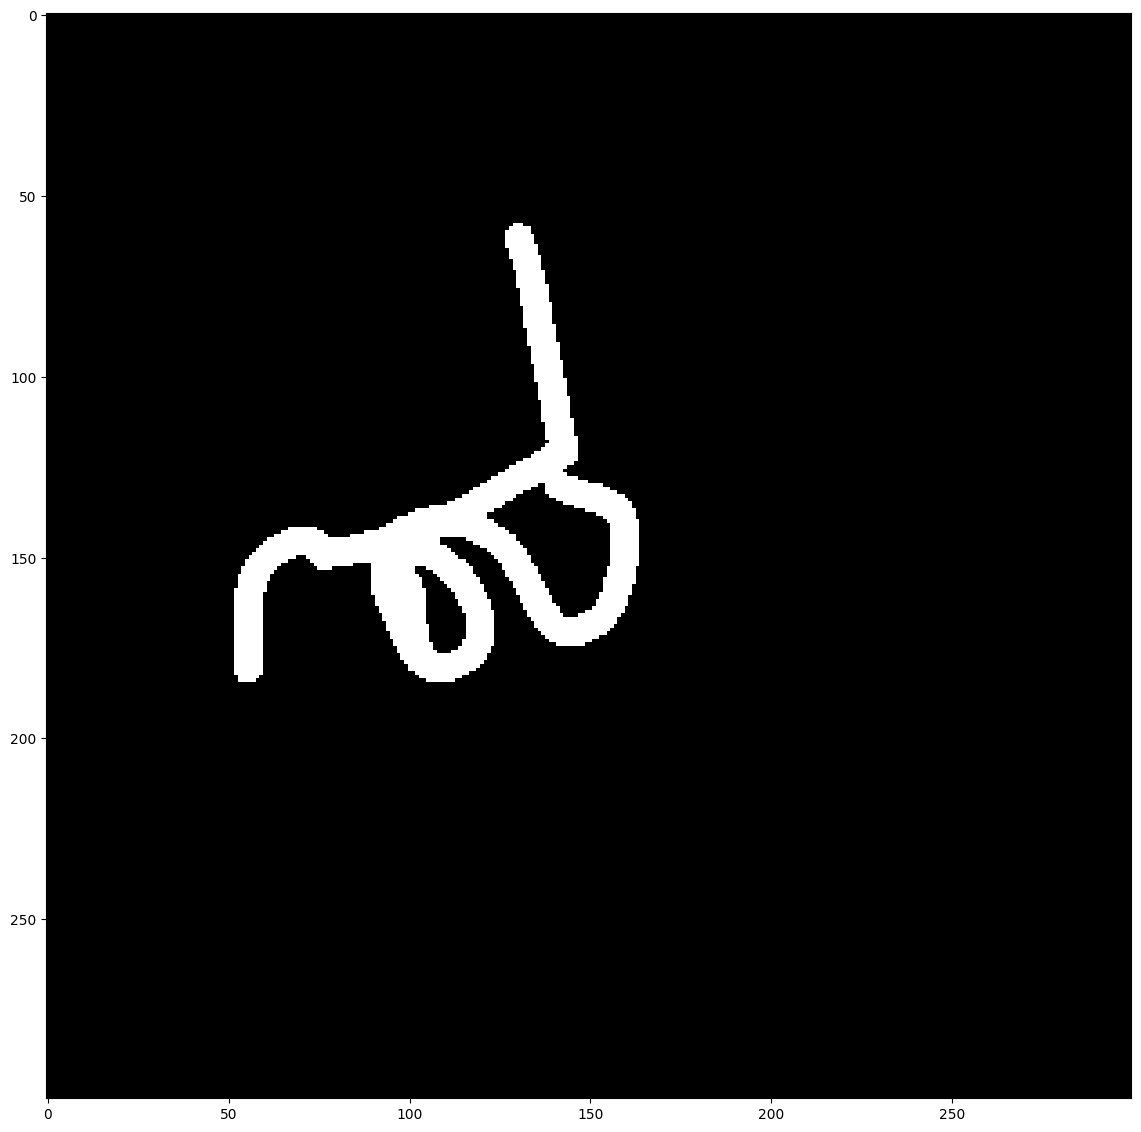

Predicted as ഹ


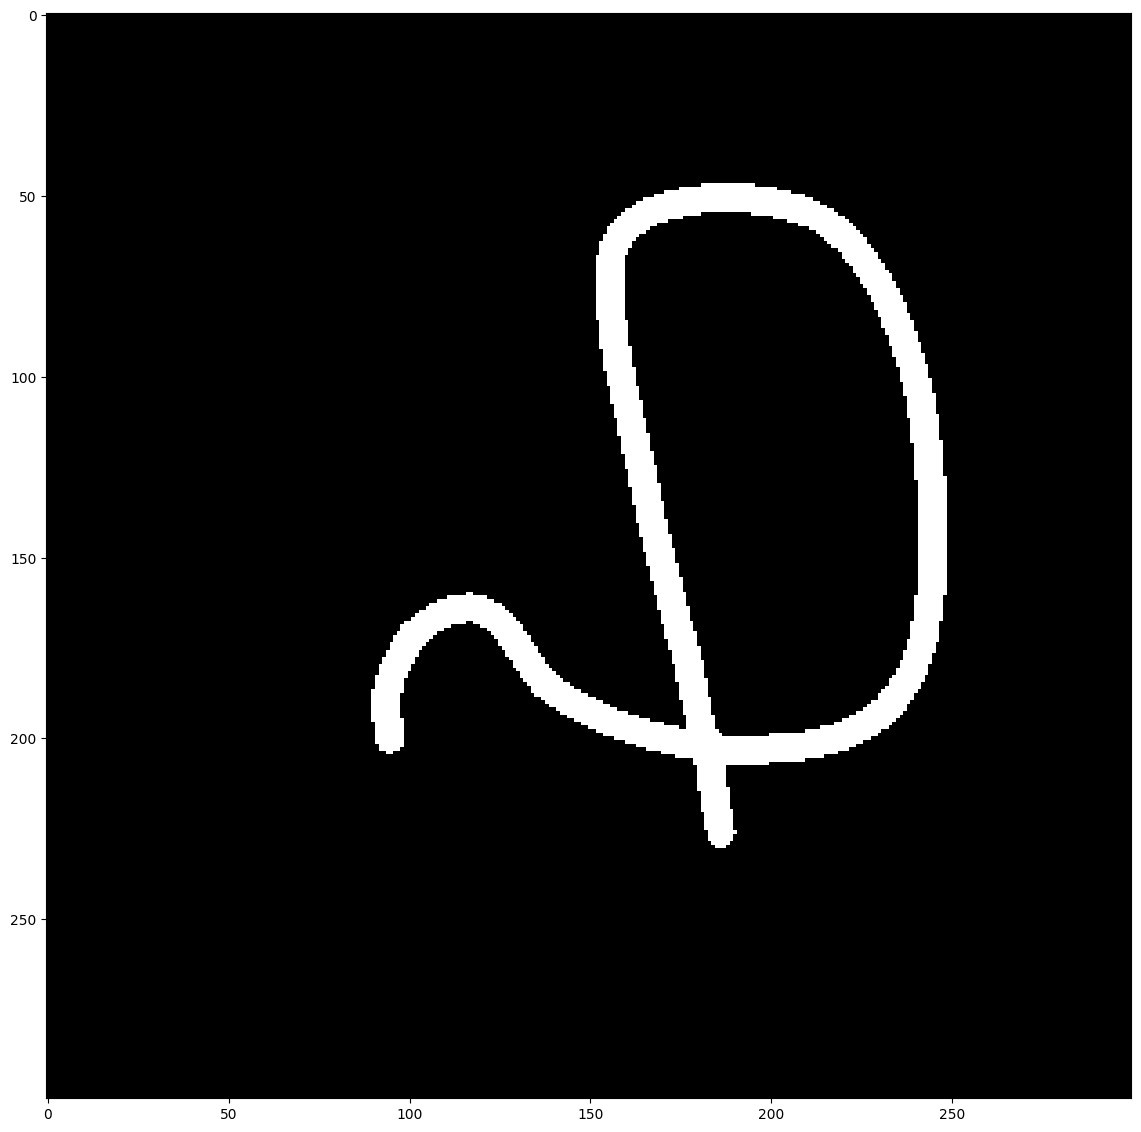

Predicted as ല്‍


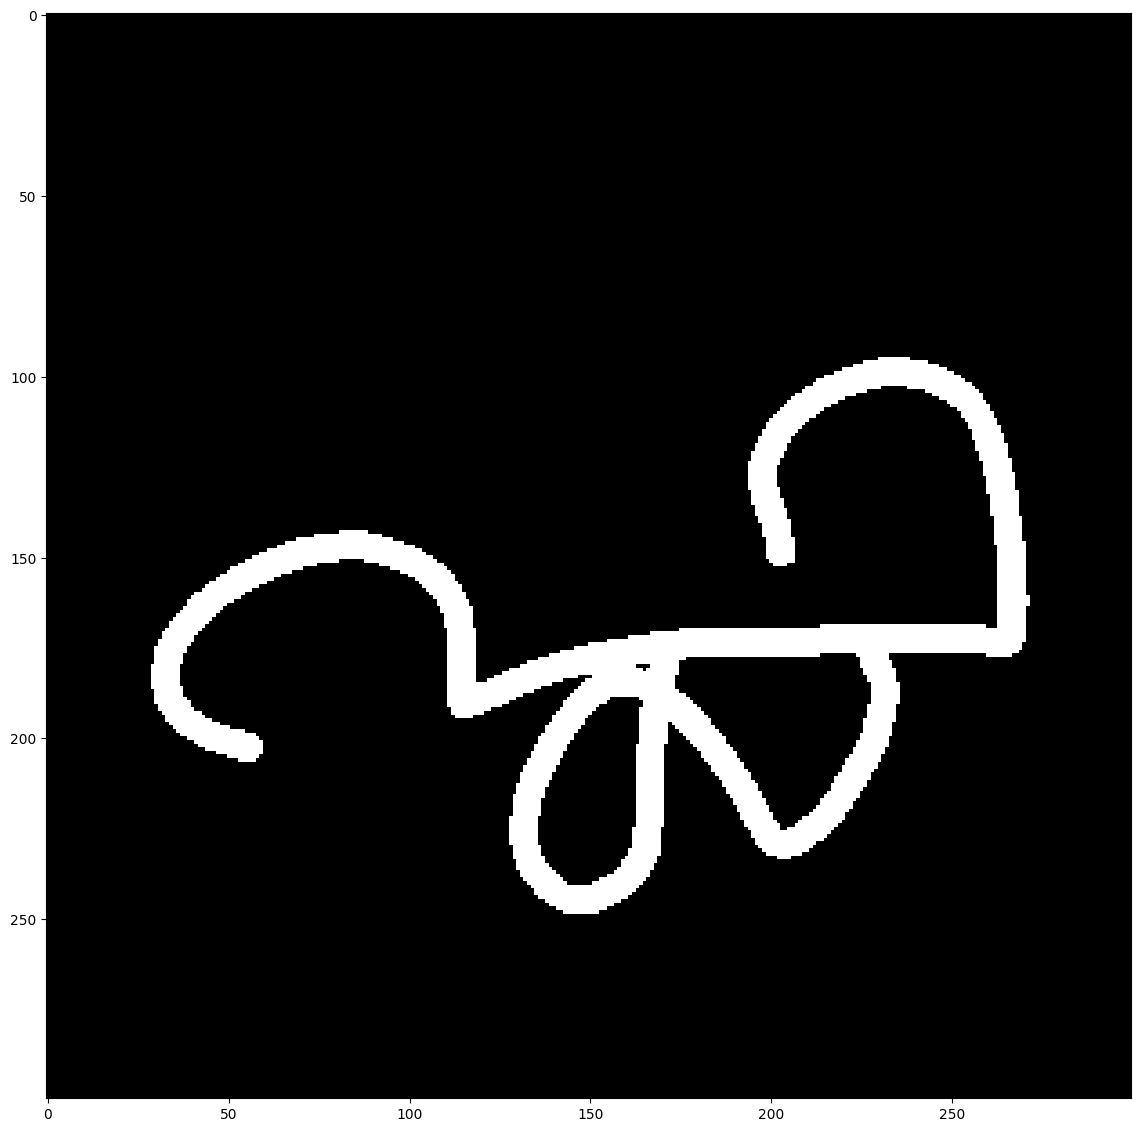

Predicted as ഖ


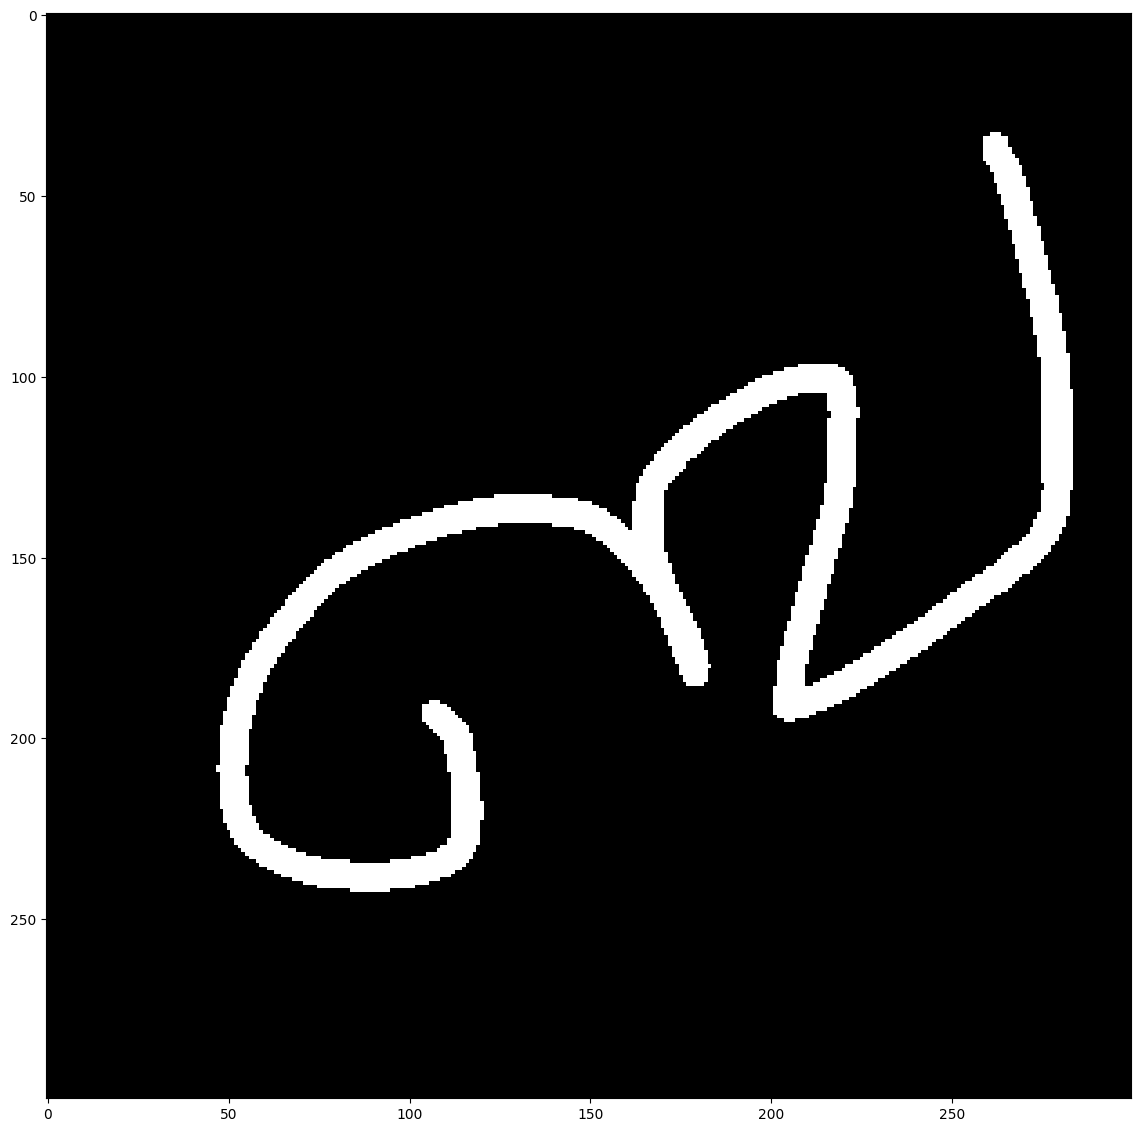

Predicted as ബ്ല


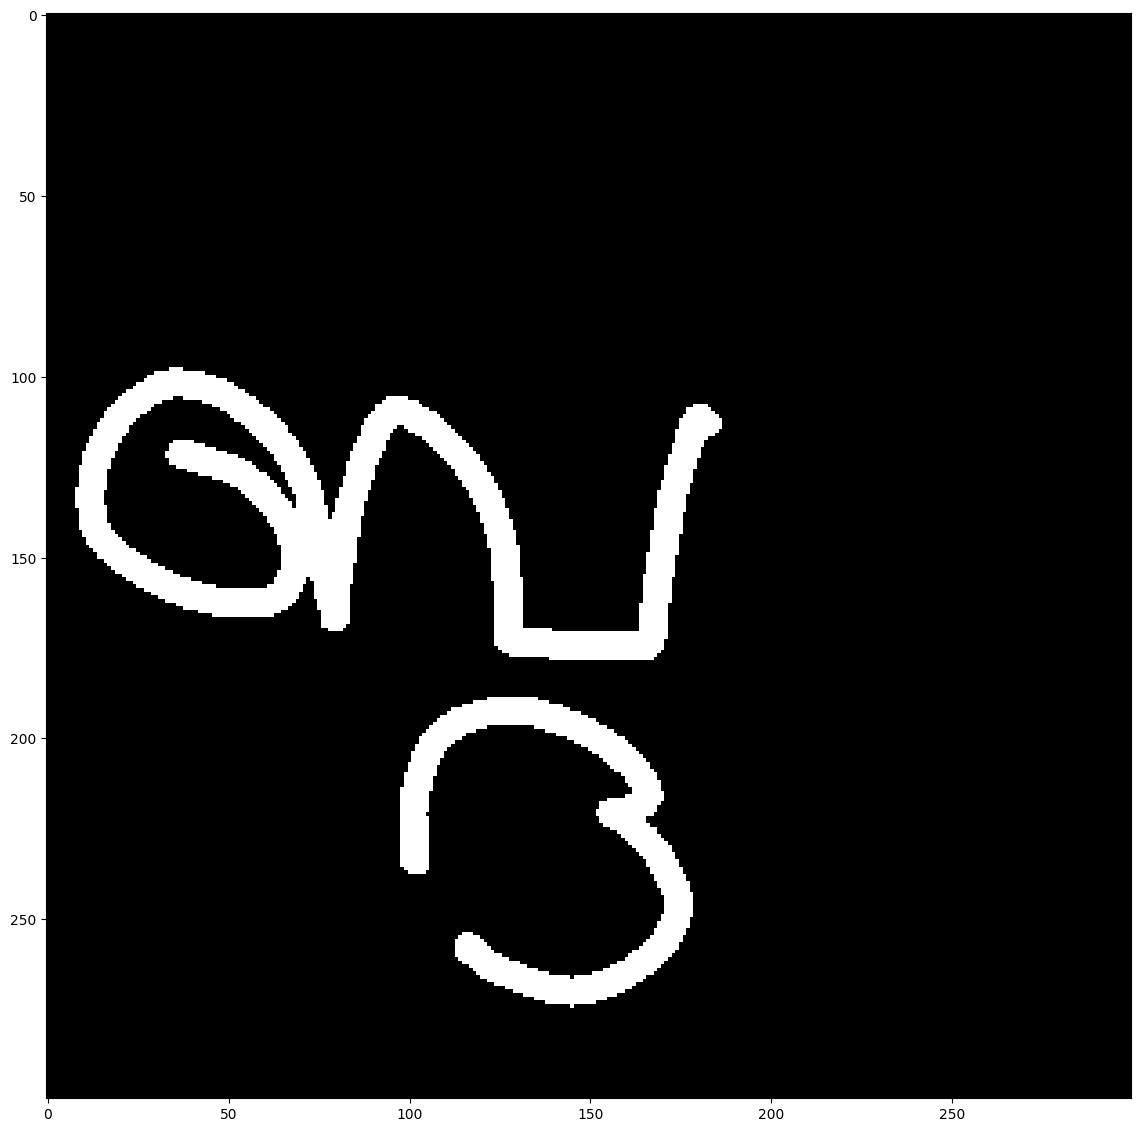

Predicted as സ്ല


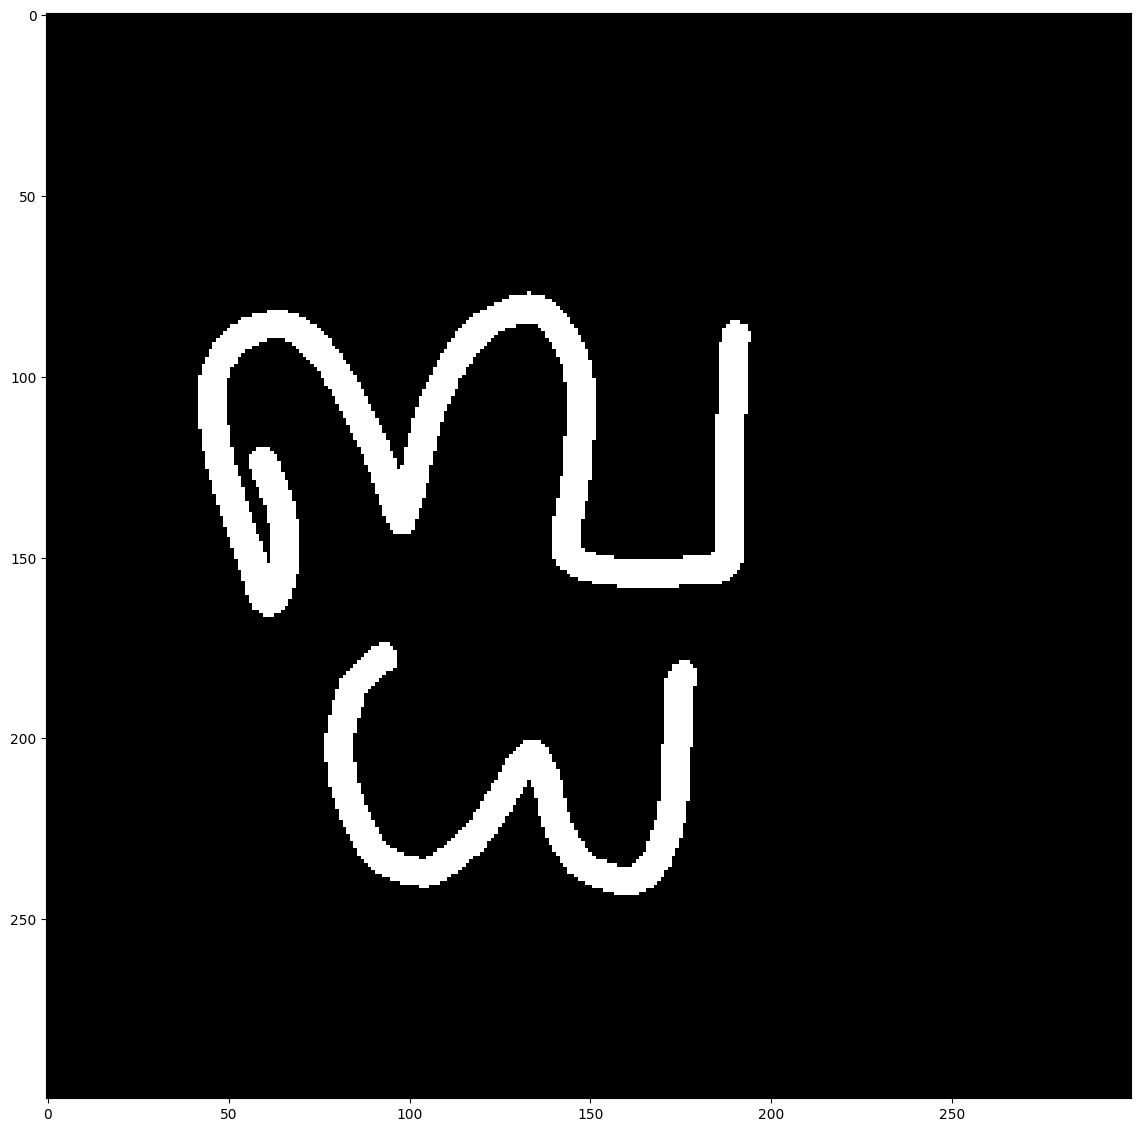

Predicted as ക്ഷ


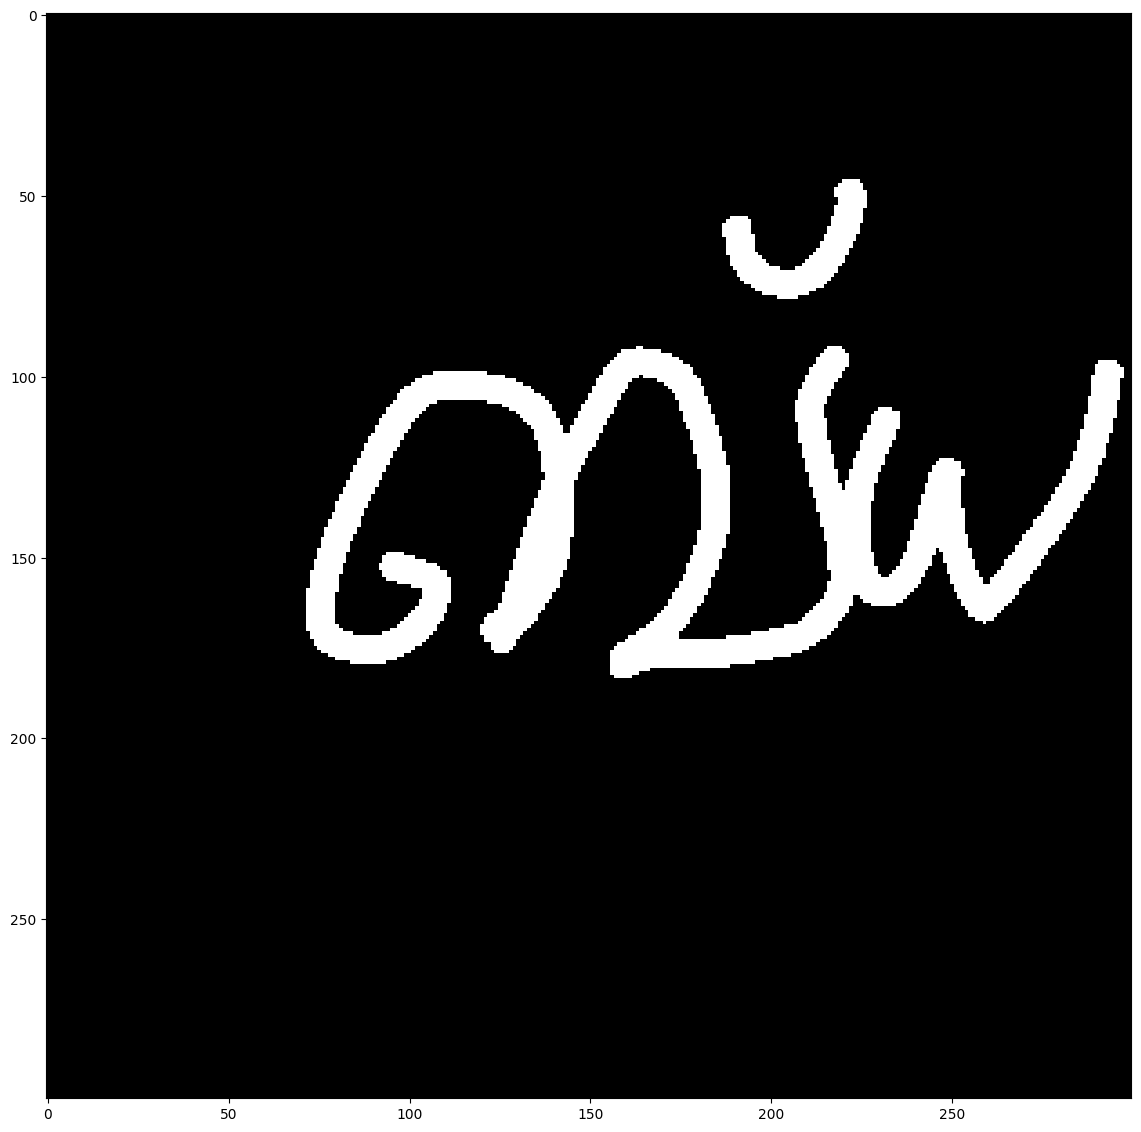

Predicted as ബ്ബ


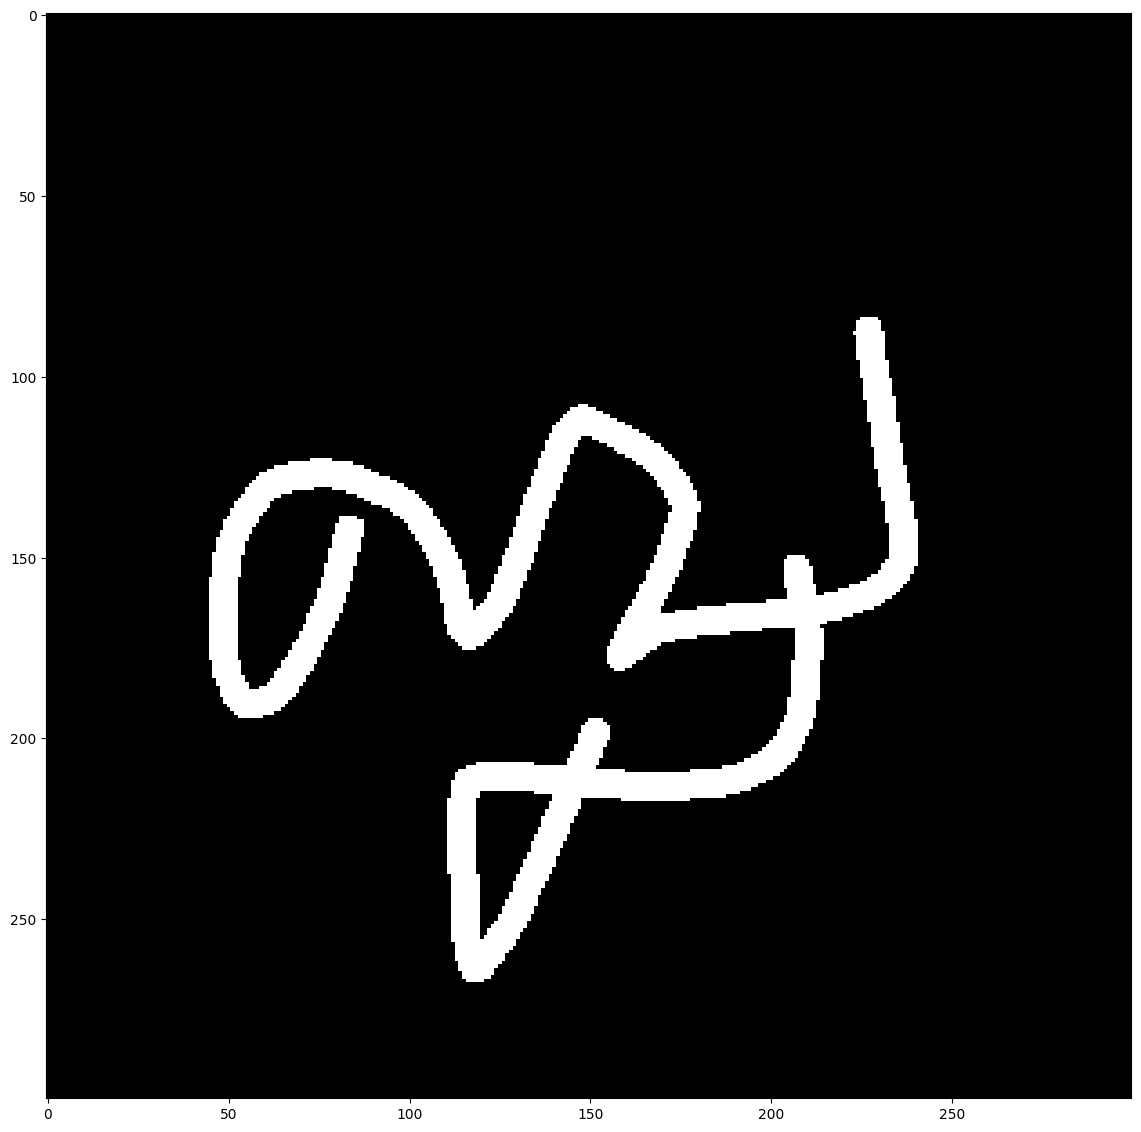

Predicted as ദ


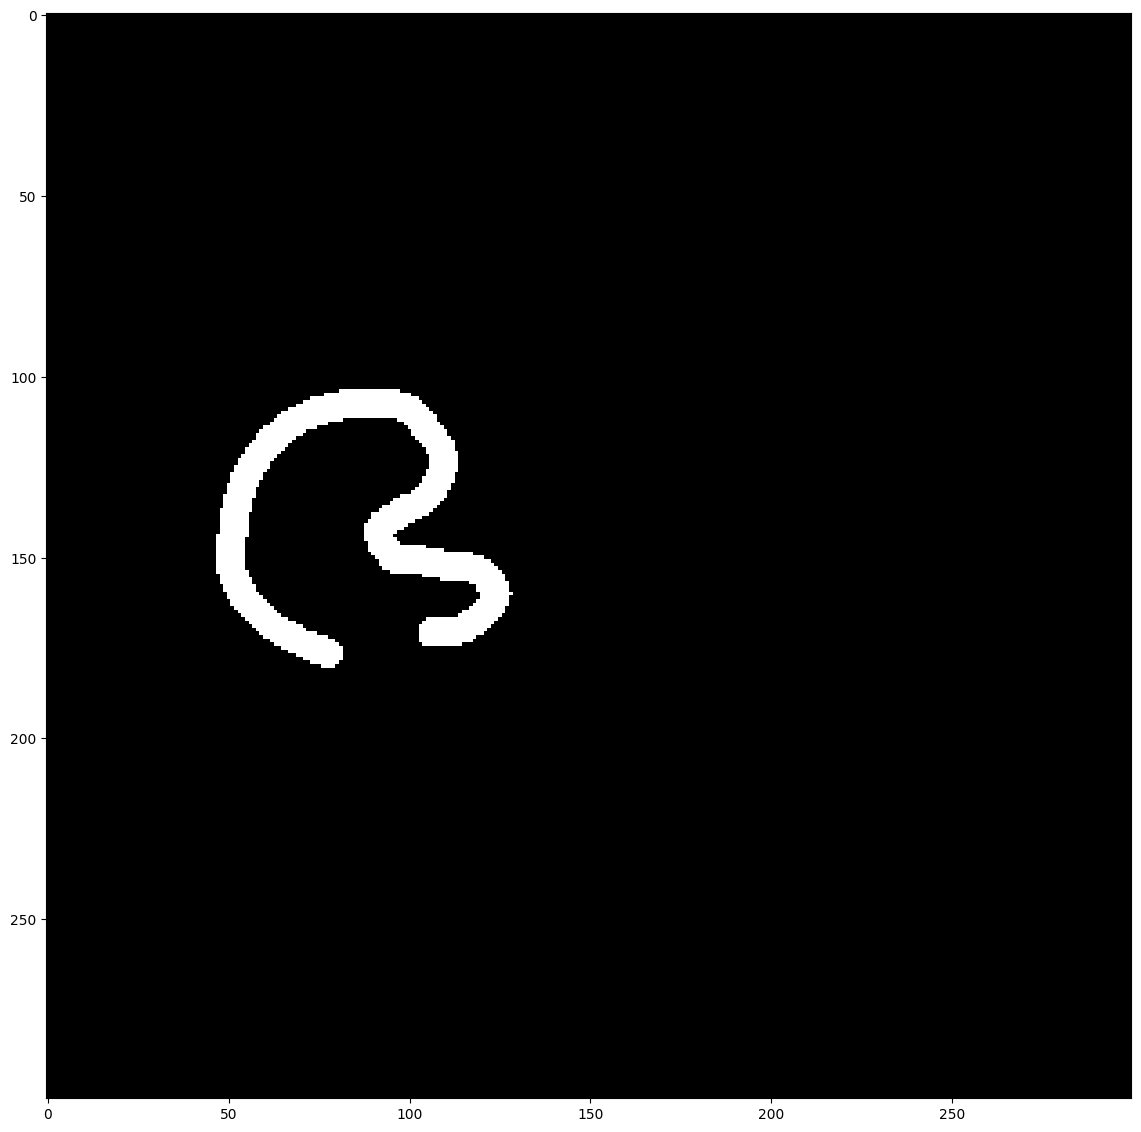

Predicted as ദ


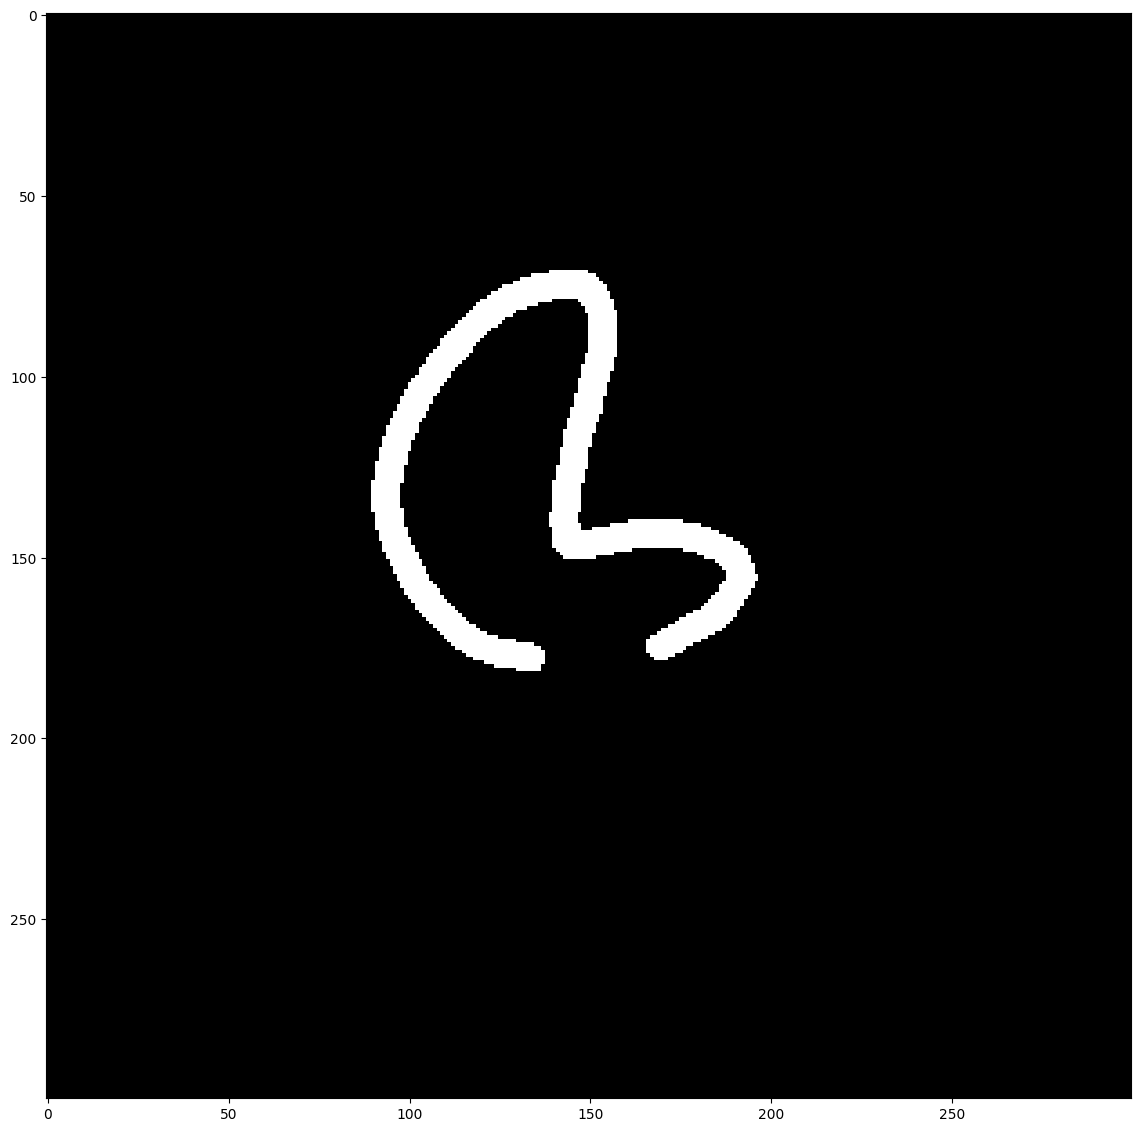

Predicted as ദ


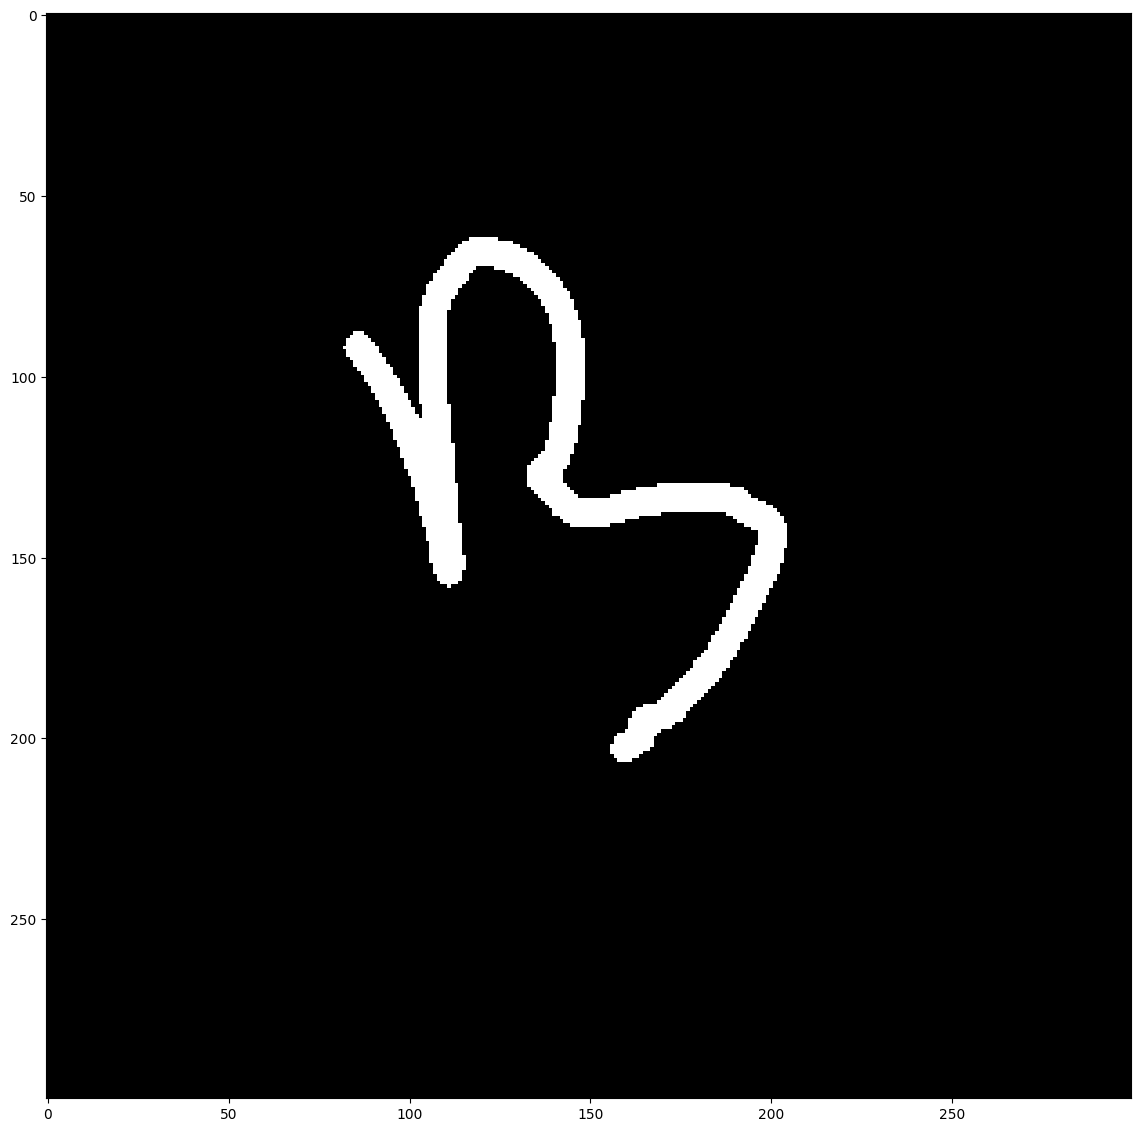

Predicted as ദ


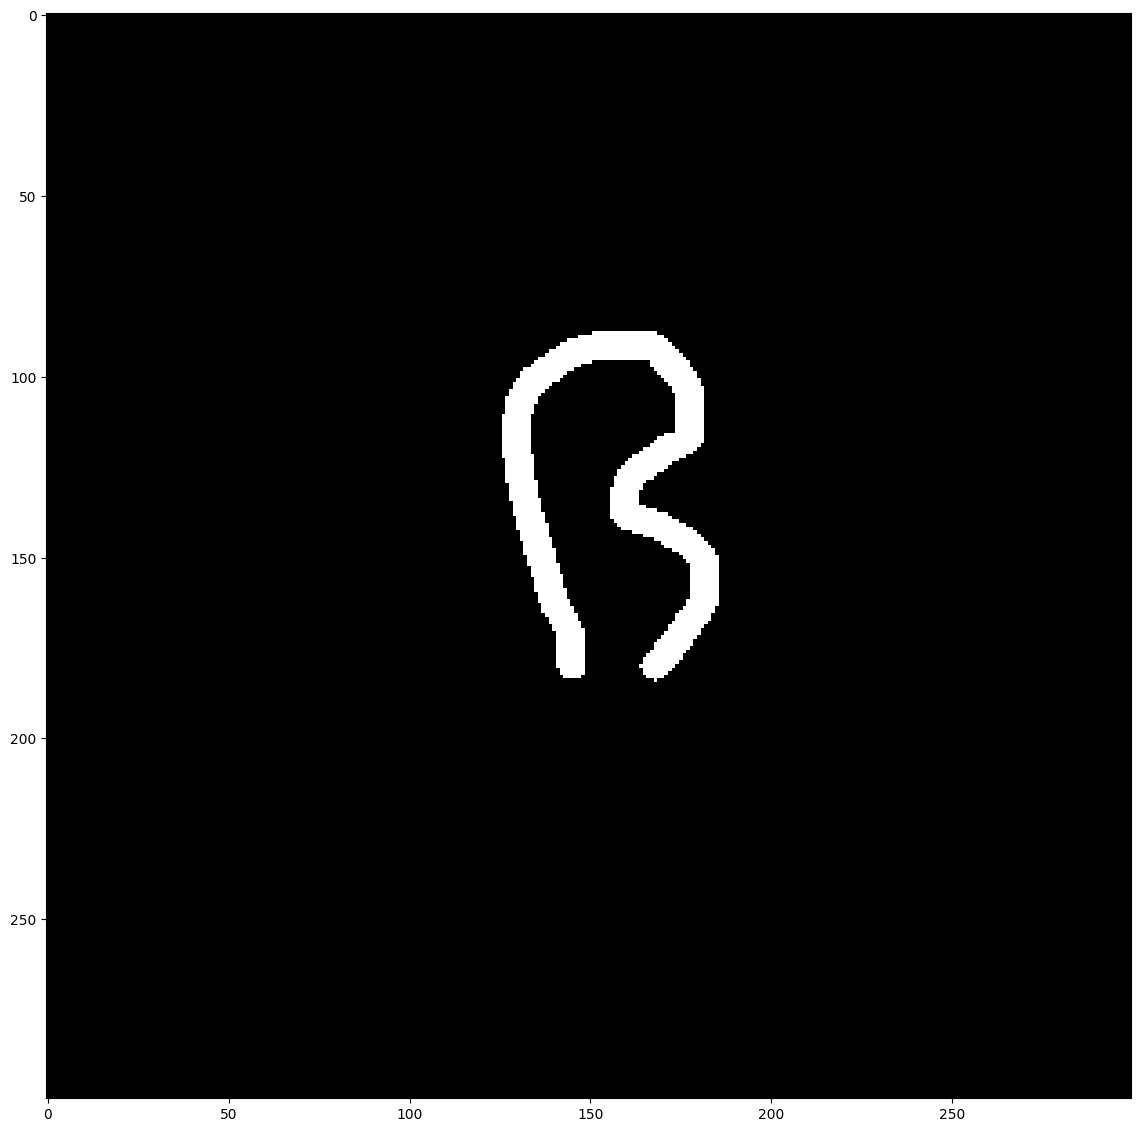

Predicted as ഠ


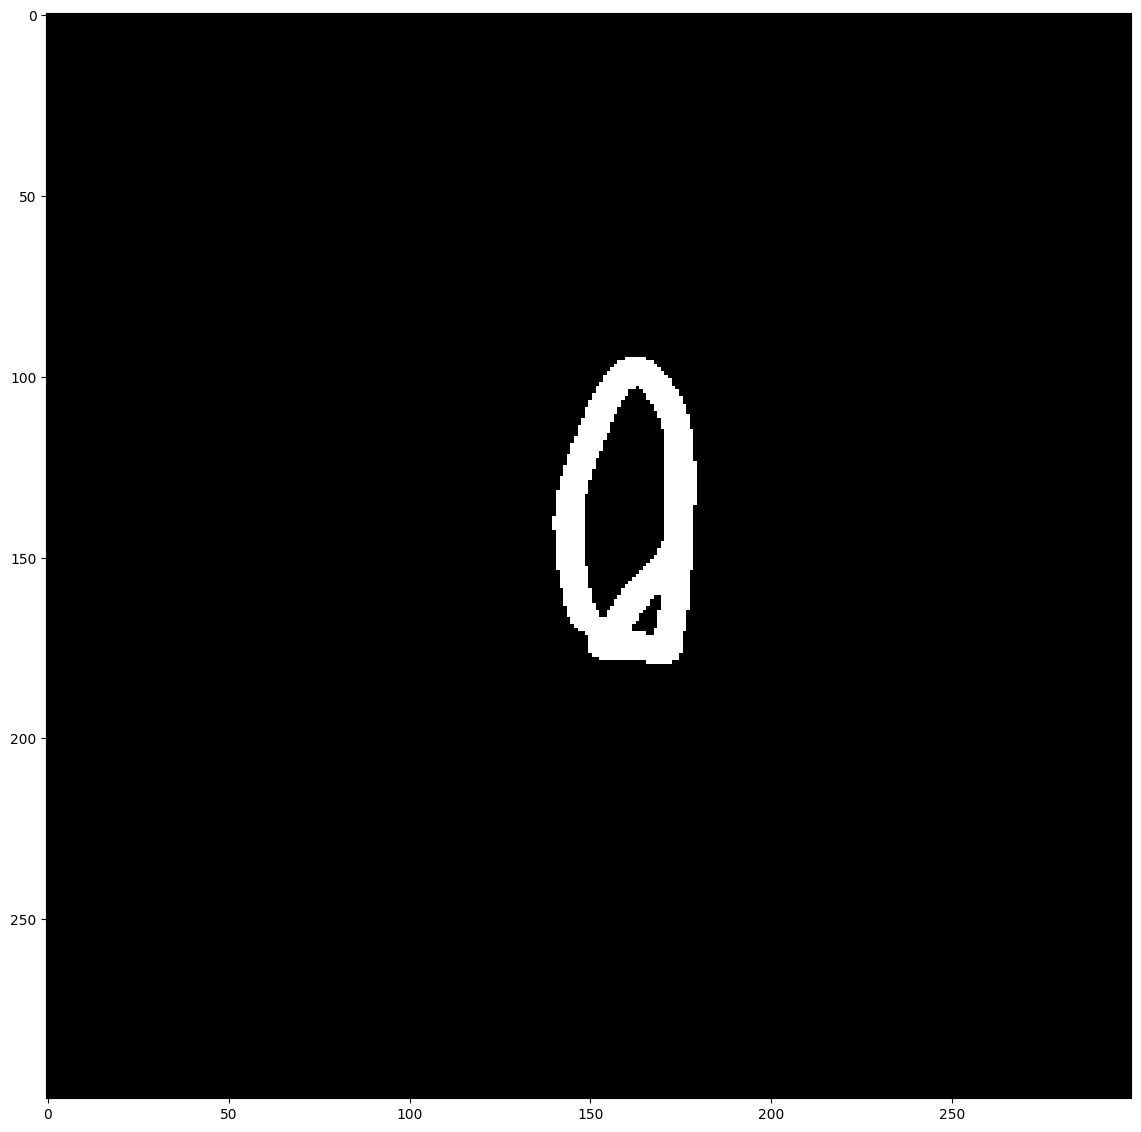

Predicted as ഋ


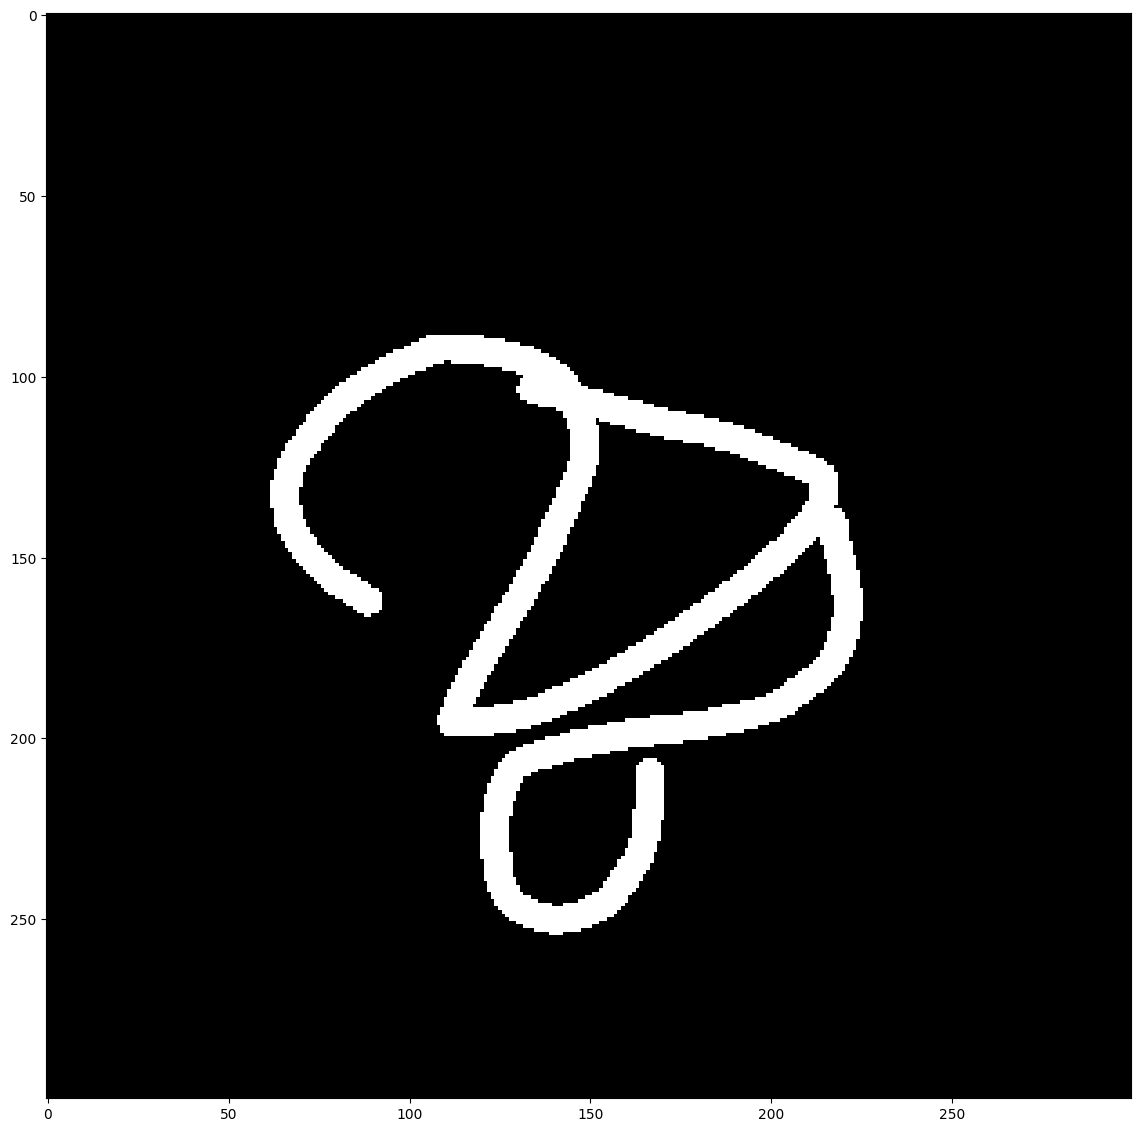

Predicted as ൂ


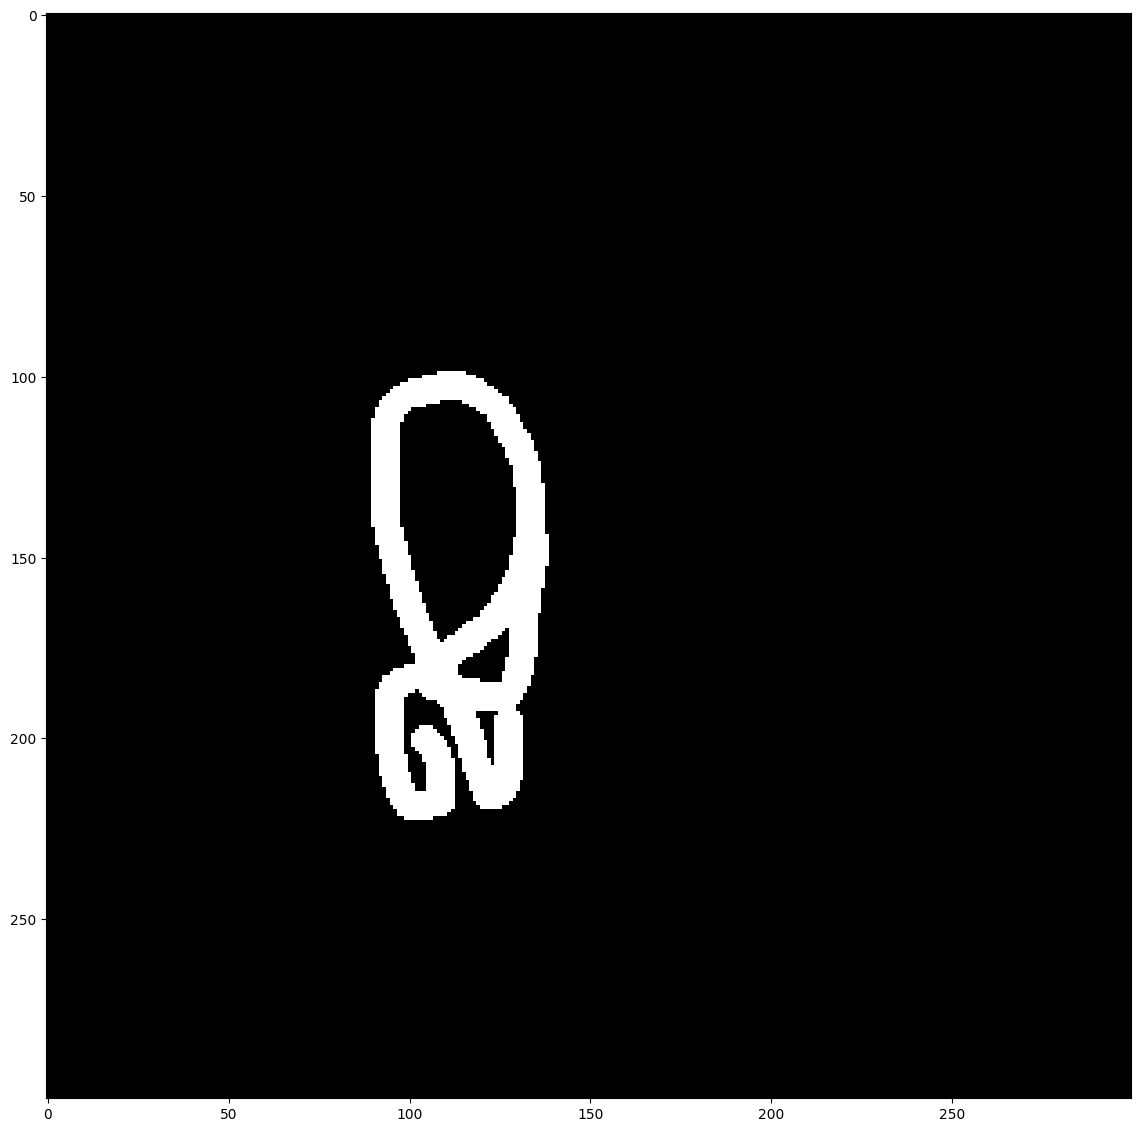

Predicted as ക


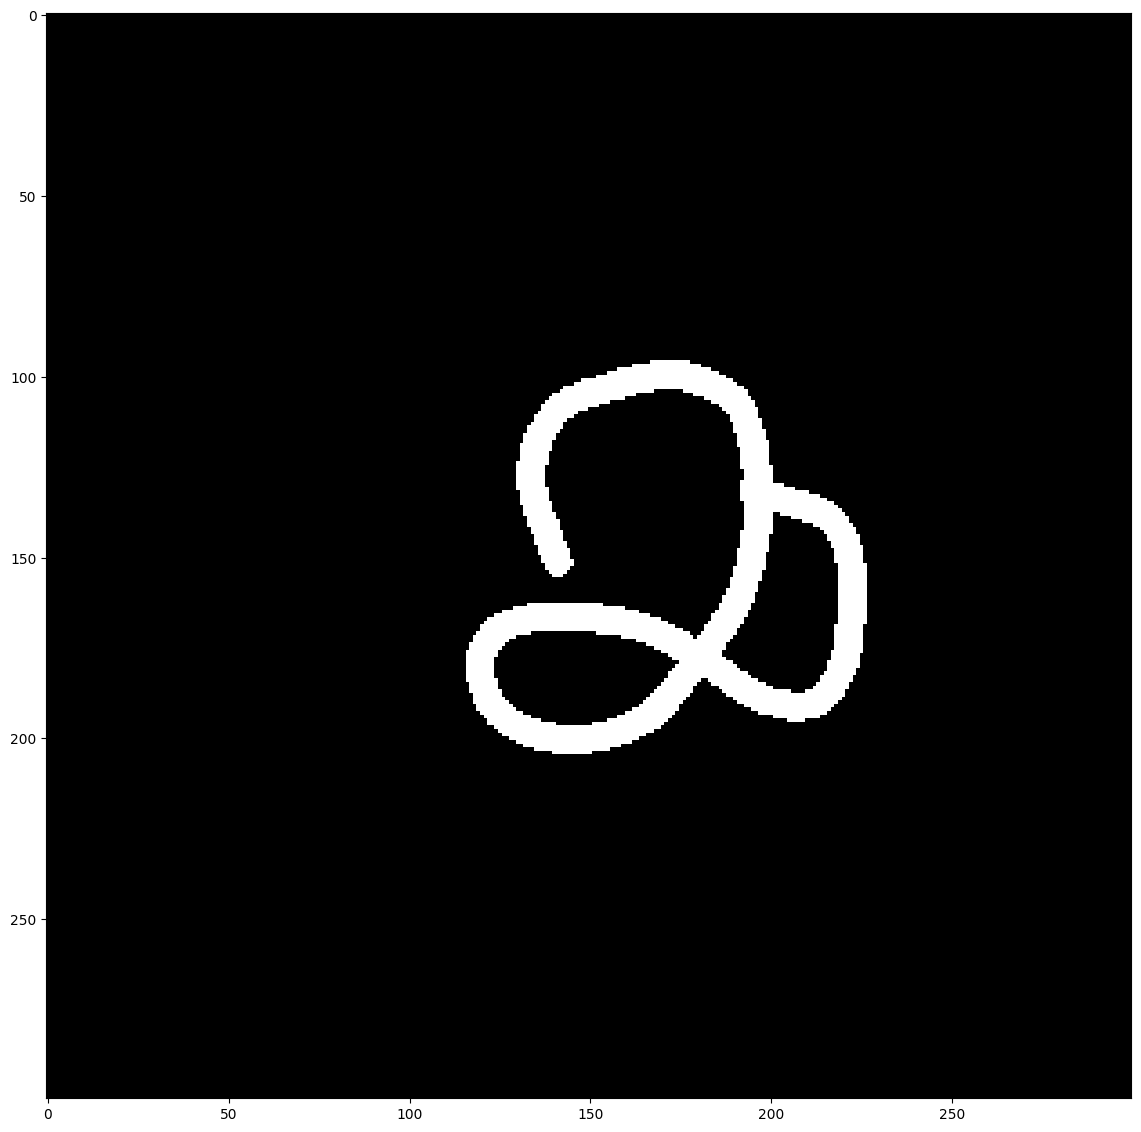

Predicted as ത


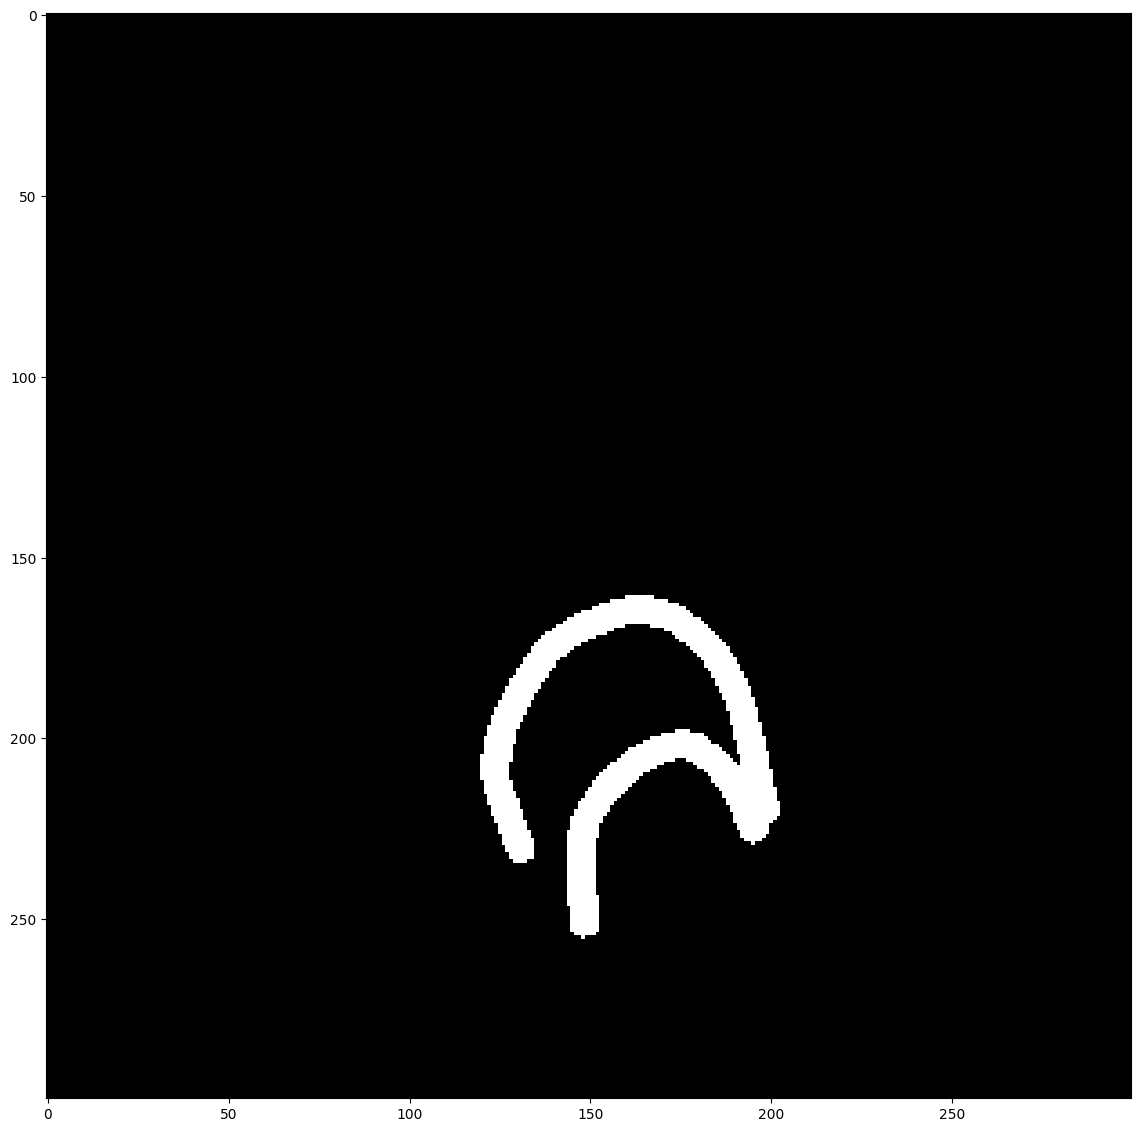

Predicted as ച


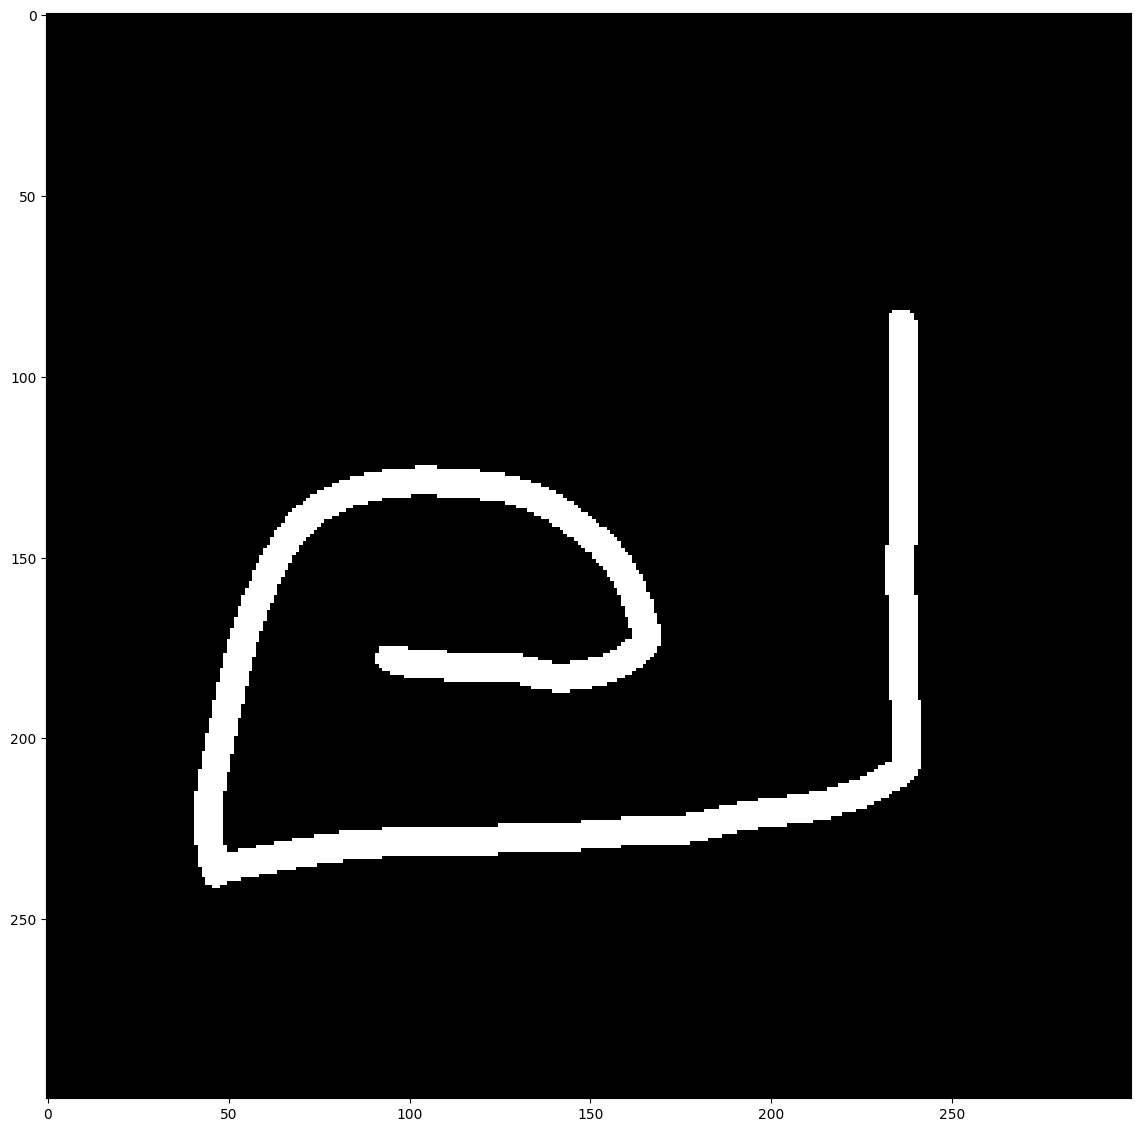

Predicted as യ്യ


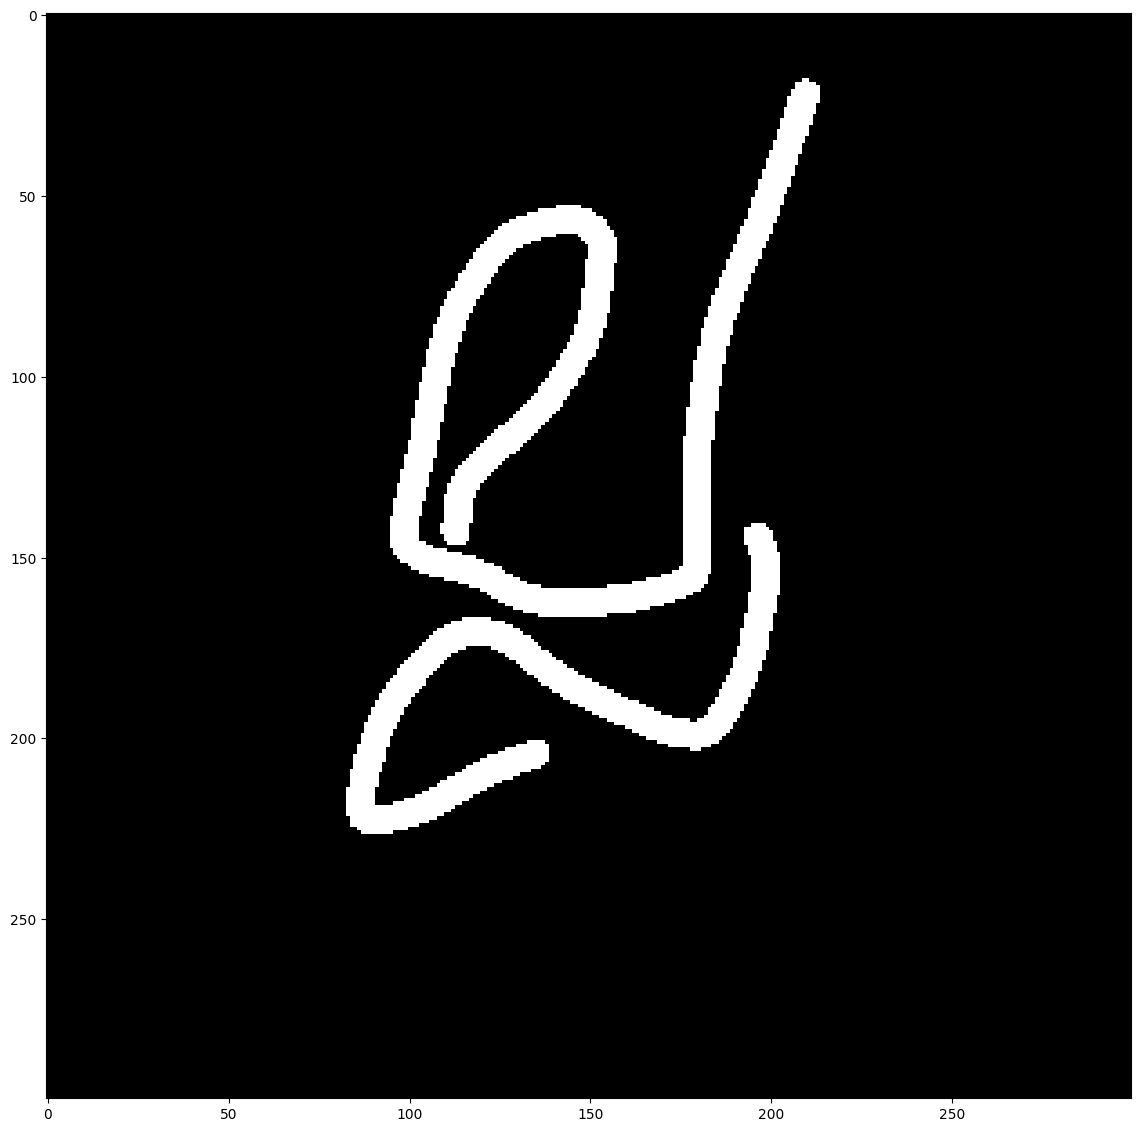

Predicted as ക്ത


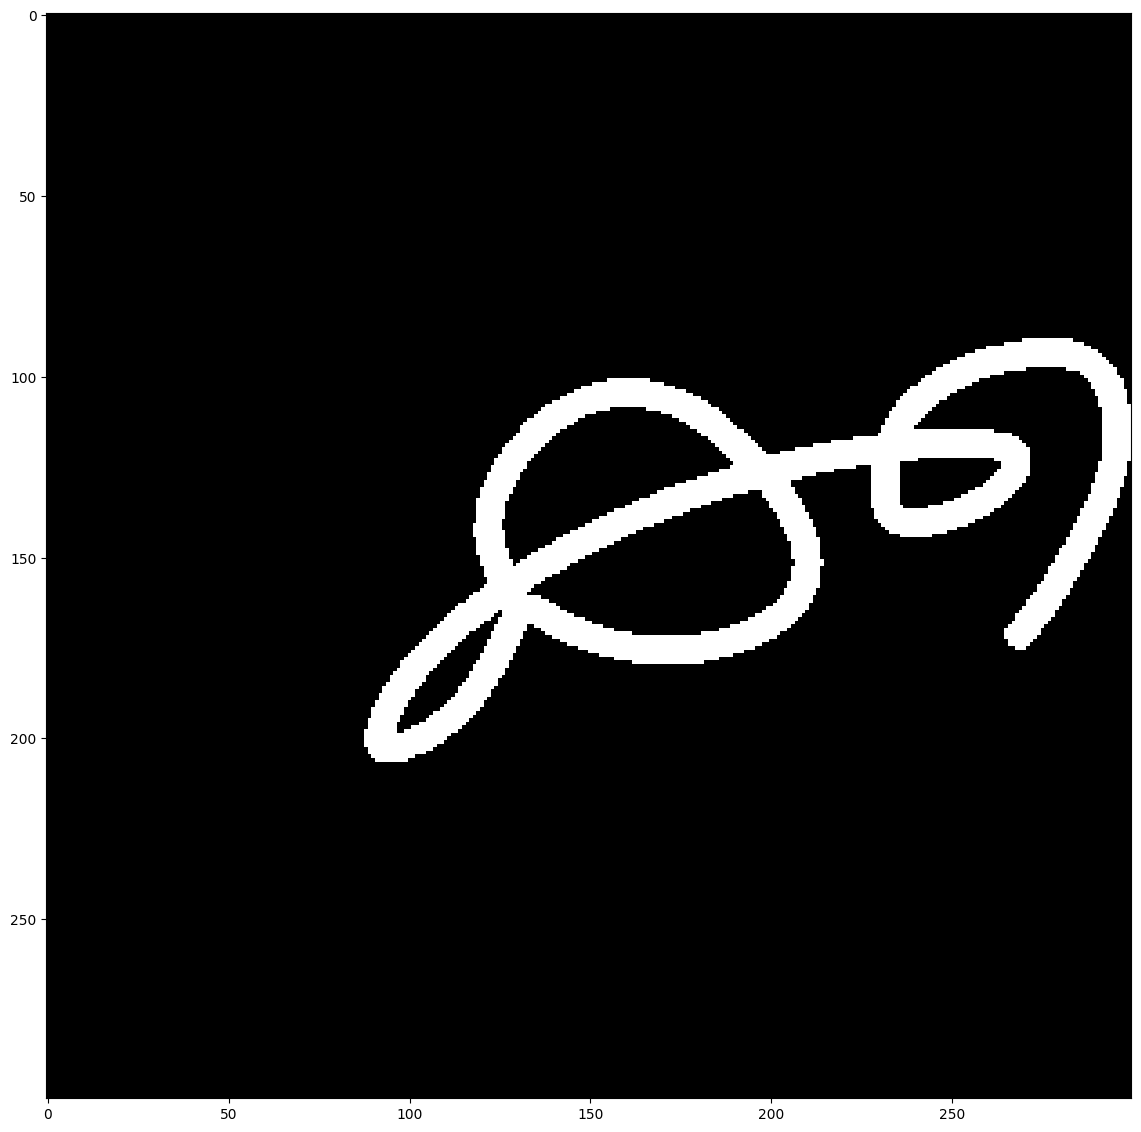

Predicted as ഉ


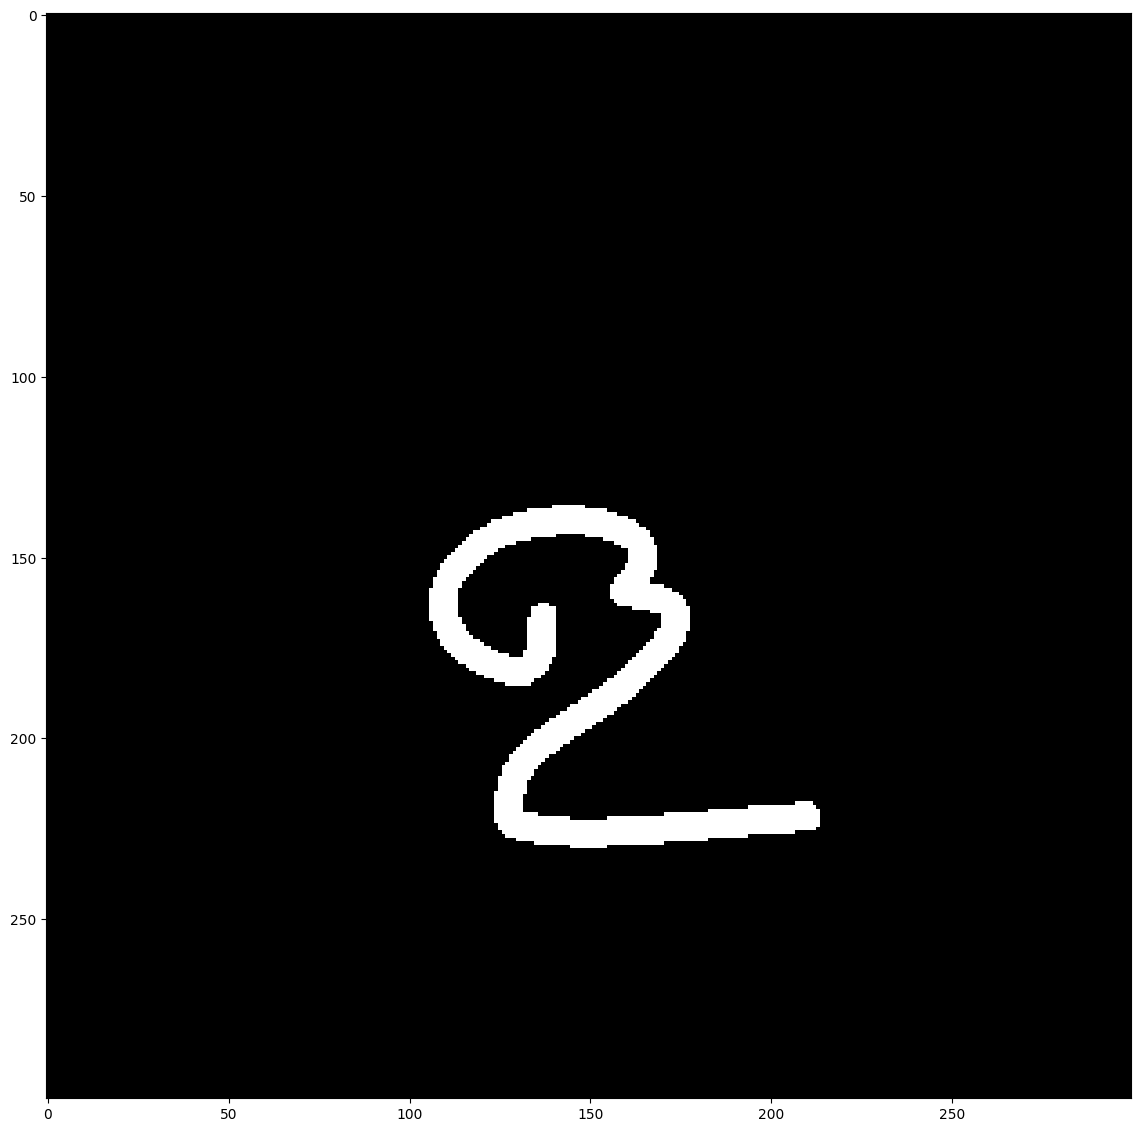

Predicted as ഇ


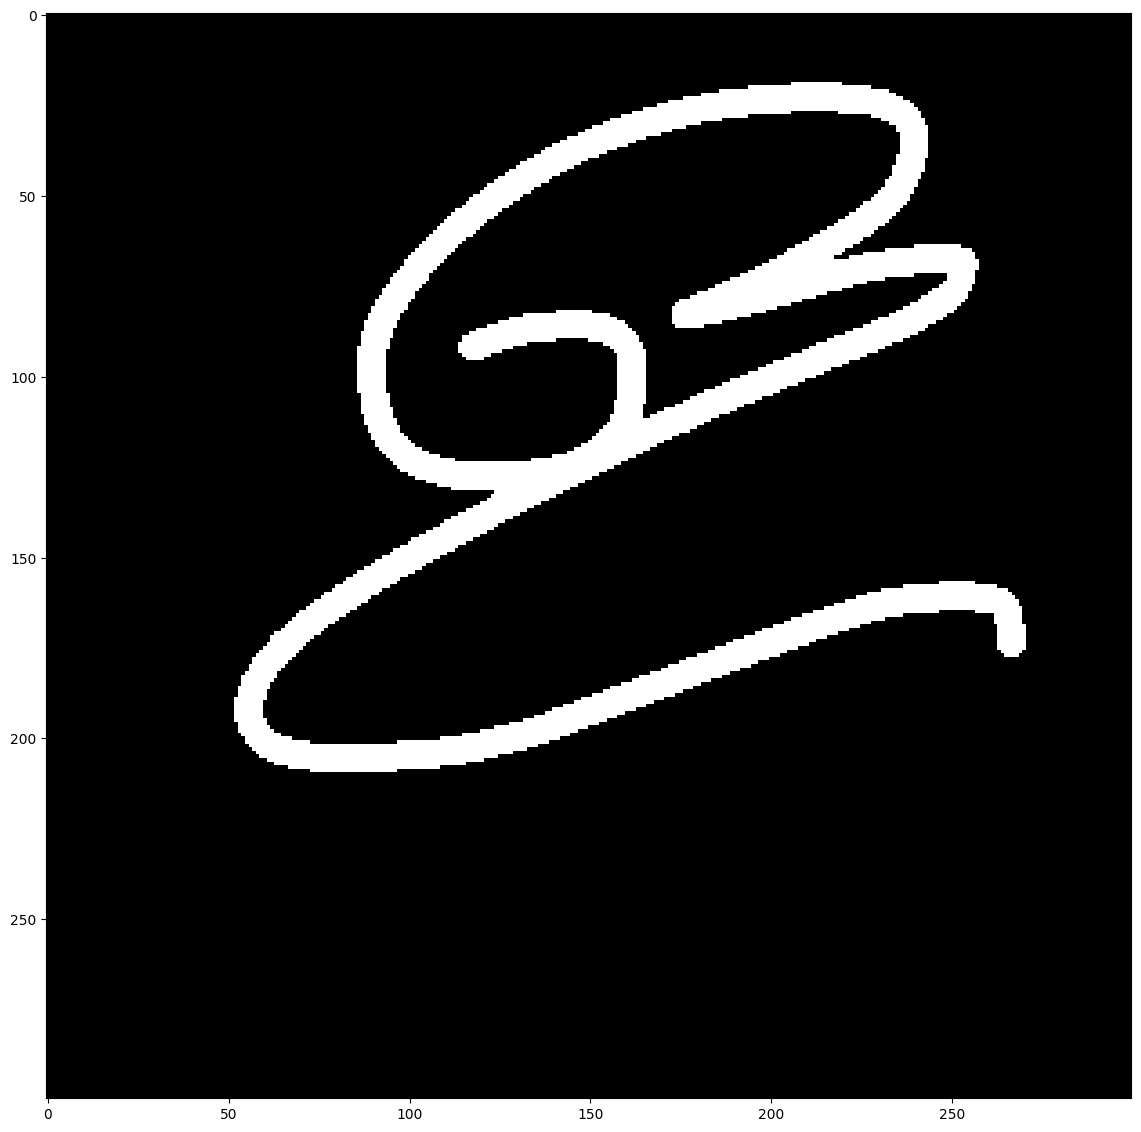

Predicted as ശ


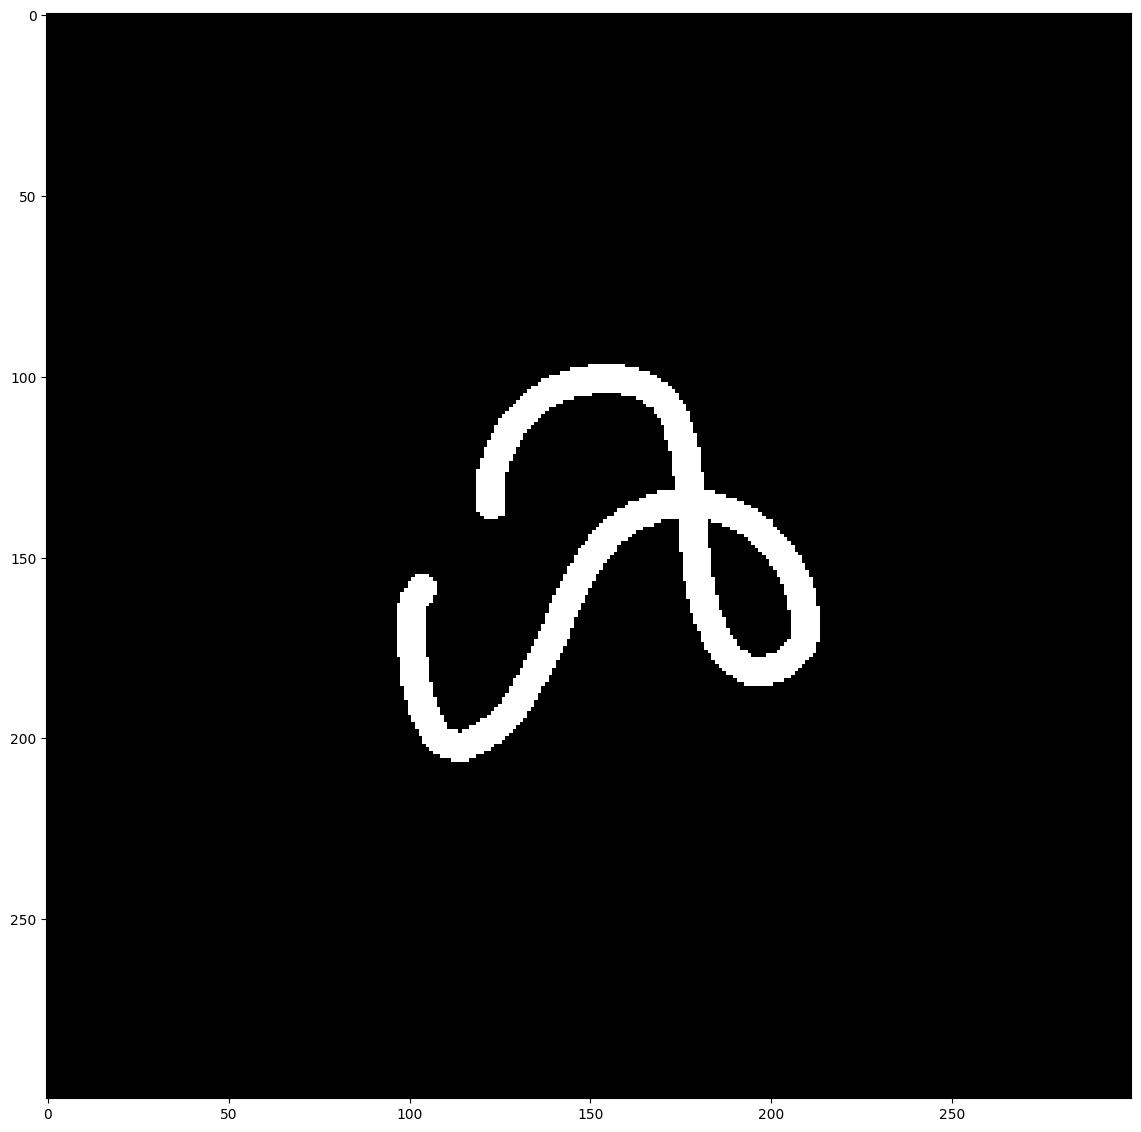

Predicted as യ


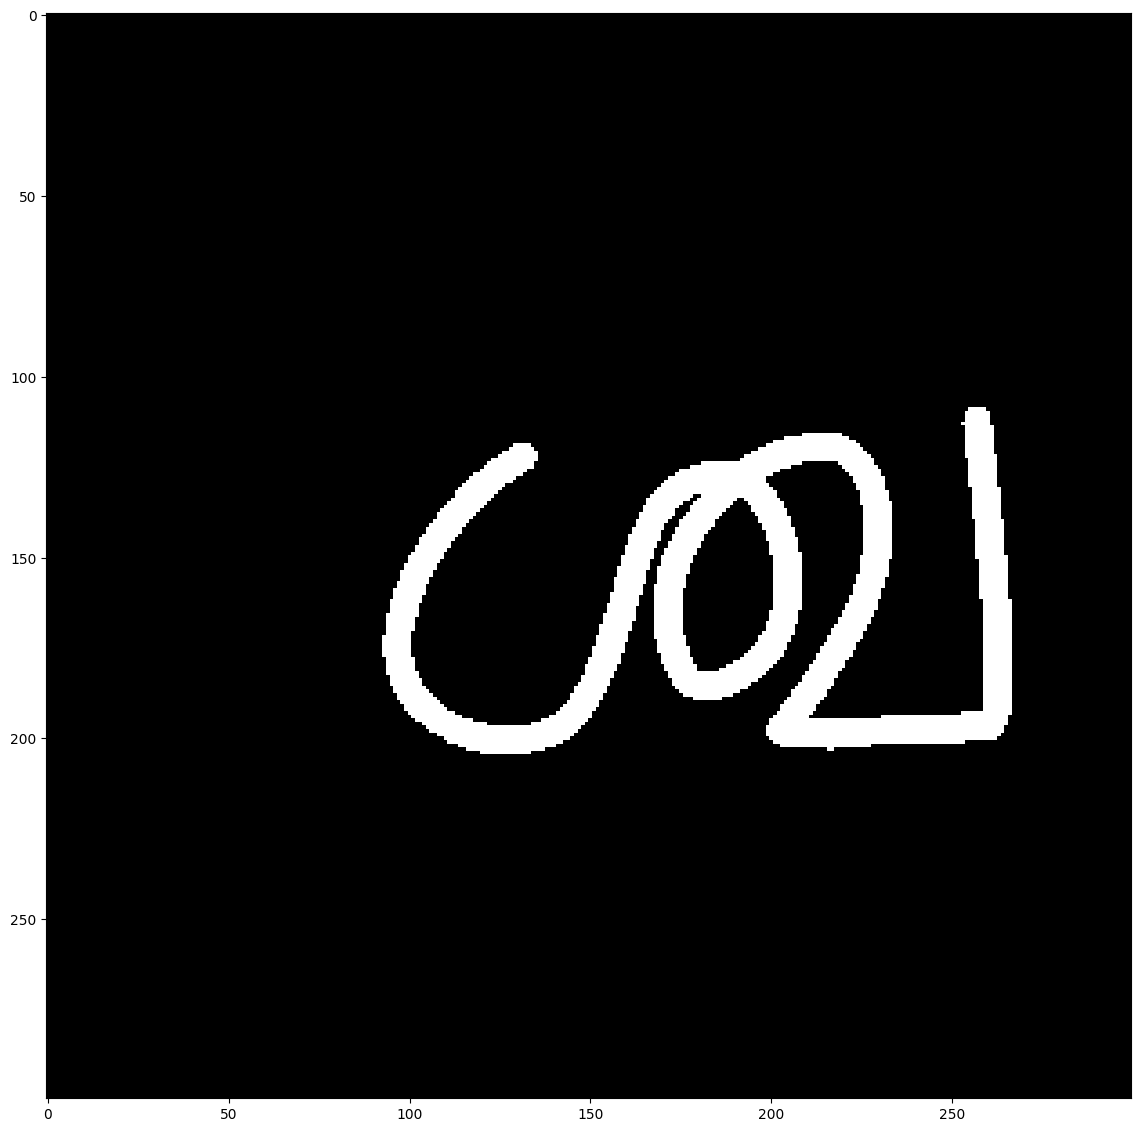

Predicted as ശ്ശ


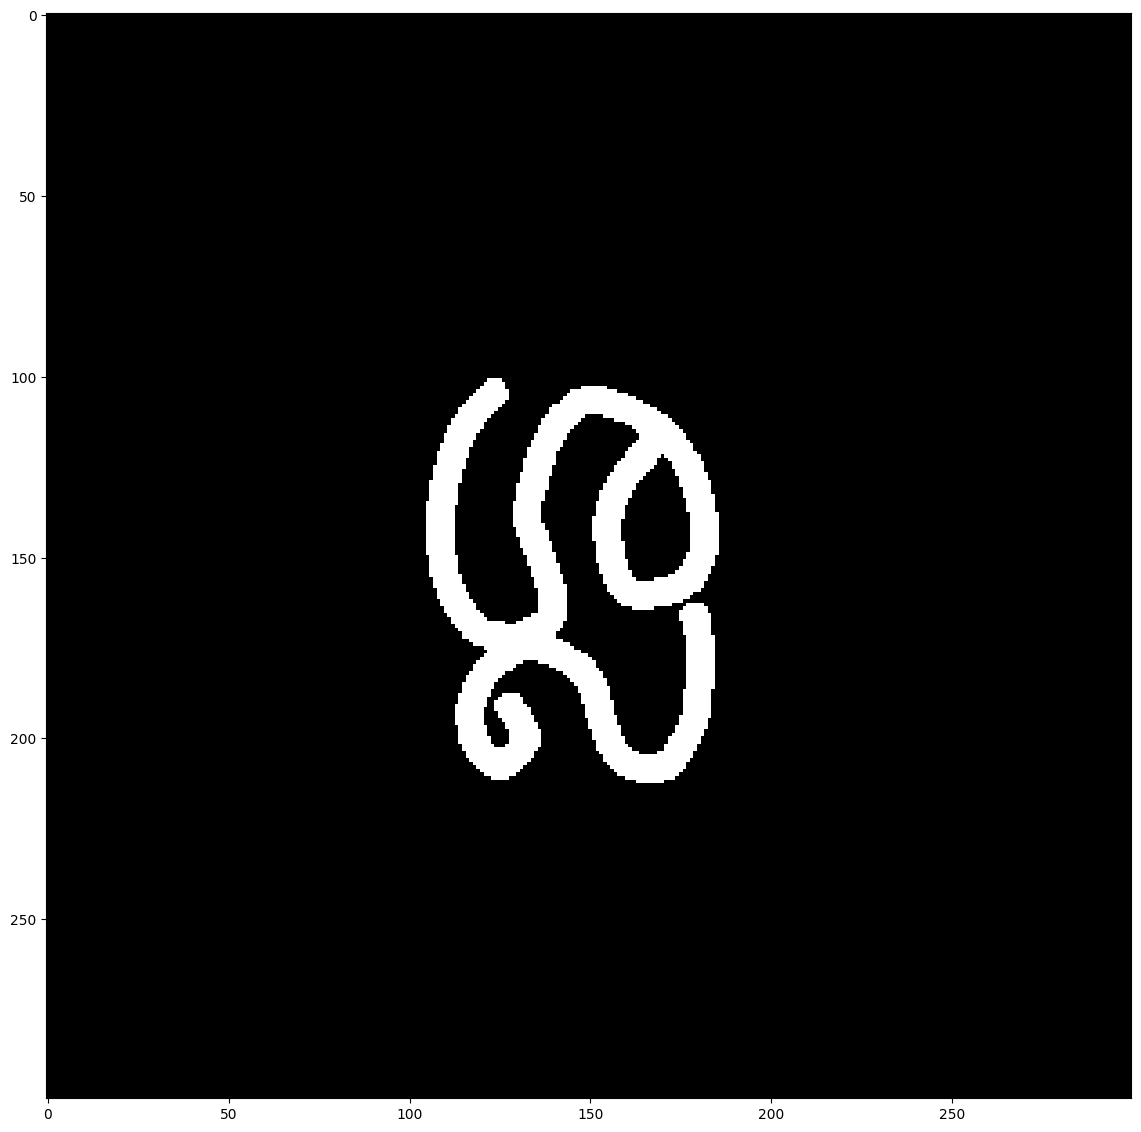

Predicted as ഗ്ല


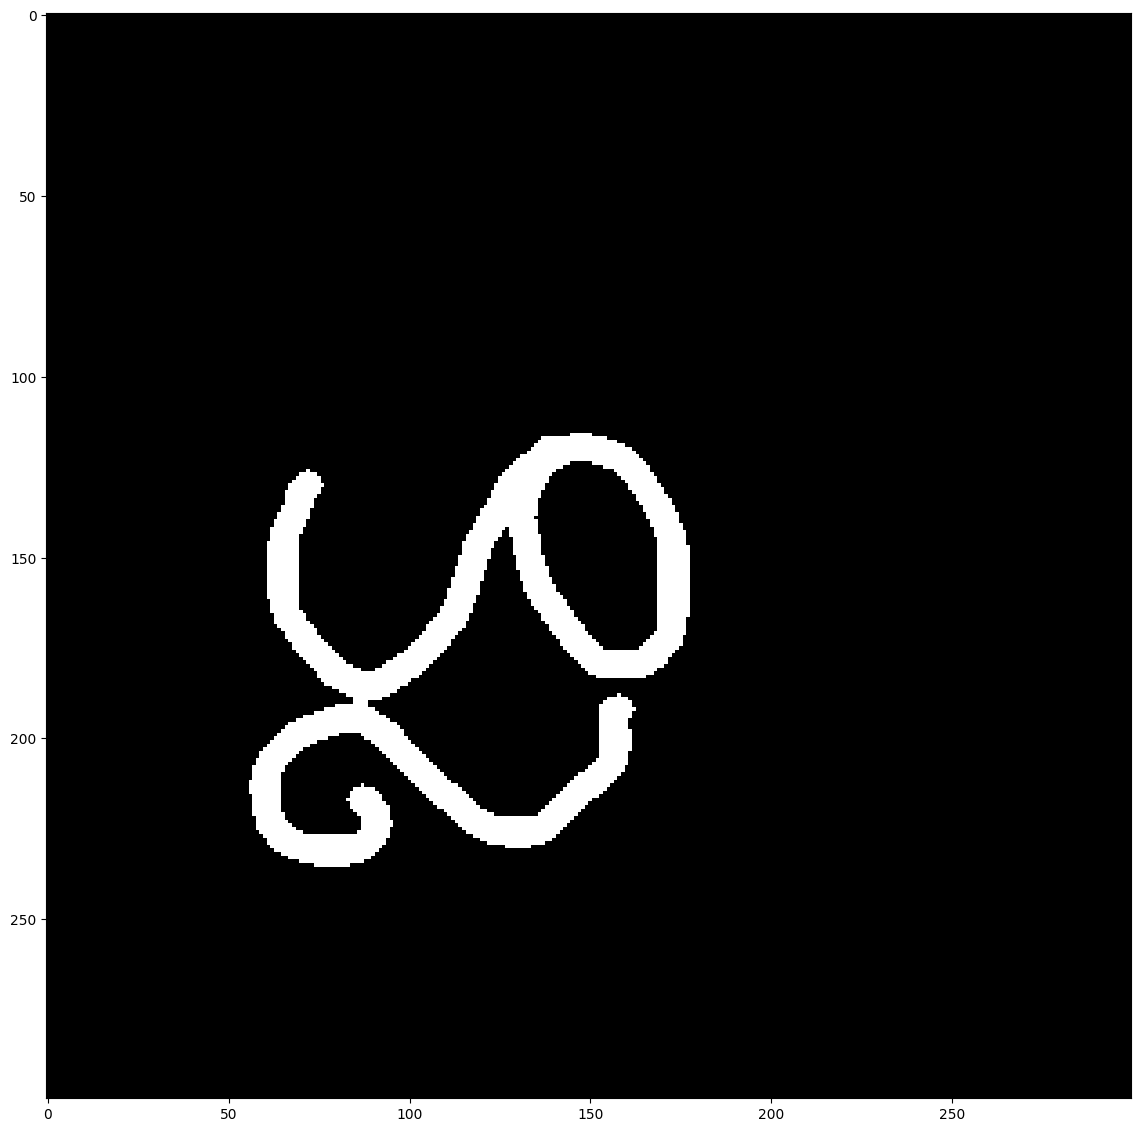

Predicted as ശ്ല


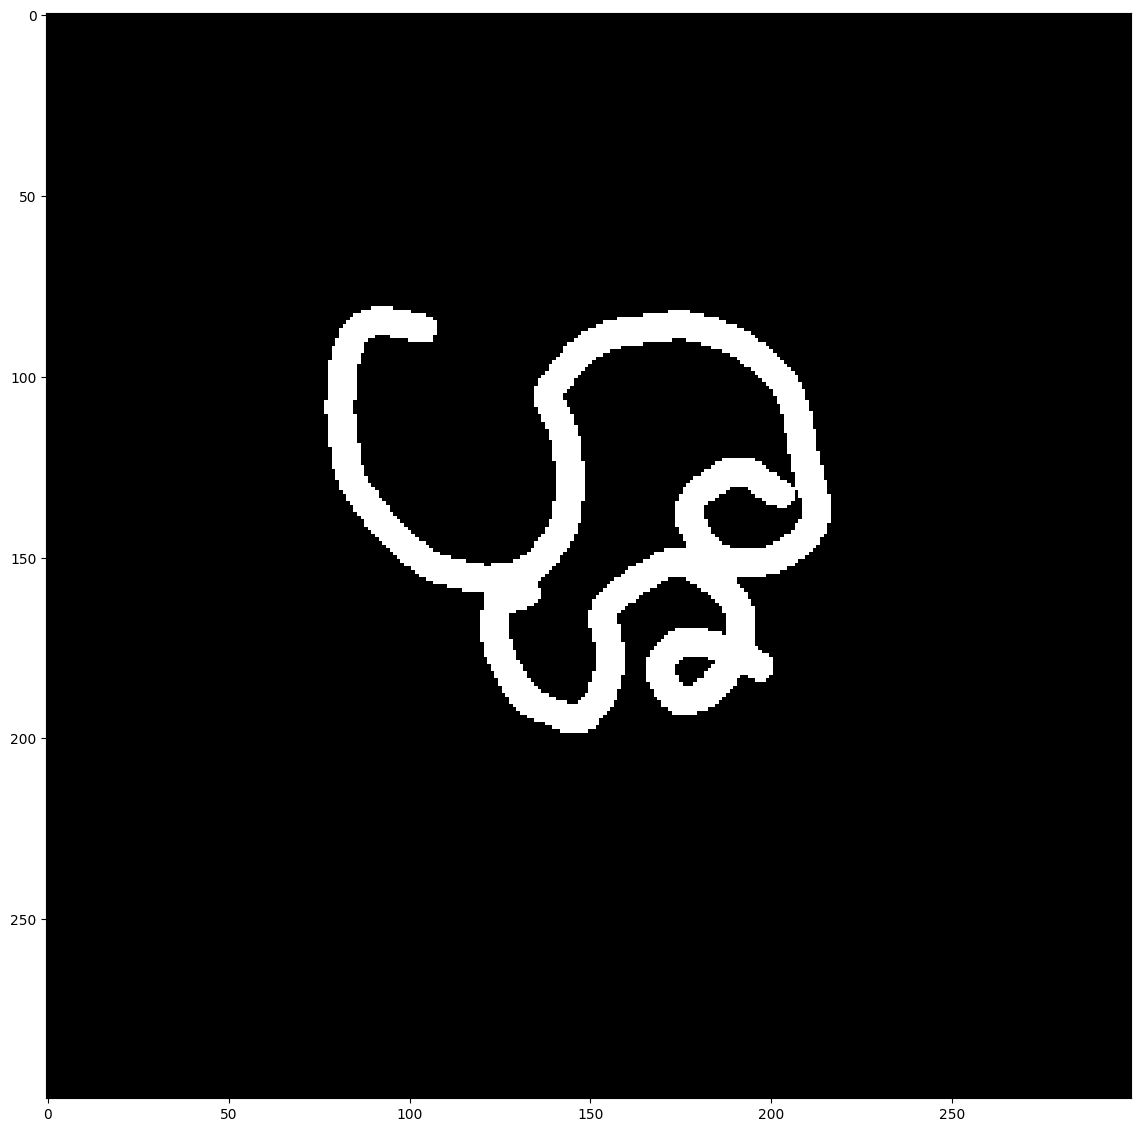

Predicted as ക


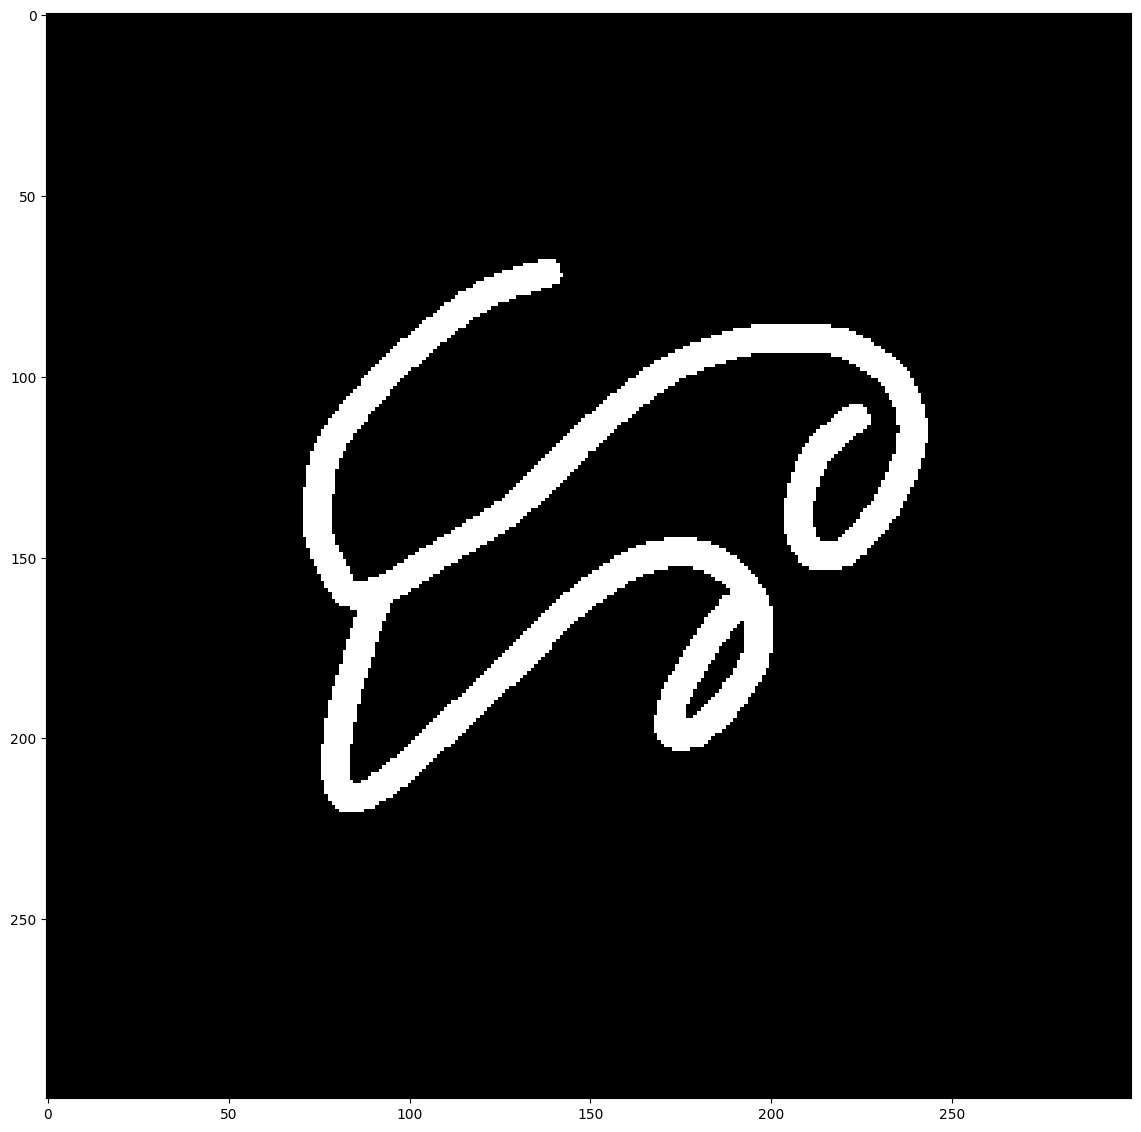

In [39]:
for num,i in enumerate(file_list):
    if i!=-1:
        print(f"Predicted as {target_names[y_pred[num]]}")
        image=cv2.imread(i,cv2.IMREAD_GRAYSCALE)
        plt.imshow(image,cmap="gray")
        plt.show()

In [40]:
model.save('Malayalam_detection.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
pickle_model_path="/kaggle/working/detail.pkl"

In [48]:
import pickle

In [55]:
with open(pickle_model_path, 'wb') as f:
    pickle.dump({
        'model': model.to_json(),
        'weights': model.get_weights(),
        'target_names':target_names,
        'class_labels': class_labels,
        'file_list':file_list
    }, f)
print(f"Pickle model saved at: {pickle_model_path}")

Pickle model saved at: /kaggle/working/detail.pkl


In [54]:
test_fold=sorted(glob.glob("/kaggle/input/lettter/cropped_letters/*"))
y_pred=[]
file_list=[]
print(test_fold)
for img in test_fold:
    i=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    i=cv2.resize(i,(128,128),interpolation=cv2.INTER_LINEAR)
    i=np.reshape(i,(1,128,128,1))
    print(model.predict(i,verbose=0))
    p=np.argmax(model.predict(i,verbose=0)[0])
    y_pred.append(int(class_labels[p]))

print(y_pred)

['/kaggle/input/lettter/cropped_letters/letter_1.png', '/kaggle/input/lettter/cropped_letters/letter_10.png', '/kaggle/input/lettter/cropped_letters/letter_11.png', '/kaggle/input/lettter/cropped_letters/letter_12.png', '/kaggle/input/lettter/cropped_letters/letter_13.png', '/kaggle/input/lettter/cropped_letters/letter_14.png', '/kaggle/input/lettter/cropped_letters/letter_15.png', '/kaggle/input/lettter/cropped_letters/letter_16.png', '/kaggle/input/lettter/cropped_letters/letter_17.png', '/kaggle/input/lettter/cropped_letters/letter_18.png', '/kaggle/input/lettter/cropped_letters/letter_19.png', '/kaggle/input/lettter/cropped_letters/letter_2.png', '/kaggle/input/lettter/cropped_letters/letter_20.png', '/kaggle/input/lettter/cropped_letters/letter_21.png', '/kaggle/input/lettter/cropped_letters/letter_22.png', '/kaggle/input/lettter/cropped_letters/letter_23.png', '/kaggle/input/lettter/cropped_letters/letter_24.png', '/kaggle/input/lettter/cropped_letters/letter_3.png', '/kaggle/inp